# Flight Data Analysis
## by Luke DeMaster-Smith

<a id='top_of_page'></a>
## Table of Contents

- **[CURRENT LOCATION](#current_location)**
- **[RECENT LOCATION](#recent_location)**
- **[OLDER LOCATION](#older_location)**

- **[Preliminary Wrangling](#preliminary_wrangling)**
  - [Load and Preview Data](#preliminary_wrangling_load_flight_data)
  - [Structure of Dataset](#preliminary_wrangling_structure)
  - [Main Features](#preliminary_wrangling_main_features)
  - [Features to Focus On](#preliminary_wrangling_features_to_focus_on)

- **[Univariate Exploration](#univariate_exploration)**
  - [Delay Variables - Initial Observations](#univariate_delay_initial_observations)
  - [Delay Variables - Additional Observations](#univariate_delay_additional_observations)
  - [Other Variables - Observations](#univariate_otherVar_observations)
  - [Summary](#univariate_exploration_summary)
    - [Distributions of Interest](#univariate_exploration_describe_distributions_of_interest)
    - [Unusual distributions and Modifications](#univariate_exploration_unusual_distributions_and_modifications)

- **[Bivariate Exploration](#bivariate_exploration)**
  - [2D Histograms](#bivariate_exploration_2D_Histograms)
  - [Violin Plots](#bivariate_exploration_violinPlots) 
  - [Heat Maps](#bivariate_exploration_heatMaps)
  - [Box Plots](#bivariate_exploration_boxPlots)
  - [Scatter Plots](#bivariate_exploration_scatterPlots)
  - [Ridgeline Plots](#bivariate_exploration_ridgeline_Plots)
  - [Swarm Plots](#bivariate_exploration_swarmPlots)
  - [Summary](#bivariate_exploration_summary)
    - [Relationships Observed](#bivariate_exploration_relationships_observed)
    - [Unexpected Relationships](#bivariate_exploration_relationships_observed_unexpected)

- **[Multivariate Exploration](#multivariate_exploration)**
  - [Relationships Observed](#multivariate_exploration_relationships_observed)
  - [Interesting Interactions](#multivariate_exploration_relationships_observed_interesting_interactions)
  
- **[References and Dead Ends](#references_and_dead_ends)**
  - [References](#references)
  - [Dead Ends](#dead_ends)
    - [Preliminary Wrangling](#dead_ends_preliminary_wrangling)
    - [Univariate Exploration](#dead_ends_univariate_exploration)
      - [Log Scale Histograms](#dead_ends_univariate_logScale_histograms)
      - [Clean Histograms, Standard Scale, Single Variable](#dead_ends_univariate_cleanHist_singleVar_standardScale)
      - [Clean Histograms, Standard Scale, Multiple Variables](#dead_ends_univariate_cleanHist_multiVar_standardScale)
      - [Density Plots](#dead_ends_univariate_density_plot_histogram)
- **[Templates](#templates)**

([Top of Page](#top_of_page))

<span style="color:red">


## Table of Contents (old)

- **[CURRENT LOCATION](#current_location)**
- **[RECENT LOCATION](#recent_location)**
- **[OLDER LOCATION](#older_location)**

- **[Preliminary Wrangling](#preliminary_wrangling)**
  - [Load and Preview Data](#preliminary_wrangling_load_flight_data)
  - [Structure of Dataset](#preliminary_wrangling_structure)
  - [Main Features](#preliminary_wrangling_main_features)
  - [Features to Focus On](#preliminary_wrangling_features_to_focus_on)

- **[Univariate Exploration](#univariate_exploration)**
  - [Delay Variables - Initial Observations](#univariate_delay_initial_observations)
  - [Delay Variables - Additional Observations](#univariate_delay_additional_observations)
  - [Other Variables - Observations](#univariate_otherVar_observations)
  - [Summary](#univariate_exploration_summary)
    - [Distributions of Interest](#univariate_exploration_describe_distributions_of_interest)
    - [Unusual distributions and Modifications](#univariate_exploration_unusual_distributions_and_modifications)

- **[Bivariate Exploration](#bivariate_exploration_old)**
  - [2D Histograms](#bivariate_exploration_2D_Histograms)
  - [Heat Maps](#bivariate_exploration_heatMaps_old)
  - [Violin Plots](#bivariate_exploration_violinPlots_old)
  - [Box Plots](#bivariate_exploration_boxPlots_old)
  - [Scatter Plots](#bivariate_exploration_scatterPlots_old)
  - [Ridgeline Plots](#bivariate_exploration_ridgeline_Plots_old)
  - [Swarm Plots](#bivariate_exploration_swarmPlots_old)
  - [Summary](#bivariate_exploration_summary_old)
    - [Relationships Observed](#bivariate_exploration_relationships_observed_old)
    - [Unexpected Relationships](#bivariate_exploration_relationships_observed_unexpected_old)

- **[Multivariate Exploration](#multivariate_exploration_old)**
  - [Relationships Observed](#multivariate_exploration_relationships_observed_old)
  - [Interesting Interactions](#multivariate_exploration_relationships_observed_interesting_interactions_old)
  
- **[References and Dead Ends](#references_and_dead_ends)**
  - [References](#references)
  - [Dead Ends](#dead_ends)
    - [Preliminary Wrangling](#dead_ends_preliminary_wrangling)
    - [Univariate Exploration](#dead_ends_univariate_exploration)
      - [Log Scale Histograms](#dead_ends_univariate_logScale_histograms)
      - [Clean Histograms, Standard Scale, Single Variable](#dead_ends_univariate_cleanHist_singleVar_standardScale)
      - [Clean Histograms, Standard Scale, Multiple Variables](#dead_ends_univariate_cleanHist_multiVar_standardScale)
      - [Density Plots](#dead_ends_univariate_density_plot_histogram)
- **[Templates](#templates)**

</span>

<a id='preliminary_wrangling'></a>
([Top of Page](#top_of_page))
## Preliminary Wrangling

In [3]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import time           # for timing operations on large dataframes

import random
random.seed(42)

%matplotlib inline

<a id='preliminary_wrangling_load_flight_data'></a>
([Top of Page](#top_of_page))

**Load and Preview Data**

In [4]:
# load a single year's dataset into a pandas dataframe
start = time.time()
flights = pd.read_csv('2008.csv')           #flights_2008
end = time.time()

currTime = str(time.localtime().tm_hour) + ':' + str(time.localtime().tm_min) + ':' + str(time.localtime().tm_sec)
print('time elapsed: ' + str(end - start) + ', current time: ' + currTime)

time elapsed: 35.95829105377197, current time: 15:48:41


In [5]:
# high-level overview of data shape and composition
print(flights.shape)
print(flights.dtypes)

(7009728, 29)
Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum               object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance               int64
TaxiIn               float64
TaxiOut              float64
Cancelled              int64
CancellationCode      object
Diverted               int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtype: object


**Initial Observations:**
* There are over 7 million rows, and it took over 30 seconds to load the csv.
* In order to speed up analysis and plotting, I am going to do the following:
  * Only analyze one year's worth of flight data.
    * Obviously, it would be interesting to assess changes over the course of multiple years. However, I suspect there is enough data within a single year to provide some insights.
  * Sample the data. I suspect a moderately large sample size (say..100000) will be sufficient.
    * If analysis indicates that it would be beneficial to look at the entire year's worth of data, I will do so
* If analysis leads me to a key metric or plot that would clearly benefit from a larger data set, I will adjust my analysis accordingly.

In [6]:
# Backup the data
flights_all = flights.copy(deep=True)

In [7]:
# sample 100000 flights, then display head to get a better sense of the data
samples = np.random.choice(flights_all.shape[0], 100000, replace = False)
flights = flights_all.loc[samples,:]
flights.head(10)

Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  ArrTime  \
896643   2008      2          19          2   1738.0        1745   2011.0   
5146430  2008      9          21          7    931.0         935   1256.0   
2027282  2008      4          14          1    757.0         805    900.0   
6871527  2008     12          25          4   2129.0        2130      5.0   
2024398  2008      4          11          5   1527.0        1310   1843.0   
4614071  2008      8          13          3   2205.0        2205    628.0   
123690   2008      1          21          1   1510.0        1415   1856.0   
2567057  2008      5           7          3   1730.0        1730   1833.0   
2122405  2008      4           4          5    658.0         655    842.0   
1479520  2008      3           1          6    902.0         905   1138.0   

         CRSArrTime UniqueCarrier  FlightNum  ... TaxiIn  TaxiOut  Cancelled  \
896643         2021            DL       1859  ...    9.0     15.0          0   
5146430        1308            EV       4499  ...    9.0     23.0          0   
2027282         925            UA        743  ...    5.0     16.0          0   
6871527        2356            NW       1487  ...    5.0     14.0          0   
2024398        1645            UA        646  ...    7.0     22.0          0   
4614071         620            HA          4  ...    7.0     13.0          0   
123690         1805            XE       2236  ...    7.0     34.0          0   
2567057        1837            OO       5945  ...    5.0     17.0          0   
2122405         825            EV       4691  ...    6.0     19.0          0   
1479520        1140            WN       1311  ...    2.0      8.0          0   

         CancellationCode  Diverted  CarrierDelay WeatherDelay NASDelay  \
896643                NaN         0           NaN          NaN      NaN   
5146430               NaN         0           NaN          NaN      NaN   
2027282               NaN         0           NaN          NaN      NaN   
6871527               NaN         0           NaN          NaN      NaN   
2024398               NaN         0           0.0          0.0    118.0   
4614071               NaN         0           NaN          NaN      NaN   
123690                NaN         0           0.0          9.0      0.0   
2567057               NaN         0           NaN          NaN      NaN   
2122405               NaN         0           0.0          0.0     17.0   
1479520               NaN         0           NaN          NaN      NaN   

         SecurityDelay  LateAircraftDelay  
896643             NaN                NaN  
5146430            NaN                NaN  
2027282            NaN                NaN  
6871527            NaN                NaN  
2024398            0.0                0.0  
4614071            NaN                NaN  
123690             0.0               42.0  
2567057            NaN                NaN  
2122405            0.0                0.0  
1479520            NaN                NaN  

[10 rows x 29 columns]

**Determine which columns are not shown above, then visualize them**

In [8]:
flights.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [9]:
cols_to_show = ['TailNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay', 'ActualElapsedTime',
                'CRSElapsedTime', 'AirTime', 'ArrDelay', 'DepDelay', 'Origin', 'Dest', 'Distance']

In [10]:
flights[cols_to_show].head(10)

TailNum  ActualElapsedTime  CRSElapsedTime  AirTime  ArrDelay  \
896643   N900DE               93.0            96.0     69.0     -10.0   
5146430  N748EV              145.0           153.0    113.0     -12.0   
2027282  N328UA              183.0           200.0    162.0     -25.0   
6871527  N328NW              216.0           206.0    197.0       9.0   
2024398  N846UA              136.0           155.0    107.0     118.0   
4614071  N592HA              323.0           315.0    303.0       8.0   
123690   N18120              166.0           170.0    125.0      51.0   
2567057  N906SW               63.0            67.0     41.0      -4.0   
2122405  N924EV              104.0            90.0     79.0      17.0   
1479520  N217JC              156.0           155.0    146.0      -2.0   

         ActualElapsedTime  CRSElapsedTime  AirTime  ArrDelay  DepDelay  \
896643                93.0            96.0     69.0     -10.0      -7.0   
5146430              145.0           153.0    113.0     -12.0      -4.0   
2027282              183.0           200.0    162.0     -25.0      -8.0   
6871527              216.0           206.0    197.0       9.0      -1.0   
2024398              136.0           155.0    107.0     118.0     137.0   
4614071              323.0           315.0    303.0       8.0       0.0   
123690               166.0           170.0    125.0      51.0      55.0   
2567057               63.0            67.0     41.0      -4.0       0.0   
2122405              104.0            90.0     79.0      17.0       3.0   
1479520              156.0           155.0    146.0      -2.0      -3.0   

        Origin Dest  Distance  
896643     STL  ATL       483  
5146430    MSP  ATL       906  
2027282    CLE  DEN      1201  
6871527    MSP  TUS      1298  
2024398    ORD  EWR       719  
4614071    HNL  LAX      2556  
123690     MSP  EWR      1008  
2567057    DEN  DRO       251  
2122405    ATL  CVG       373  
1479520    TPA  BUF      1054

In [11]:
flights.describe()

Year          Month    DayofMonth      DayOfWeek       DepTime  \
count  100000.0  100000.000000  100000.00000  100000.000000  98071.000000   
mean     2008.0       6.384410      15.72586       3.927210   1335.692559   
std         0.0       3.408891       8.77658       1.989274    478.155518   
min      2008.0       1.000000       1.00000       1.000000      1.000000   
25%      2008.0       3.000000       8.00000       2.000000    929.000000   
50%      2008.0       6.000000      16.00000       4.000000   1327.000000   
75%      2008.0       9.000000      23.00000       6.000000   1729.000000   
max      2008.0      12.000000      31.00000       7.000000   2400.000000   

          CRSDepTime       ArrTime     CRSArrTime      FlightNum  \
count  100000.000000  97851.000000  100000.000000  100000.000000   
mean     1327.585030   1482.926245    1495.915970    2221.343470   
std       464.453312    505.976764     483.530913    1954.617778   
min         5.000000      1.000000       1.000000       1.000000   
25%       928.000000   1109.000000    1116.000000     626.000000   
50%      1320.000000   1513.000000    1518.000000    1571.000000   
75%      1716.000000   1911.000000    1909.000000    3511.000000   
max      2359.000000   2400.000000    2400.000000    9740.000000   

       ActualElapsedTime  ...      Distance        TaxiIn       TaxiOut  \
count       97811.000000  ...  100000.00000  97851.000000  98058.000000   
mean          127.636912  ...     728.83227      6.866440     16.465857   
std            70.152850  ...     561.77292      4.857572     11.436962   
min            15.000000  ...      31.00000      0.000000      0.000000   
25%            77.000000  ...     328.00000      4.000000     10.000000   
50%           110.000000  ...     585.00000      6.000000     14.000000   
75%           157.000000  ...     954.00000      8.000000     19.000000   
max           664.000000  ...    4962.00000    175.000000    324.000000   

           Cancelled       Diverted  CarrierDelay  WeatherDelay      NASDelay  \
count  100000.000000  100000.000000  21796.000000  21796.000000  21796.000000   
mean        0.019450       0.002440     15.713342      3.265186     16.861121   
std         0.138101       0.049336     40.153898     20.298790     30.789937   
min         0.000000       0.000000      0.000000      0.000000      0.000000   
25%         0.000000       0.000000      0.000000      0.000000      0.000000   
50%         0.000000       0.000000      0.000000      0.000000      6.000000   
75%         0.000000       0.000000     16.000000      0.000000     21.000000   
max         1.000000       1.000000    990.000000    721.000000    669.000000   

       SecurityDelay  LateAircraftDelay  
count   21796.000000       21796.000000  
mean        0.070563          21.139016  
std         1.507091          40.071995  
min         0.000000           0.000000  
25%         0.000000           0.000000  
50%         0.000000           0.000000  
75%         0.000000          26.000000  
max        97.000000         799.000000  

[8 rows x 24 columns]

In [12]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 896643 to 1978194
Data columns (total 29 columns):
Year                 100000 non-null int64
Month                100000 non-null int64
DayofMonth           100000 non-null int64
DayOfWeek            100000 non-null int64
DepTime              98071 non-null float64
CRSDepTime           100000 non-null int64
ArrTime              97851 non-null float64
CRSArrTime           100000 non-null int64
UniqueCarrier        100000 non-null object
FlightNum            100000 non-null int64
TailNum              98862 non-null object
ActualElapsedTime    97811 non-null float64
CRSElapsedTime       99981 non-null float64
AirTime              97811 non-null float64
ArrDelay             97811 non-null float64
DepDelay             98071 non-null float64
Origin               100000 non-null object
Dest                 100000 non-null object
Distance             100000 non-null int64
TaxiIn               97851 non-null float64
TaxiOut     

<a id='preliminary_wrangling_structure'></a>
([Top of Page](#top_of_page))
### What is the structure of your dataset?

* There are over 7 million rows in the dataset. That is a lot of data. In order to have a dataset that is large enough to analyze some trends, but small enough to allow quick analysis and plotting, I decided to:
  * only analyze year (2008)
  * sample 100000 flights from that year
* Most variables are numeric with type float.
* There appear to be NAN entries for some features. These rows may need to be dropped or filtered out when analyzing data.
* The date is spread out over three variables. Adding a new variable, simply called 'Date', would be useful.
* Adding another feature called 'DayOfYear' may also be useful.

<a id='preliminary_wrangling_main_features'></a>
([Top of Page](#top_of_page))
### What is/are the main feature(s) of interest in your dataset?

* I am mostly interested in delays and determining which features best predict (or correlate to) the amount of delay.

<a id='preliminary_wrangling_features_to_focus_on'></a>
([Top of Page](#top_of_page))
### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

* Some of the main features include delay types, the timing of various events (departure, arrival, taxiing, elapsed time, etc.), the date, and the airports.
* I suspect that departure date and/or time will have a noticeable affect on the arrrival delay.
* I also suspect that delays will be longer on the weekends than on weekdays.

<a id='univariate_exploration'></a>
([Top of Page](#top_of_page))
## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

**Define a function to plot multiple standard scale histograms**

In [14]:
def plot_histograms_stdAxis(flights, var, xaxis_label, numPlots, min_vals, max_vals, binsizes):
    fig, ax = plt.subplots(nrows=numPlots, figsize = [8, numPlots * 3.5])
    for i in range(numPlots):
        bin_edges = np.arange(min_vals[i], max_vals[i]+binsizes[i], binsizes[i])
        ax[i].hist(data = flights, x = var, bins = bin_edges);
        ax[i].set_title(flights[var].name + '\n' +
                        'min: ' + str(min_vals[i]) +
                        ', max: ' + str(max_vals[i]) +
                        ', binsize: ' +
                        str(binsizes[i]) + ' ',
                        pad=-30, loc='right')

    plt.xlabel(xaxis_label)
    plt.show()

In [15]:
flights.dtypes

Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum               object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance               int64
TaxiIn               float64
TaxiOut              float64
Cancelled              int64
CancellationCode      object
Diverted               int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtype: object

**Create standard scale histograms of the various 'Delay' parameters**

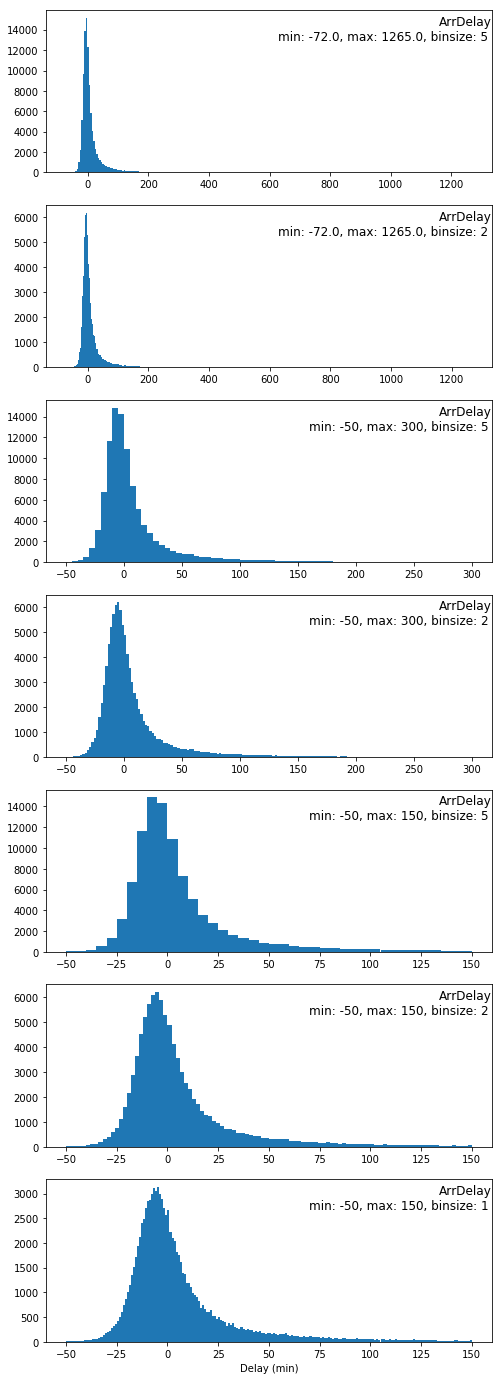

------------------------------------------------------------------------------------


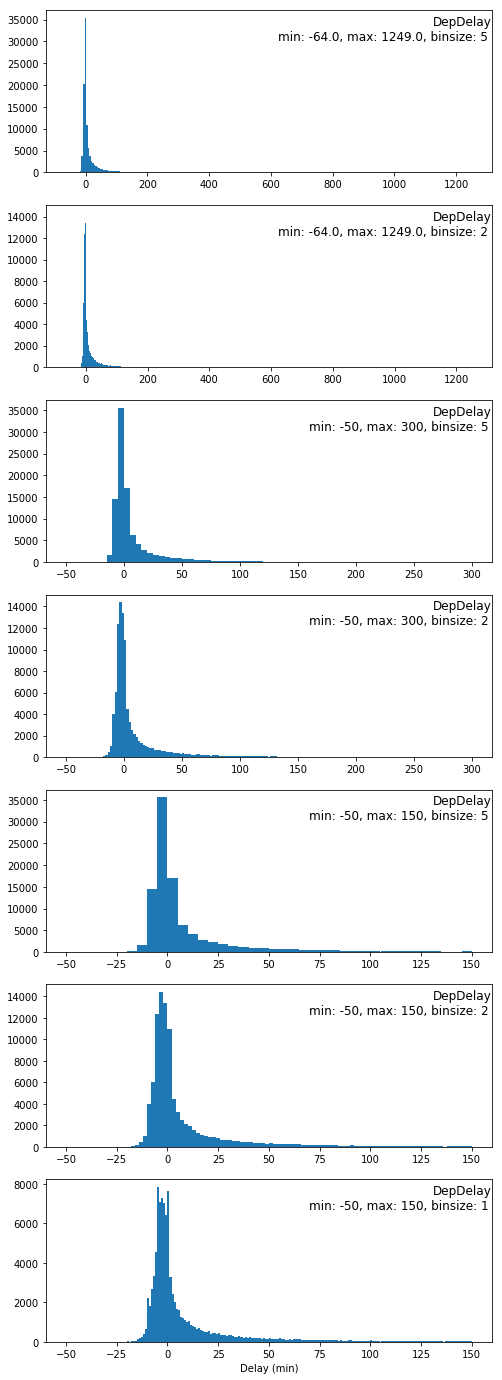

------------------------------------------------------------------------------------


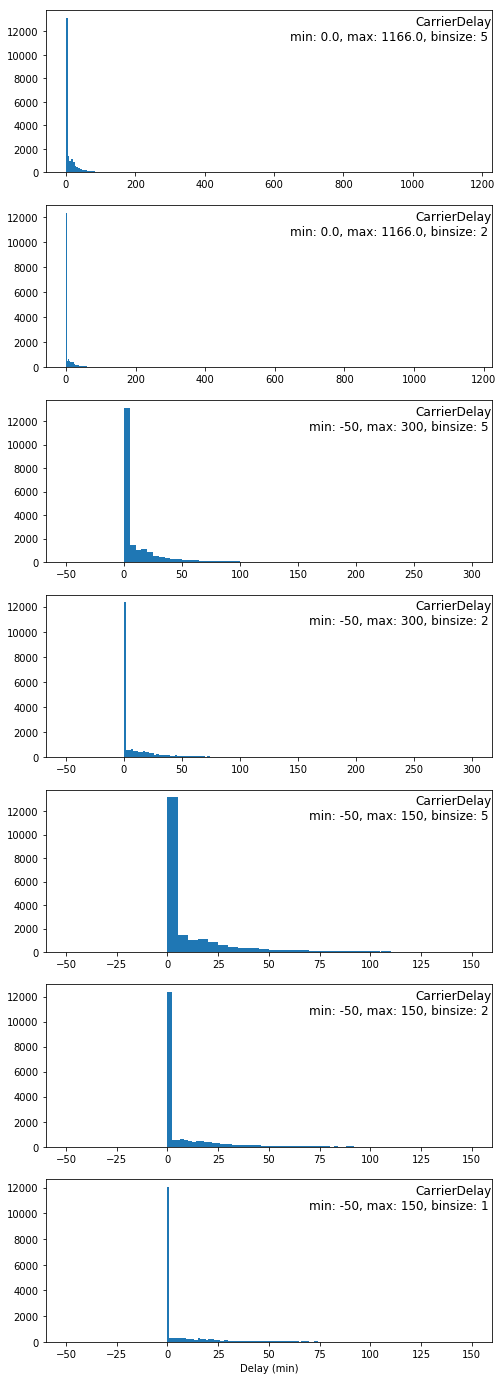

------------------------------------------------------------------------------------


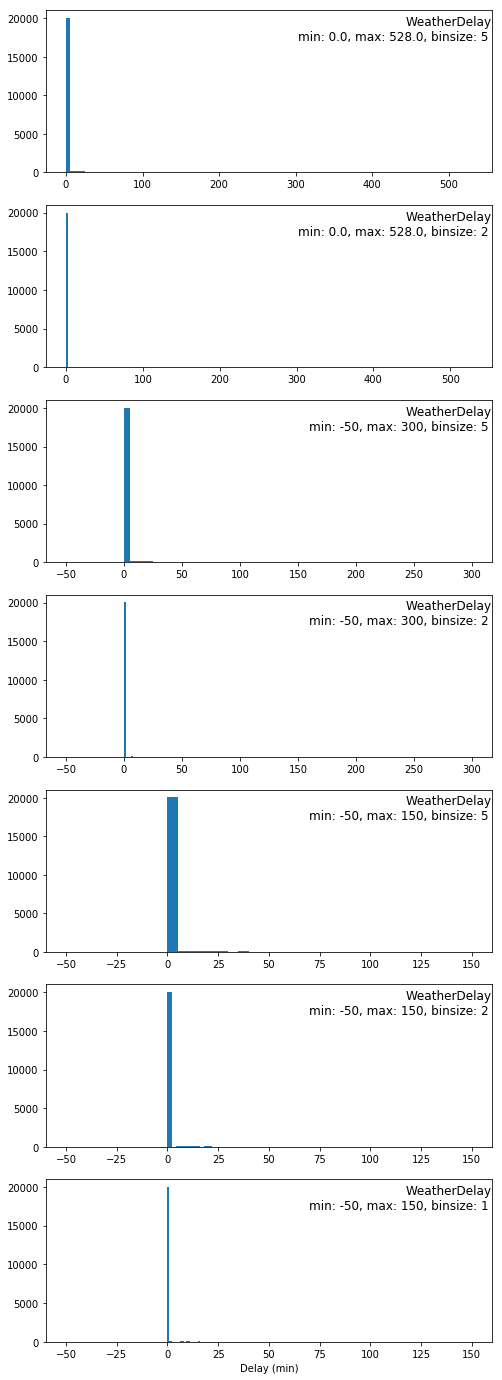

------------------------------------------------------------------------------------


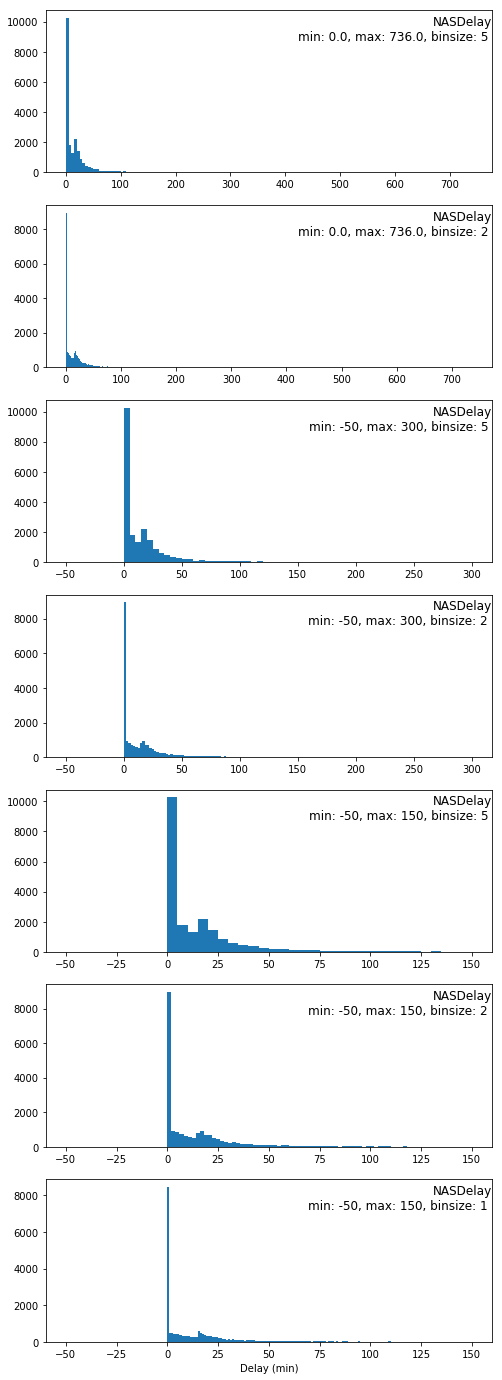

------------------------------------------------------------------------------------


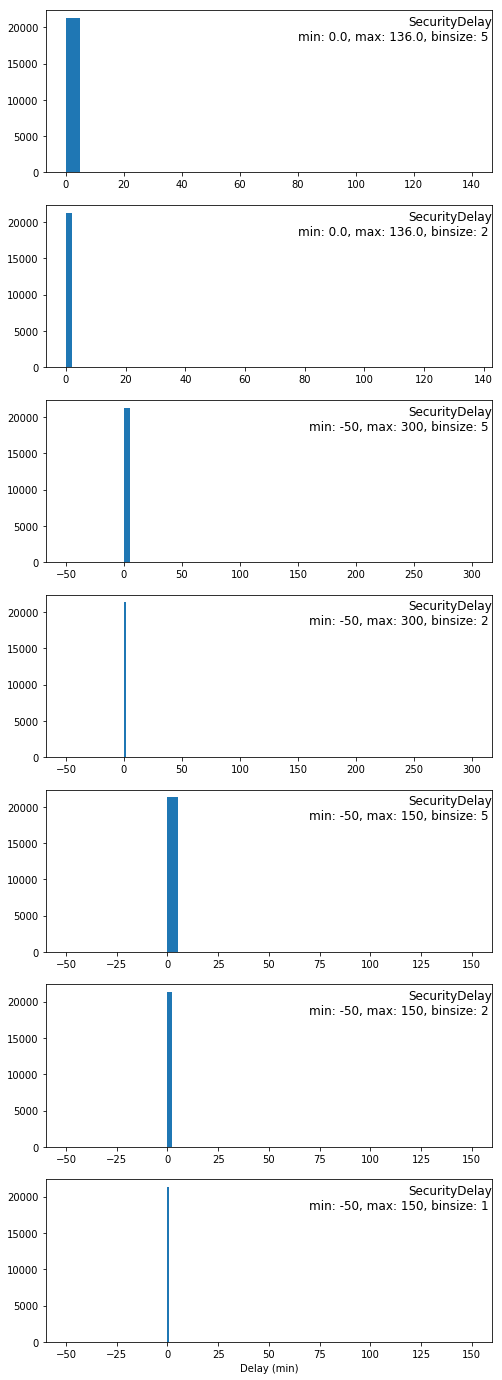

------------------------------------------------------------------------------------


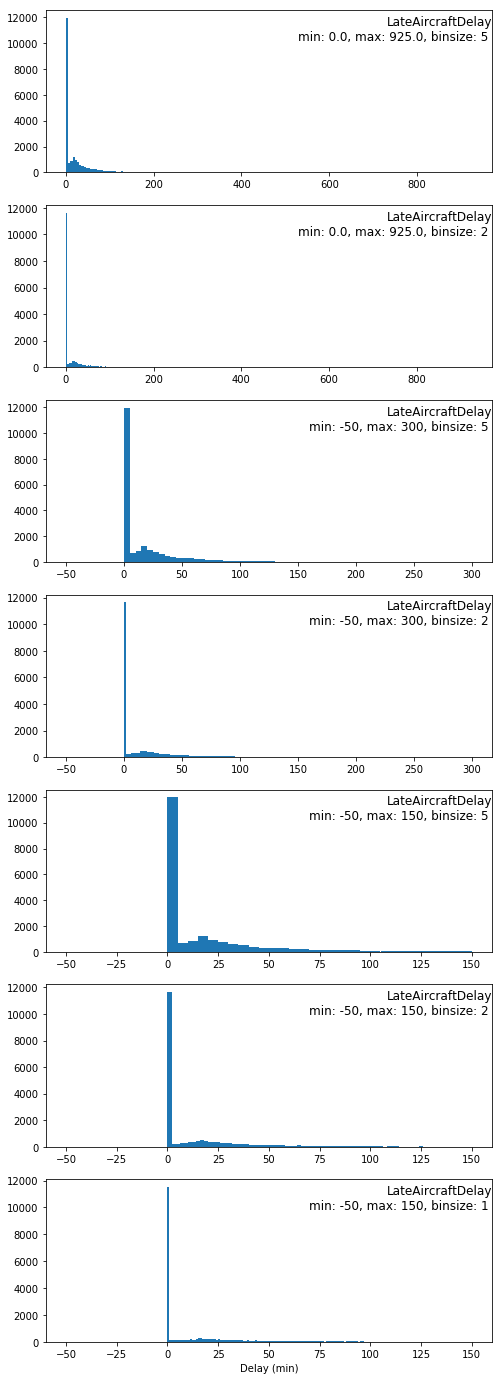

------------------------------------------------------------------------------------


In [22]:
vars = ['ArrDelay', 'DepDelay', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']
numPlots = 7;
for i in range(len(vars)):
    var = vars[i]
    min_values = [flights[var].min(), flights[var].min(),
                  -50, -50, -50, -50, -50]
    max_values = [flights[var].max(), flights[var].max(),
                  300, 300, 150, 150, 150]
    binsizes = [5, 2, 5, 2, 5, 2, 1]
    plot_histograms_stdAxis(flights, var, 'Delay (min)', numPlots, min_values, max_values, binsizes)
    print('------------------------------------------------------------------------------------')

**Zoom in on the 'ArrDelay' histogram to get a better sense of its distribution**

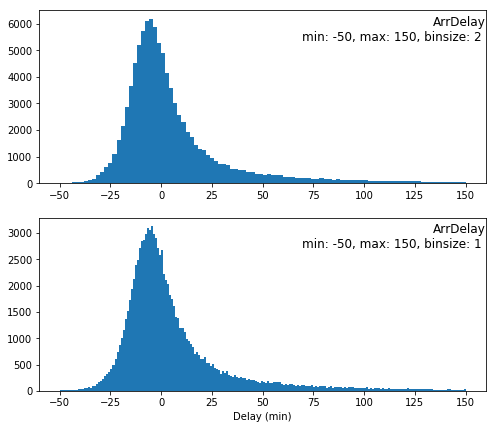

In [23]:
vars = ['ArrDelay']
numPlots = 2;
for i in range(len(vars)):
    var = vars[i]
    min_values = [-50, -50]
    max_values = [150, 150]
    binsizes = [2, 1]
    plot_histograms_stdAxis(flights, var, 'Delay (min)', numPlots, min_values, max_values, binsizes)

**Repeat for 'DepDelay'**

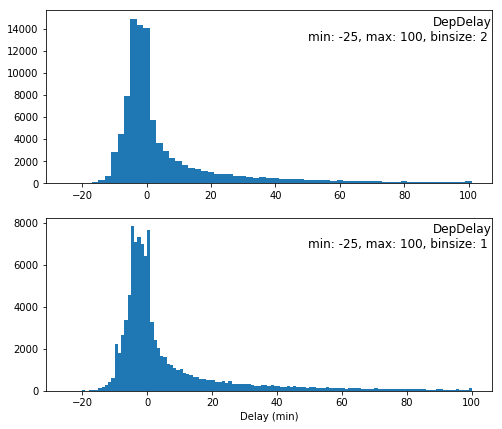

In [24]:
vars = ['DepDelay']
numPlots = 2;
for i in range(len(vars)):
    var = vars[i]
    min_values = [-25, -25]
    max_values = [100, 100]
    binsizes = [2, 1]
    plot_histograms_stdAxis(flights, var, 'Delay (min)', numPlots, min_values, max_values, binsizes)

<a id='univariate_delay_initial_observations'></a>
([Top of Page](#top_of_page))<br>

**'Delay' Variables - Initial Observations**

* **'ArrDelay'** and **'DepDelay'**:
  * Have roughly normal distributions around zero, albeit with some outliers causing a right-handed skew.
  * May need plotted on a log-scale for some plots due to their long tails
* **'CarrierDelay', 'WeatherDelay', 'NASDelay',** and **'LateAircraftDelay'** each have a large number of points at or very near zero. This is disguising the true nature of these distributions.
  * These distributions will have to be explored in greater detail
* **'NASDelay'** seems to have bi-modal distribution, which was not expected.
  * This may warrant further exploration.
* **'SecurityDelay'** seems to be almost uniformly zero.
  * It turns out this parameter is not _uniformly_ zero, but since it is _mostly_ zeros, this parameter is not a large driver of delays and will be ignored
* **'LateAircraftDelay'** seems to have a spike in frequency around 20 minutes

**Define a function to plot multiple log scale histograms**

In [32]:
def plot_histograms_logAxis(flights, var, xaxis_label, numPlots, max_vals, log_binsizes, ticks):
    fig, ax = plt.subplots(nrows=numPlots, figsize = [8, numPlots * 3.5])
    labels = ['{}'.format(v) for v in ticks]
    for i in range(numPlots):
        #bin_edges = np.arange(min_vals[i], max_vals[i]+binsizes[i], binsizes[i])        
        #bin_edges =       np.arange(min_vals[i],            max_vals[i]+binsizes[i], binsizes[i])
        bin_edges = 10 ** np.arange(0, np.log10(max_vals[i])+log_binsizes[i], log_binsizes[i])
        ax[i].hist(data = flights, x = var, bins = bin_edges);
        ax[i].set_xscale('log')
        ax[i].xaxis.set_ticks(ticks)
        ax[i].xaxis.set_ticklabels(labels)
        ax[i].set_title(flights[var].name + '\n' +
                        'max: ' + str(max_vals[i]) +
                        ', log_binsize: ' +
                        str(log_binsizes[i]) + ' ',
                        pad=-30, loc='right')

    plt.xlabel(xaxis_label)
    plt.show()

**Create log-scale histograms of the 'Delay' variables that have a large number of points near zero**

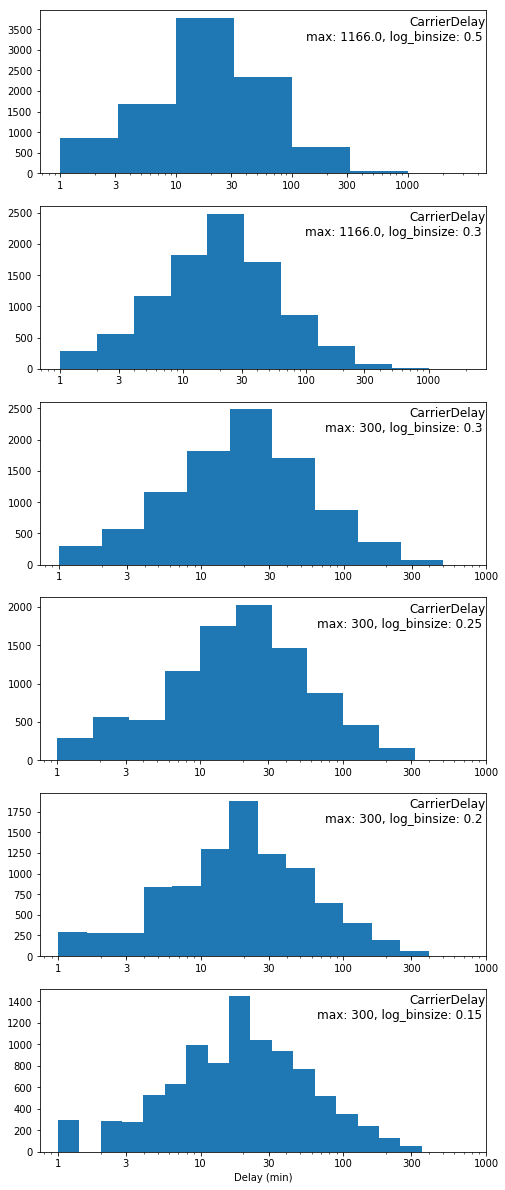

------------------------------------------------------------------------------------


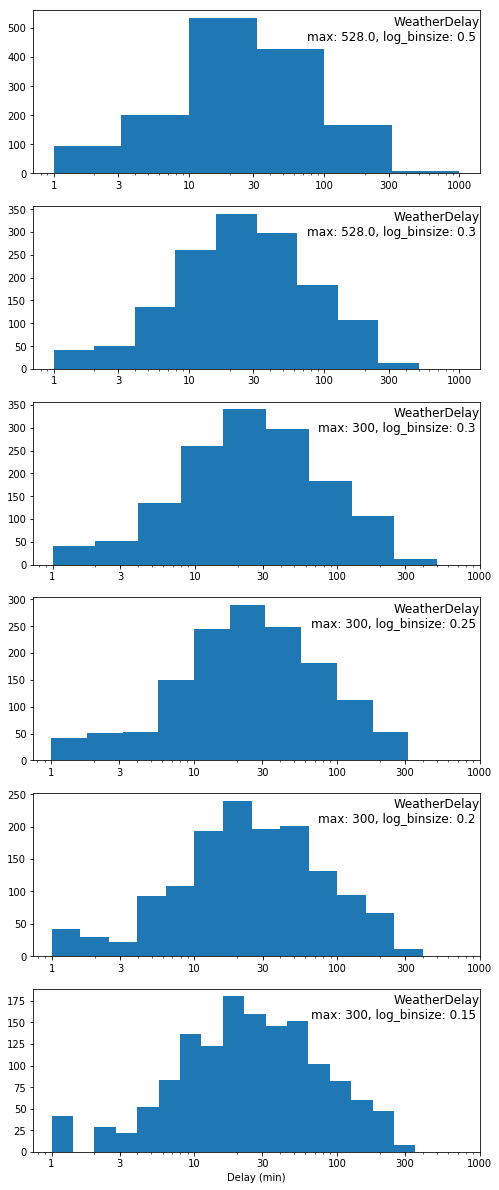

------------------------------------------------------------------------------------


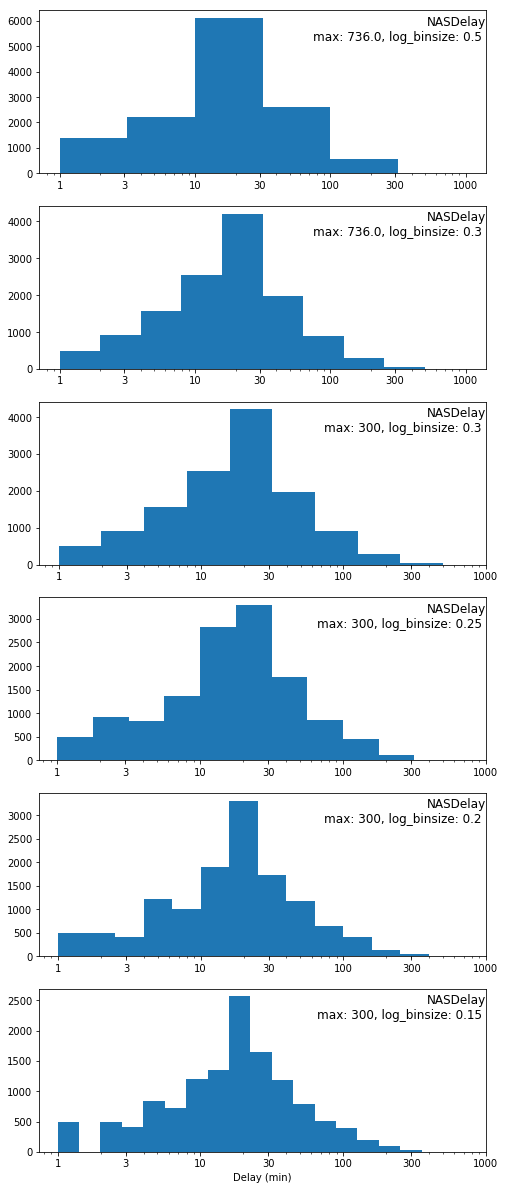

------------------------------------------------------------------------------------


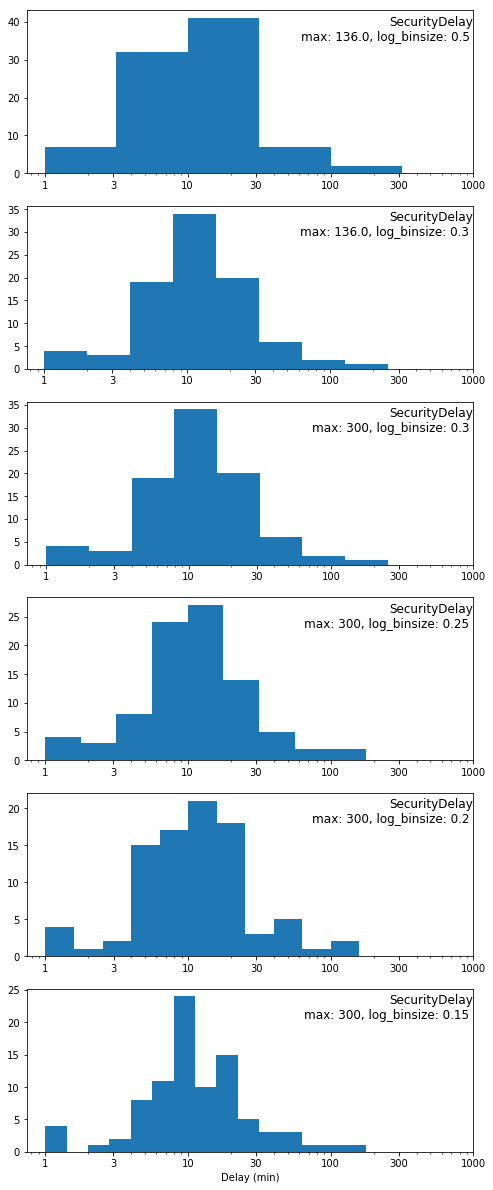

------------------------------------------------------------------------------------


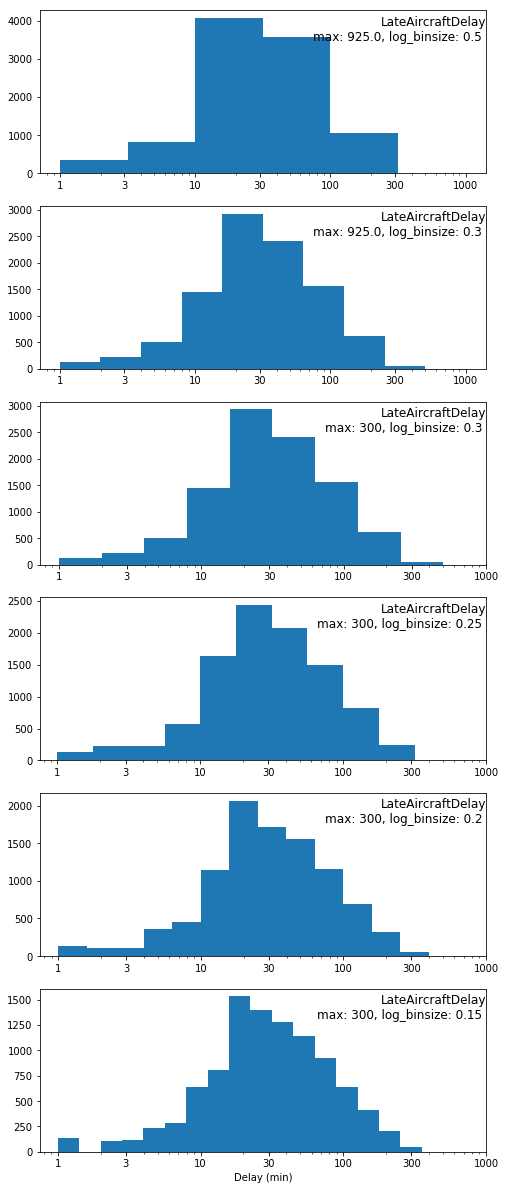

------------------------------------------------------------------------------------


In [26]:
vars = ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']
numPlots = 6;
for i in range(len(vars)):
    var = vars[i]
    max_values = [flights[var].max(),
                  flights[var].max(),
                  300, 300, 300, 300]
    log_binsizes = [0.5, 0.3, 0.3, 0.25, 0.2, 0.15]
    ticks = [1, 3, 10, 30, 100, 300, 1000]
    plot_histograms_logAxis(flights, var, 'Delay (min)', numPlots, max_values, log_binsizes, ticks)
    print('------------------------------------------------------------------------------------')

**Create standard scale histograms of the variables that have a large number of points near zero**
* Start these histograms at a value larger than zero

**'CarrierDelay' distribution**

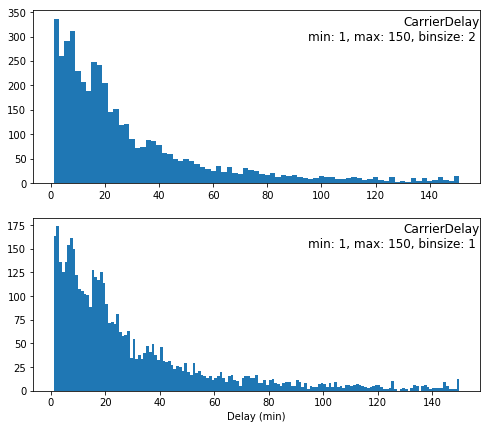

In [23]:
vars = ['CarrierDelay']
numPlots = 2;
for i in range(len(vars)):
    var = vars[i]
    min_values = [1, 1]
    max_values = [150, 150]
    binsizes = [2, 1]
    plot_histograms_stdAxis(flights, var, 'Delay (min)', numPlots, min_values, max_values, binsizes)

**'WeatherDelay' distribution**

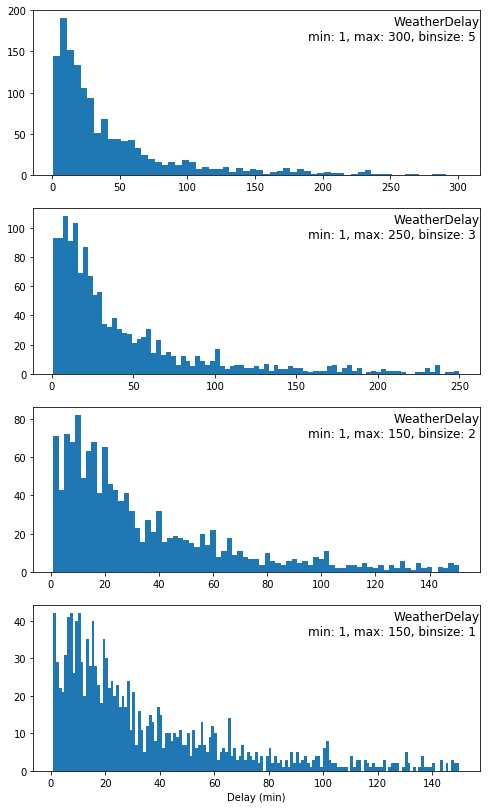

In [40]:
vars = ['WeatherDelay']
numPlots = 4;
for i in range(len(vars)):
    var = vars[i]
    min_values = [1, 1, 1, 1]
    max_values = [300, 250, 150, 150]
    binsizes = [5, 3, 2, 1]
    plot_histograms_stdAxis(flights, var, 'Delay (min)', numPlots, min_values, max_values, binsizes)

**'NASDelay' distribution**

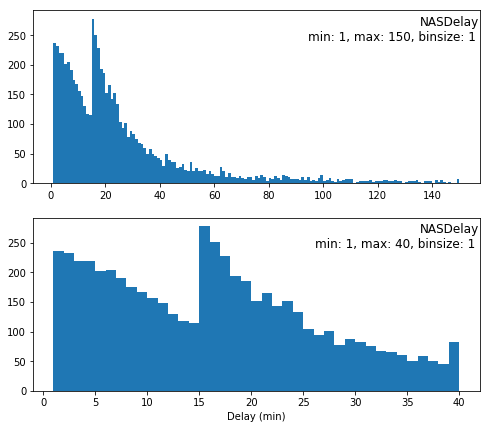

In [25]:
vars = ['NASDelay']
numPlots = 2;
for i in range(len(vars)):
    var = vars[i]
    min_values = [1, 1]
    max_values = [150, 40]
    binsizes = [1, 1]
    plot_histograms_stdAxis(flights, var, 'Delay (min)', numPlots, min_values, max_values, binsizes)

**'LateAircraftDelay' distribution**

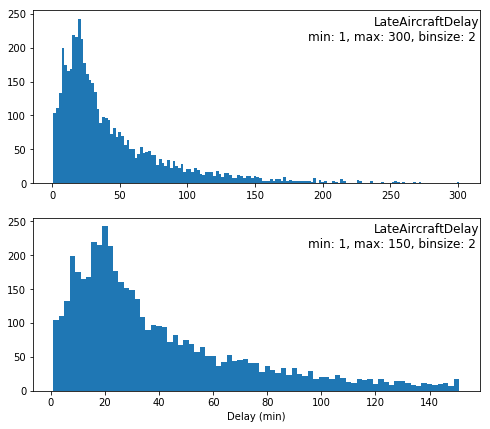

In [26]:
vars = ['LateAircraftDelay']
numPlots = 2;
for i in range(len(vars)):
    var = vars[i]
    min_values = [1, 1]
    max_values = [300, 150]
    binsizes = [2, 2]
    plot_histograms_stdAxis(flights, var, 'Delay (min)', numPlots, min_values, max_values, binsizes)

**Create log-scale histograms of 'ArrDelay' and 'DepDelay' variables**
* Start these histograms at a value larger than zero

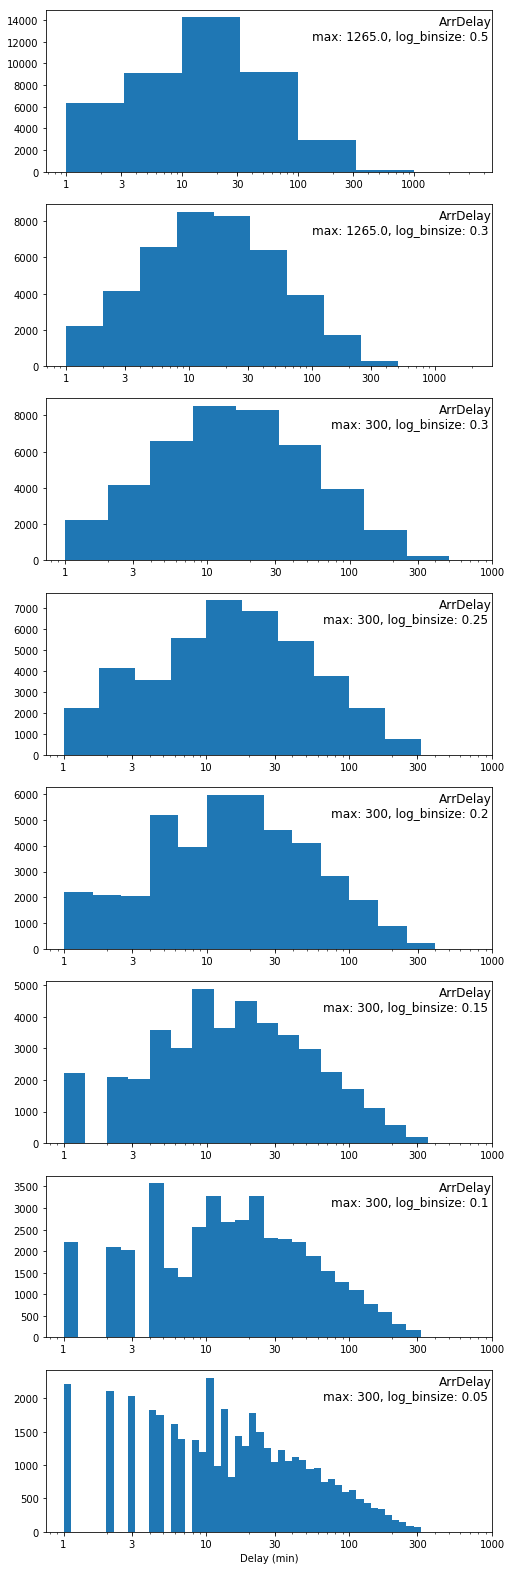

------------------------------------------------------------------------------------


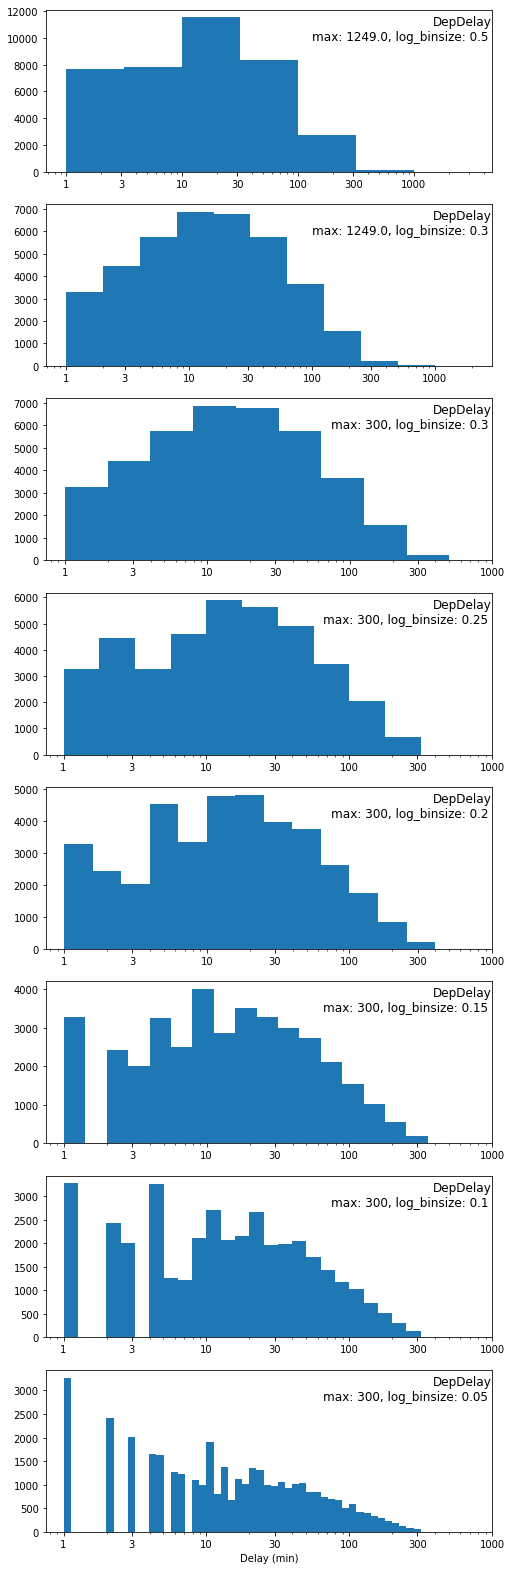

------------------------------------------------------------------------------------


In [96]:
vars = ['ArrDelay', 'DepDelay']
numPlots = 8;
for i in range(len(vars)):
    var = vars[i]
    max_values = [flights[var].max(),
                  flights[var].max(),
                  300, 300, 300, 300, 300, 300]
    log_binsizes = [0.5, 0.3, 0.3, 0.25, 0.2, 0.15, 0.1, 0.05]
    ticks = [1, 3, 10, 30, 100, 300, 1000]
    plot_histograms_logAxis(flights, var, 'Delay (min)', numPlots, max_values, log_binsizes, ticks)
    print('------------------------------------------------------------------------------------')

<a id='univariate_delay_additional_observations'></a>
([Top of Page](#top_of_page))<br>

**'Delay' Variables - Additional Observations**

* All 'Delay' variables appear to be roughly log-normal
* **'WeatherDelay'** - appears to be noisier than other delays. This is not surprising, given the unpredictable nature of weather events.
* **'NASDelay'** (i.e., National Air System Delay) - has a large spike in frequency at 15 minutes. This probably represents some sort of standard delay.
* **'LateAircraftDelay'** - has a spike at roughly 20 minutes, after which it is approximately logarithmic
* **'SecurityDelay'** - * It turns out this parameter is not _uniformly_ zero, but since it is _mostly_ zeros, this parameter is not a large driver of delays and will be ignored

**Select other variables for exploration**
* Start by previewing the columns and datatypes one more time

In [42]:
flights.dtypes

Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum               object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance               int64
TaxiIn               float64
TaxiOut              float64
Cancelled              int64
CancellationCode      object
Diverted               int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtype: object

Numerical variables of potential interest (create distributions):
* Month
* DepTime
* CRSDepTime
* ArrTime
* CRSArrTime
* ActualElapsedTime
* CRSElapsedTime
* AirTime
* Distance
* TaxiIn
* TaxiOut
* Cancelled
* Diverted

Categorical variables of potential interest (create bar plots):
* UniqueCarrier
* Origin
* Dest

In [24]:
vars_distr = ['Month', 'DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime', 'ActualElapsedTime',
              'CRSElapsedTime', 'AirTime', 'Distance', 'TaxiIn', 'TaxiOut', 'Cancelled', 'Diverted']

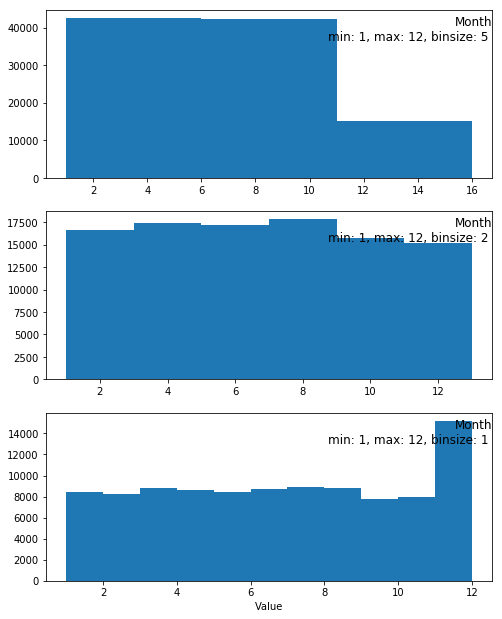

------------------------------------------------------------------------------------


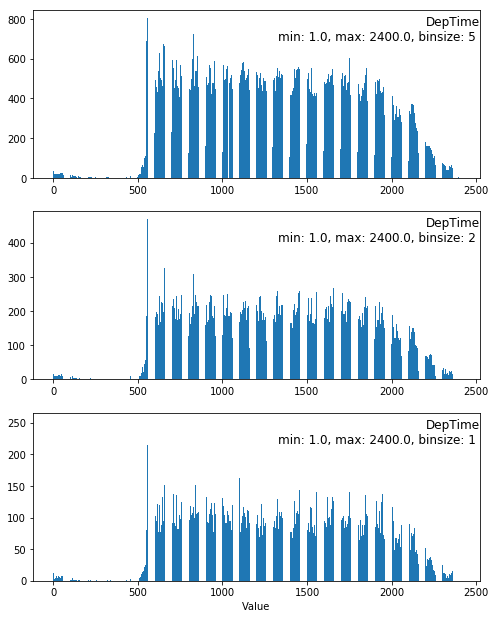

------------------------------------------------------------------------------------


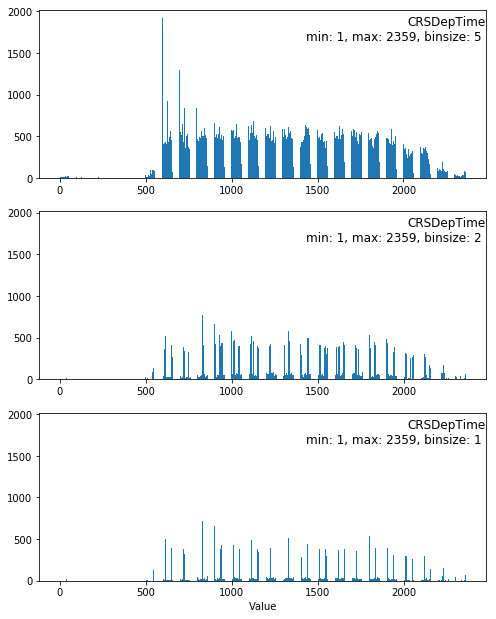

------------------------------------------------------------------------------------


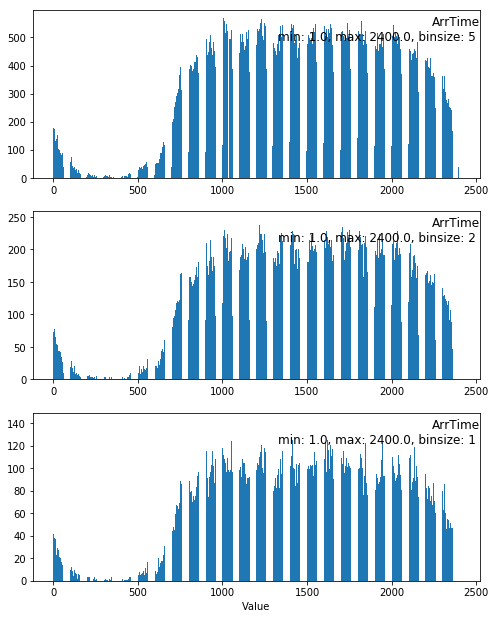

------------------------------------------------------------------------------------


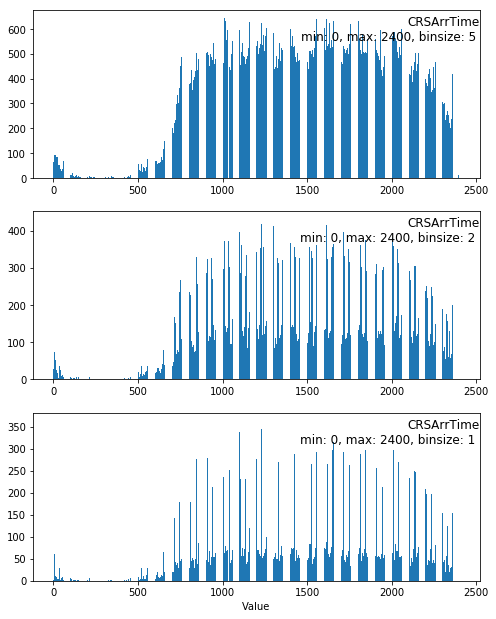

------------------------------------------------------------------------------------


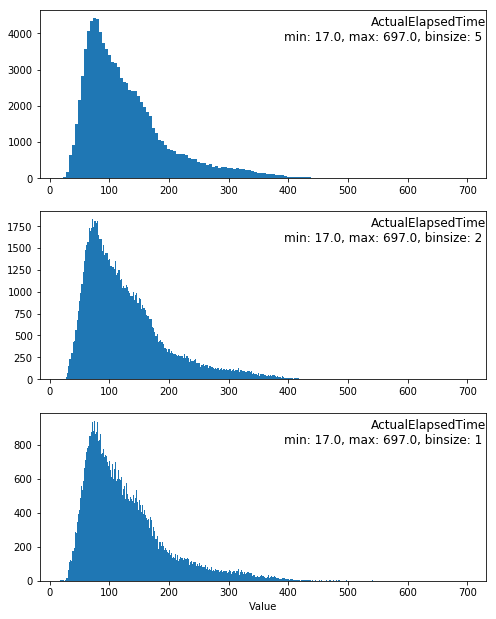

------------------------------------------------------------------------------------


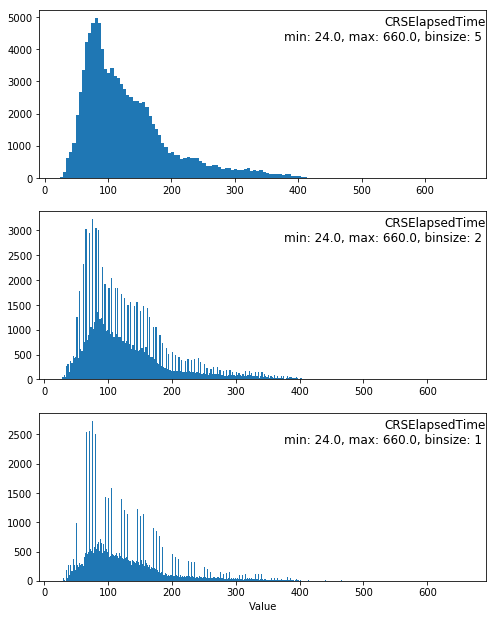

------------------------------------------------------------------------------------


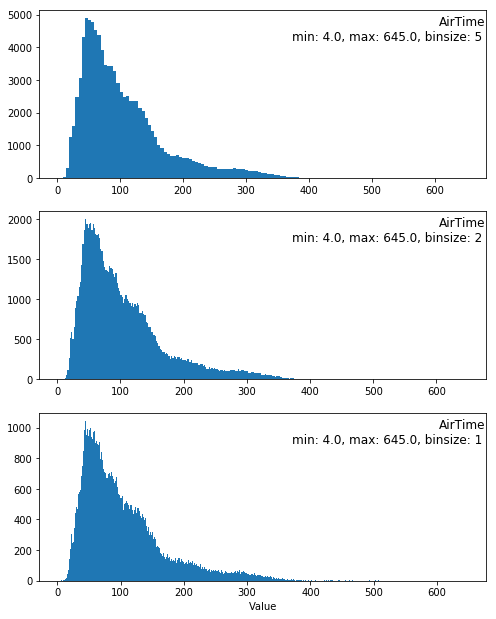

------------------------------------------------------------------------------------


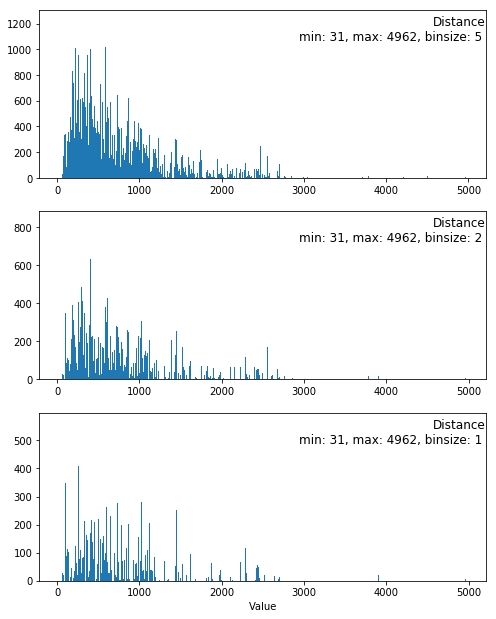

------------------------------------------------------------------------------------


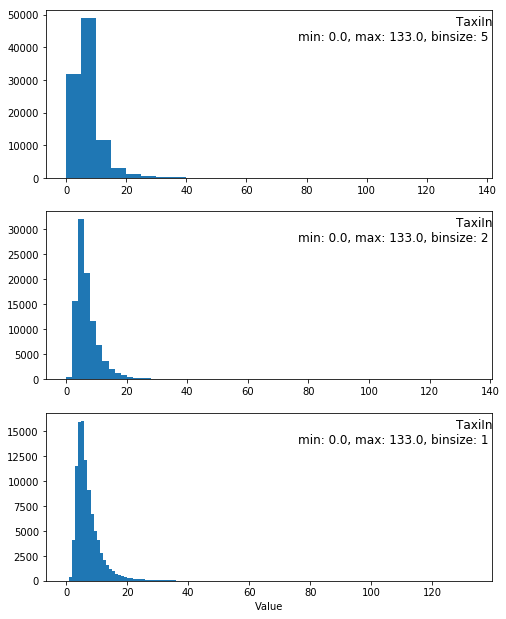

------------------------------------------------------------------------------------


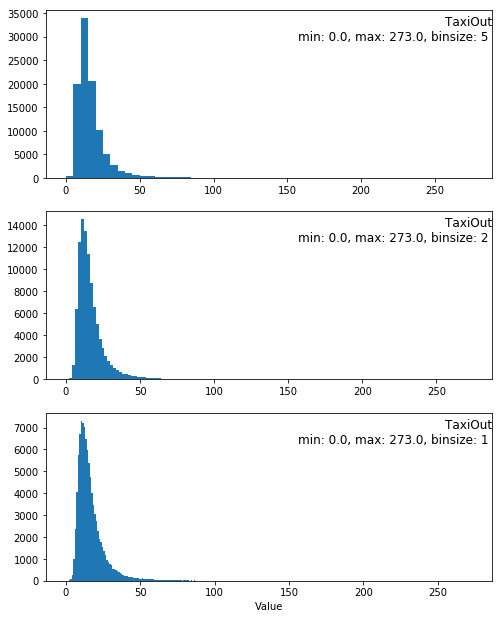

------------------------------------------------------------------------------------


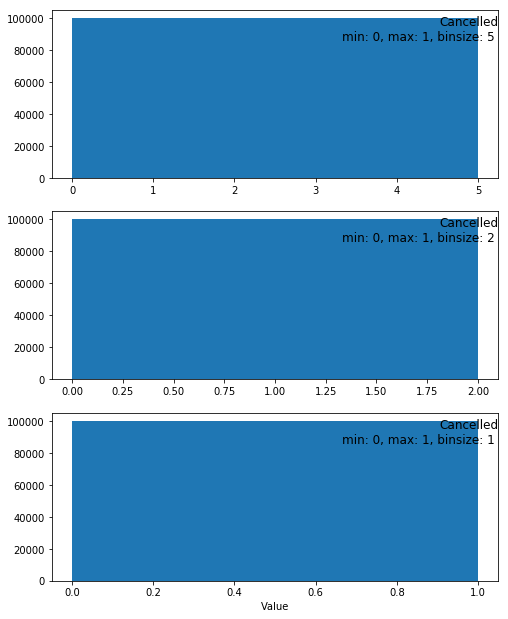

------------------------------------------------------------------------------------


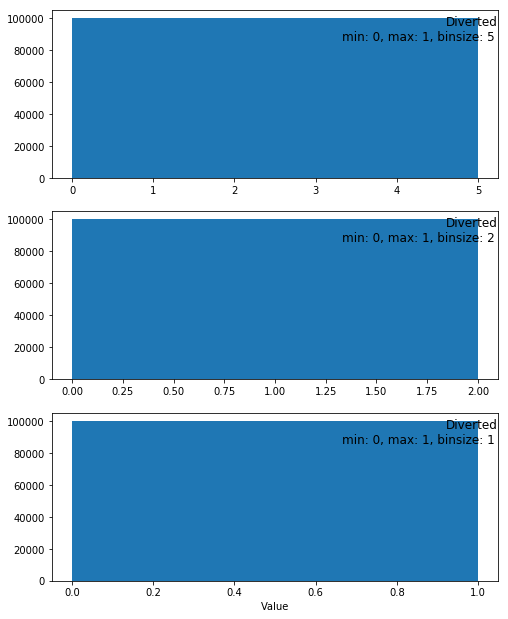

------------------------------------------------------------------------------------


In [32]:
numPlots = 3;
for i in range(len(vars_distr)):
    var = vars_distr[i]
    min_values = [flights[var].min(), flights[var].min(), flights[var].min()]
    max_values = [flights[var].max(), flights[var].max(), flights[var].max()]
    binsizes = [5, 2, 1]
    plot_histograms_stdAxis(flights, var, 'Value', numPlots, min_values, max_values, binsizes)
    print('------------------------------------------------------------------------------------')

**Zoom in on 'CRSElapsedTime' distribution**

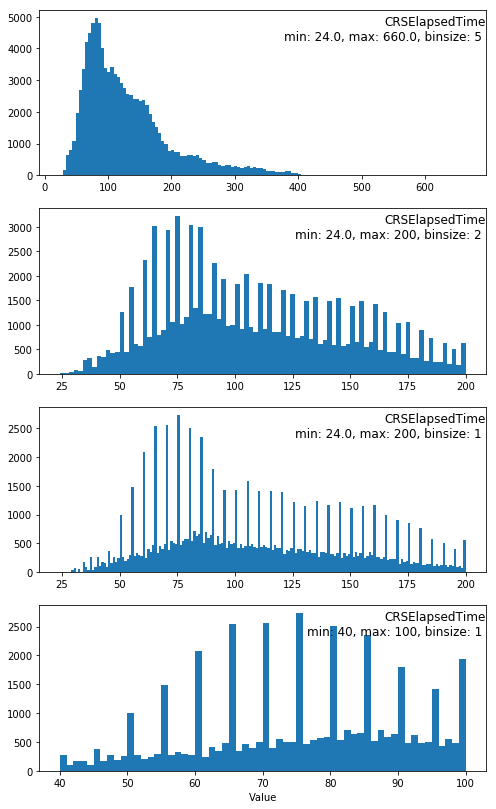

In [33]:
numPlots = 4;
var = 'CRSElapsedTime'
min_values = [flights[var].min(), flights[var].min(), flights[var].min(), 40]
max_values = [flights[var].max(), 200, 200, 100]
binsizes = [5, 2, 1, 1]
plot_histograms_stdAxis(flights, var, 'Value', numPlots, min_values, max_values, binsizes)

**Zoom in on 'Distance' distribution**

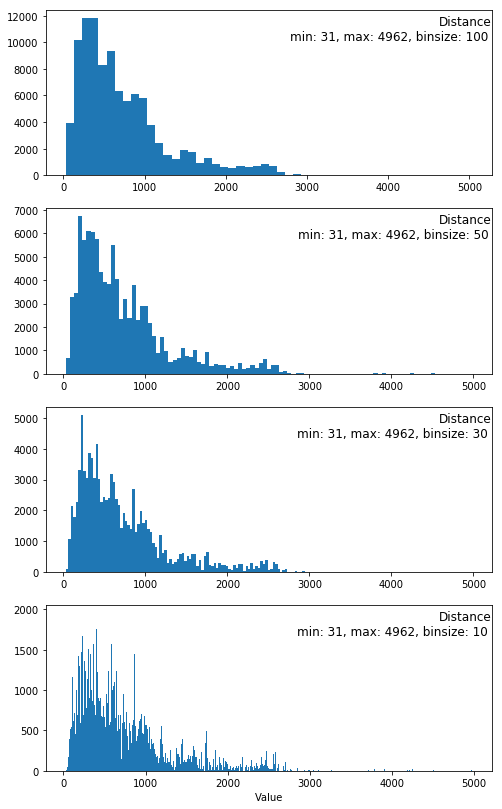

In [38]:
numPlots = 4;
var = 'Distance'
min_values = [flights[var].min(), flights[var].min(), flights[var].min(), flights[var].min()]
max_values = [flights[var].max(), flights[var].max(), flights[var].max(), flights[var].max()]
binsizes = [100, 50, 30, 10]
plot_histograms_stdAxis(flights, var, 'Value', numPlots, min_values, max_values, binsizes)

**Add 'Date', 'DayOfYear', and 'Week' parameters**

In [43]:
# add Date, Week, and DayOfYear parameters to the dataset
temp_date = pd.to_datetime(flights.Year*10000 +
                           flights.Month*100 +
                           flights.DayofMonth, format='%Y%m%d')
flights['Date'] = temp_date
flights['DayOfYear'] = flights['Date'].dt.dayofyear
flights['Week'] = flights['Date'].dt.week

In [44]:
# also add Date, Week, DayOfYear parameters to the larger dataset (in case it is needed later)
temp_date = pd.to_datetime(flights_all.Year*10000 +
                           flights_all.Month*100 +
                           flights_all.DayofMonth, format='%Y%m%d')
flights_all['Date'] = temp_date
flights_all['DayOfYear'] = flights_all['Date'].dt.dayofyear
flights_all['Week'] = flights_all['Date'].dt.week

**Plot the 'DayOfYear' distribution**

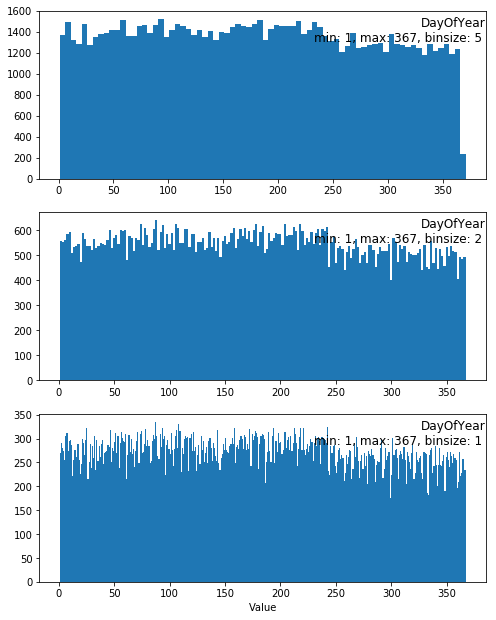

In [50]:
numPlots = 3;
var = 'DayOfYear'
min_values = [flights[var].min(), flights[var].min(), flights[var].min()]
max_values = [flights[var].max()+1, flights[var].max()+1, flights[var].max()+1]
binsizes = [5, 2, 1]
plot_histograms_stdAxis(flights, var, 'Value', numPlots, min_values, max_values, binsizes)

**Plot the 'Week' distribution**

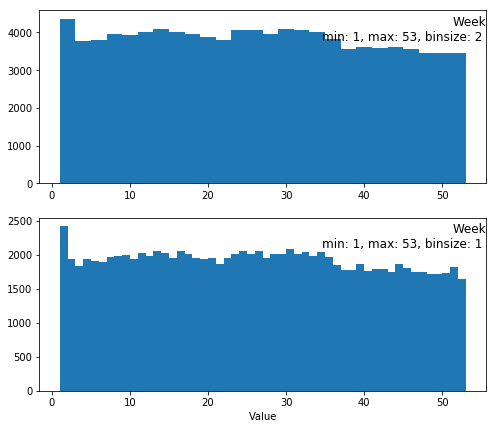

In [56]:
numPlots = 2;
var = 'Week'
min_values = [flights[var].min(), flights[var].min()]
max_values = [flights[var].max()+1, flights[var].max()+1]
binsizes = [2, 1]
plot_histograms_stdAxis(flights, var, 'Value', numPlots, min_values, max_values, binsizes)

In [45]:
print(flights.groupby('Origin').Origin.count().sort_values(ascending=False).count())
print(flights.groupby('Dest').Dest.count().sort_values(ascending=False).count())
print(flights.groupby('UniqueCarrier').UniqueCarrier.count().sort_values(ascending=False).count())

300
296
20


In [46]:
origins = flights.groupby('Origin').Origin.count().sort_values(ascending=False)
destinations = flights.groupby('Dest').Dest.count().sort_values(ascending=False)
carriers = flights.groupby('UniqueCarrier').UniqueCarrier.count().sort_values(ascending=False)

origins_head = (origins.head(10)) 
destinations_head = (destinations.head(10)) 
carriers_head = (carriers.head(10)) 

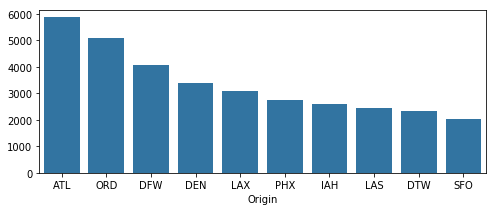

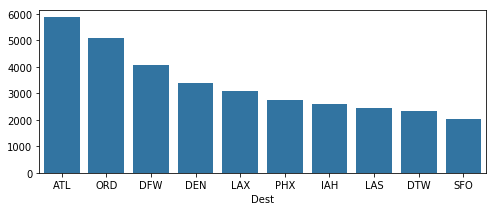

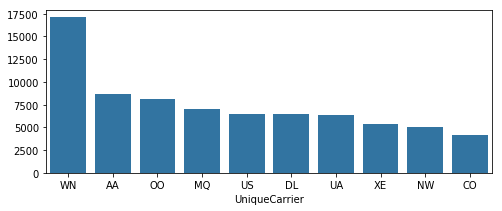

In [47]:
default_color = sb.color_palette()[0]

plt.figure(figsize = [8, 3])
ax = sb.barplot(origins_head.index, origins_head.values, color = default_color);

plt.figure(figsize = [8, 3])
ax = sb.barplot(destinations_head.index, origins_head.values, color = default_color);

plt.figure(figsize = [8, 3])
ax = sb.barplot(carriers_head.index, carriers_head.values, color = default_color);

In [48]:
top10_origin = flights.groupby('Origin').Origin.count().sort_values(ascending=False)[0:10].index.tolist()
top10_carrier = flights.groupby('UniqueCarrier').UniqueCarrier.count().sort_values(ascending=False)[0:10].index.tolist()
print(top10_origin, '\n---------\n', top10_carrier)

['ATL', 'ORD', 'DFW', 'DEN', 'LAX', 'PHX', 'IAH', 'LAS', 'DTW', 'SFO'] 
---------
 ['WN', 'AA', 'OO', 'MQ', 'US', 'DL', 'UA', 'XE', 'NW', 'CO']


<a id='univariate_otherVar_observations'></a>
([Top of Page](#top_of_page))<br>

**Other Variables - Observations:**

* **'Month'** - The number of flights spikes during December. I am not surprised by this, but I find the magnitude of the spike interesting.
* **'DepTime'**:
  - There are very few departures between 12:00 am and 5:00 am
* **'CRSDepTime'**
  - There are a large number of departures _scheduled_ for 6:00 am and 7:00 am.
  - Departures are frequently scheduled on the hour or on the half hour
* **'ArrTime'** - The number of arrivals is roughly constant from 10:00 am to 10:00 pm.
* **'ActualElapsedTime'** - The most frequent elapsed time is ~90 minutes
* **'CRSElapsedTime'** - Flight lengths have a tendency to be scheduled on 5 minute intervals
* **'AirTime'** and **'Distance'** - There is some slight multi-modality to these variables
  - This probably reflects different 'tiers' of flights involving distance and/or aircraft type
* **'DayOfYear'**
  - the histograms show a consistent number of flights throughout the year
  - I would have thought that there would be an increase in flights duing the holidays
  - Perhaps the holidays just have an increase in passengers instead of flights
    - I could see how the airlines might fly fuller and/or larger planes during the holidays to accomodate the increase in passengers
    - I assume there is an actual increase in number of travelers during the holidays, but this dataset does not provide number of passengers
* **'Origin'** and **'Dest'**
  - There are ~300 different airports represtented by each of these variables
  - To focus things, I will only analyze the top 5 to 10 airports in subsequent plots
* **'UniqueCarrier'**
  - Similar to **'Origin'** and **'Dest'**, I will only analyze the top 5 to carriers in subsequent plots (in order to focus the analysis)

<a id='univariate_exploration_summary'></a>
([Top of Page](#top_of_page))
## Univariate Exploration - Summary

<a id='univariate_exploration_describe_distributions_of_interest'></a>
([Top of Page](#top_of_page))
### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

**Observations (largely repeated from prior comments):**
* All 'Delay' variables appear to be roughly log-normal.
  * Depending on the particular visualization, it may be useful to log transform these variables in future plots.
* **'CarrierDelay', 'WeatherDelay', 'NASDelay',** and **'LateAircraftDelay'**:
  * Each have a large number of points at or very near zero.
  * This disguises the true nature of these distributions.
  * Future plots utilizing these parameters may need to filter for values greater than zero
* **'NASDelay'** (i.e., National Air System Delay):
  * Has a large spike in frequency at 15 minutes. This probably represents some sort of standard delay.
* **'LateAircraftDelay'**:
  * Has a spike at roughly 20 minutes, after which it is approximately logarithmic
* **'WeatherDelay'**:
  * Appears to be noisier than other delays. This is not surprising, given the unpredictable nature of weather events.
* **'SecurityDelay'**
  * is not _uniformly_ zero values, but it is _mostly_ zero values
  * as such, this parameter is not a large driver of delays and will be ignored
* **'Month'**
  * The number of flights spikes during December. I am not surprised by this, but I find the magnitude of the spike interesting.
* **'DepTime'**:
  * There are very few departures between 12:00 am and 5:00 am
* **'CRSDepTime'**
  * There are a large number of departures _scheduled_ for 6:00 am and 7:00 am.
  * Departures are frequently scheduled on the hour or on the half hour
* **'ArrTime'**
  * The number of arrivals is roughly constant from 10:00 am to 10:00 pm.
* **'ActualElapsedTime'**
  * The most frequent elapsed time is ~90 minutes
* **'CRSElapsedTime'**
  * Flight lengths have a tendency to be scheduled on 5 minute intervals
* **'AirTime'** and **'Distance'**
  * There is some slight multi-modality to these variables
  * This probably reflects different 'tiers' of flights involving distance and/or aircraft type
* **'DayOfYear'**
  - the histograms show a consistent number of flights throughout the year
  - I would have thought that there would be an increase in flights duing the holidays
  - Perhaps the holidays just have an increase in passengers instead of flights
    - I could see how the airlines might fly fuller and/or larger planes during the holidays to accomodate the increase in passengers
    - I assume there is an actual increase in number of travelers during the holidays, but this dataset does not provide number of passengers
* **'Origin'** and **'Dest'**
  - There are ~300 different airports represtented by each of these variables
  - To focus things, I will only analyze the top 5 to 10 airports in subsequent plots
* **'UniqueCarrier'**
  - Similar to **'Origin'** and **'Dest'**, I will only analyze the top 5 to carriers in subsequent plots (in order to focus the analysis)
  
**Most likely variables of interest:**
* The various 'Delay' variables
  * notably:  **'ArrDelay'** and **'DepDelay'**
* **'DayOfYear'**
* **'Week'**
* **'Origin'**
* **'Dest'**
* **'UniqueCarrier'**

<a id='univariate_exploration_unusual_distributions_and_modifications'></a>
([Top of Page](#top_of_page))
### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

* **The nature of several distributions is discussed in the section immediately preceeding this question**
<br><br>

* **I performed very little cleaning or tidying of the data.**
  * Although there are several NAN values in the various delay parameters, I chose not to delete these because there is a lot of other data in those rows that is still valid.
  * I also chose not to fill NaN's with zeros, since that would skew the statistics of various parameers.
  * I took the same approach with outliers: choosing not to modify them in order to maintain the integrity of the data.
  * To get around the unusual distribution, NaN, and outlier issues, I intend to specify (where appropriate) axis limits and/or axis transformations on future plots
  * Overall, the dataset is fairly clean as-is, and cleaning it would result in significant loss and/or corruption of data.
<br><br>

* **I did add three new features: 'Date' 'Week' and 'DayOfYear'**
  * **'Date'** 
    * added to make use of 'DateTime' methods
    * Creating a **'Date'** feature enabled the subsequent creation of the **'Week'** and **'DayOfYear'** features, which I consider to be necessary features
  * **'Week'**
    * Added to have a quick and easy way to view data over the course of the year
  * **DayOfYear**
    * Similar to **'Week'**, this was added to have a quick and easy way to view data over the course of the year
    * However, this variable will allow for a finer level of granularity than the **'Week'** variable

<a id='bivariate_exploration'></a>
([Top of Page](#top_of_page))
## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

<span style="color:red">

## Next Steps / BiVariate
**Add simple version of the following:**
* box plots 
* violin plots
* X-Y plots
* add scatter matrix?
</span>

<a id='bivariate_exploration_2D_Histograms'></a>
([Top of Page](#top_of_page))
### 2D Histograms

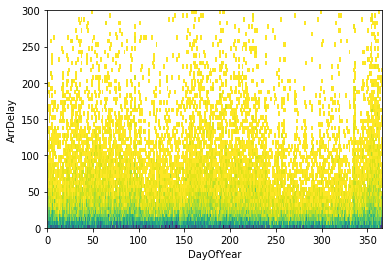

In [131]:
# hist2d returns a number of different variables, including an array of counts
bins_x = np.arange(0, 366+1, 1)
bins_y = np.arange(0, 300+5, 5)
h2d = plt.hist2d(data = flights, y = 'ArrDelay', x = 'DayOfYear',
               bins = [bins_x, bins_y], cmap = 'viridis_r', cmin = 1)
plt.ylabel('ArrDelay')
plt.xlabel('DayOfYear');

In [ ]:
def plot_histograms_logAxis(flights, var, xaxis_label, numPlots, max_vals, log_binsizes, ticks):
    fig, ax = plt.subplots(nrows=numPlots, figsize = [8, numPlots * 3.5])
    labels = ['{}'.format(v) for v in ticks]
    for i in range(numPlots):
        #bin_edges = np.arange(min_vals[i], max_vals[i]+binsizes[i], binsizes[i])        
        #bin_edges =       np.arange(min_vals[i],            max_vals[i]+binsizes[i], binsizes[i])
        bin_edges = 10 ** np.arange(0, np.log10(max_vals[i])+log_binsizes[i], log_binsizes[i])
        ax[i].hist(data = flights, x = var, bins = bin_edges);
        ax[i].set_xscale('log')
        ax[i].xaxis.set_ticks(ticks)
        ax[i].xaxis.set_ticklabels(labels)
        ax[i].set_title(flights[var].name + '\n' +
                        'max: ' + str(max_vals[i]) +
                        ', log_binsize: ' +
                        str(log_binsizes[i]) + ' ',
                        pad=-30, loc='right')

    plt.xlabel(xaxis_label)
    plt.show()

In [ ]:
def plot_2D_hist(data, xVar, yVar, x_binsizes, ticks):
    x = flights[xVar]
    y = flights[yVar]
    
    x_min_val = 0
    x_max_val = flights[xVar].max()
    x_binSize = 5
    x_bin_edges = np.arange(x_min_val, x_max_val+x_binSize, x_binSize)

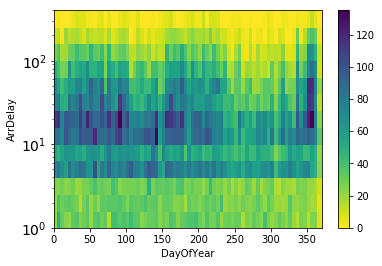

In [125]:
x = flights['DayOfYear']
y = flights['ArrDelay']

x_min_val = 0
x_max_val = 366
x_binSize = 5
x_bin_edges = np.arange(x_min_val, x_max_val+x_binSize, x_binSize)

y_min_val = 0
y_max_val = 300
y_logBinSize = 0.2
y_bin_edges = 10 ** np.arange(y_min_val, np.log10(y_max_val)+y_logBinSize, y_logBinSize)

counts, _, _ = np.histogram2d(x, y, bins=(x_bin_edges, y_bin_edges))

fig, ax = plt.subplots()
plt.pcolormesh(x_bin_edges, y_bin_edges, counts.T, cmap = 'viridis_r')
tick_locs = [1, 10, 100]
#tick_locs = [0, 1, 3, 10, 30, 100, 300]
labels = ['{}'.format(v) for v in tick_locs]
plt.ylabel('ArrDelay')
plt.xlabel('DayOfYear')
plt.yticks(tick_locs, labels, fontsize=14)

ax.figure.axes[-1].set_yscale('log')
plt.colorbar()
plt.show()

In [ ]:
x = flights['DayOfYear']
y = flights['DepDelay']

x = flights['ArrTime']
y = flights['ArrDelay']

x = flights['DepTime']
y = flights['ArrDelay']

**Next, I am going to create some violin plots to assess how the distributions of ArrDelay and DepDelay vary based on a second variable:**
* Second variables of interest: Origin (airport) and Unique Carrier (airline)
* To focus the analysis, I am only going to look at the top 10 most frequented airports and airlines

<a id='bivariate_exploration_violinPlots'></a>
([Top of Page](#top_of_page))
### Violin Plots

In [137]:
print(top10_origin, '\n---------\n', top10_carrier)

['ATL', 'ORD', 'DFW', 'DEN', 'LAX', 'PHX', 'IAH', 'LAS', 'DTW', 'SFO'] 
---------
 ['WN', 'AA', 'OO', 'MQ', 'US', 'DL', 'UA', 'XE', 'NW', 'CO']


In [138]:
flights_reduced = flights[flights.Origin.isin(top10_origin)]
flights_reduced = flights_reduced[flights_reduced.UniqueCarrier.isin(top10_carrier)]

In [136]:
flights.groupby('UniqueCarrier').UniqueCarrier.count().sort_values(ascending=False)[0:10]

UniqueCarrier
WN    17072
AA     8697
OO     8165
MQ     6959
US     6475
DL     6461
UA     6408
XE     5327
NW     5002
CO     4189
Name: UniqueCarrier, dtype: int64

In [ ]:
default_color = sb.color_palette()[0]

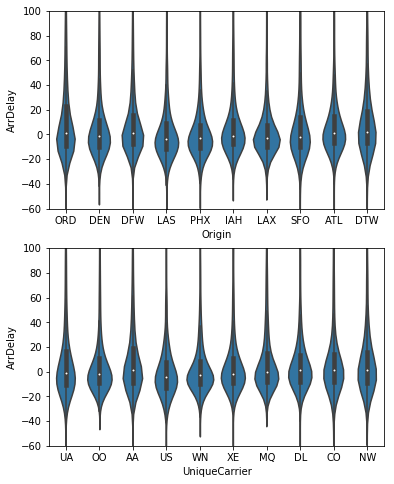

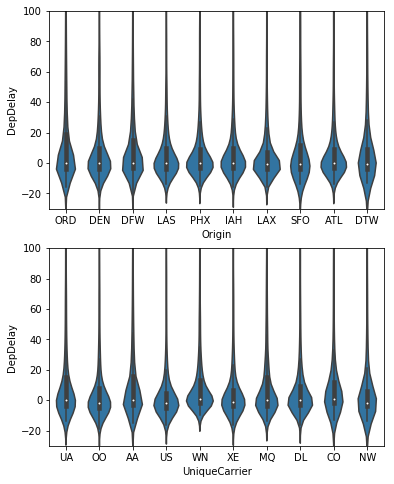

In [166]:
# plot arrival delay distribution against origin and unique carrier
fig, ax = plt.subplots(ncols = 1, nrows = 2, figsize = [6,8], squeeze=False)
categoric_vars = ['Origin', 'UniqueCarrier']
for i in range(len(categoric_vars)):
    var = categoric_vars[i]
    sb.violinplot(data = flights_reduced, x = var, y = 'ArrDelay', ax = ax[i,0], color = default_color)
    ax[i,0].set(ylim=(-60,100))
plt.show()

# plot departure delay distribution against origin and unique carrier
fig, ax = plt.subplots(ncols = 1, nrows = 2, figsize = [6,8], squeeze=False)
categoric_vars = ['Origin', 'UniqueCarrier']
for i in range(len(categoric_vars)):
    var = categoric_vars[i]
    sb.violinplot(data = flights_reduced, x = var, y = 'DepDelay', ax = ax[i,0], color = default_color)
    ax[i,0].set(ylim=(-30,100))
plt.show()

Observations:
* There doesn't seem to be much appreciable difference between the distributions
* However, a horizontal aspect would be easier to read
* Also, the axis needs to be altered: either a log scale or changing the limits will work.

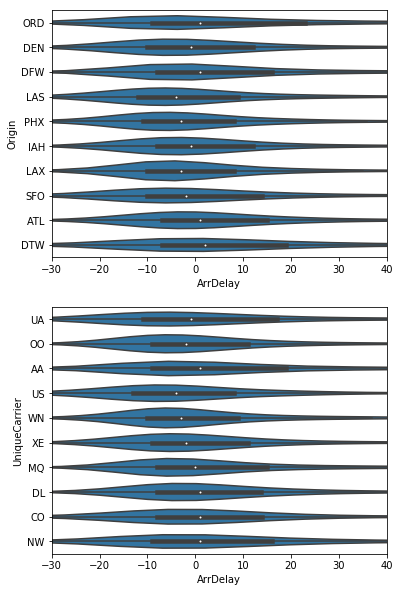

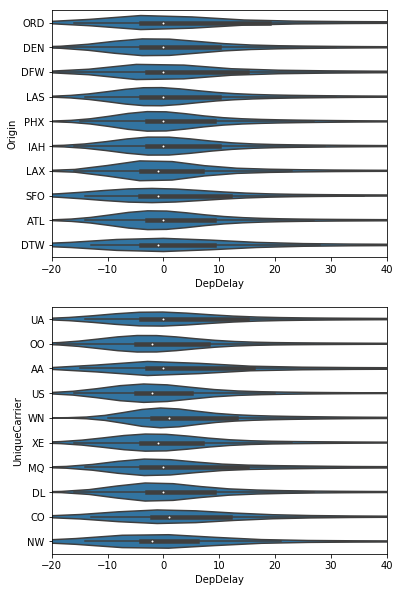

In [165]:
# plot arrival delay distribution against origin and unique carrier
fig, ax = plt.subplots(ncols = 1, nrows = 2, figsize = [6,10], squeeze=False)
categoric_vars = ['Origin', 'UniqueCarrier']
for i in range(len(categoric_vars)):
    var = categoric_vars[i]
    sb.violinplot(data = flights_reduced, y = var, x = 'ArrDelay', ax = ax[i,0], color = default_color)
    ax[i,0].set(xlim=(-30,40))
plt.show()

# plot departure delay distribution against origin and unique carrier
fig, ax = plt.subplots(ncols = 1, nrows = 2, figsize = [6,10], squeeze=False)
categoric_vars = ['Origin', 'UniqueCarrier']
for i in range(len(categoric_vars)):
    var = categoric_vars[i]
    sb.violinplot(data = flights_reduced, y = var, x = 'DepDelay', ax = ax[i,0], color = default_color)
    ax[i,0].set(xlim=(-20,40))
plt.show()

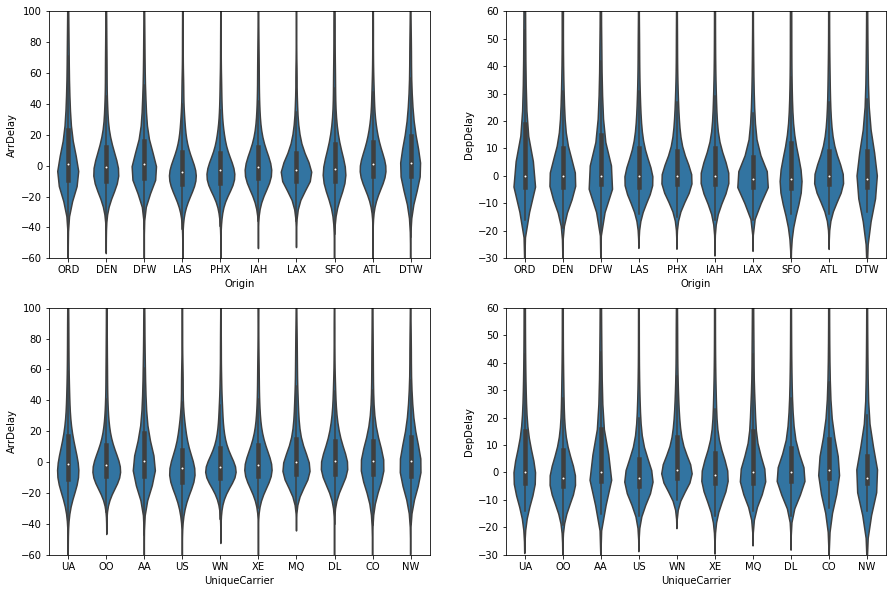

In [140]:
default_color = sb.color_palette()[0]

# plot origin and unique carrier arrival delay
fig, ax = plt.subplots(ncols = 2, nrows = 2, figsize = [15,10], squeeze=False)

categoric_vars = ['Origin', 'UniqueCarrier']

for i in range(len(categoric_vars)):
    var = categoric_vars[i]
    sb.violinplot(data = flights_reduced, x = var, y = 'ArrDelay', ax = ax[i,0], color = default_color)
    ax[i,0].set(ylim=(-60,100))
    
    sb.violinplot(data = flights_reduced, x = var, y = 'DepDelay', ax = ax[i,1], color = default_color)
    ax[i,1].set(ylim=(-30,60))

plt.show()

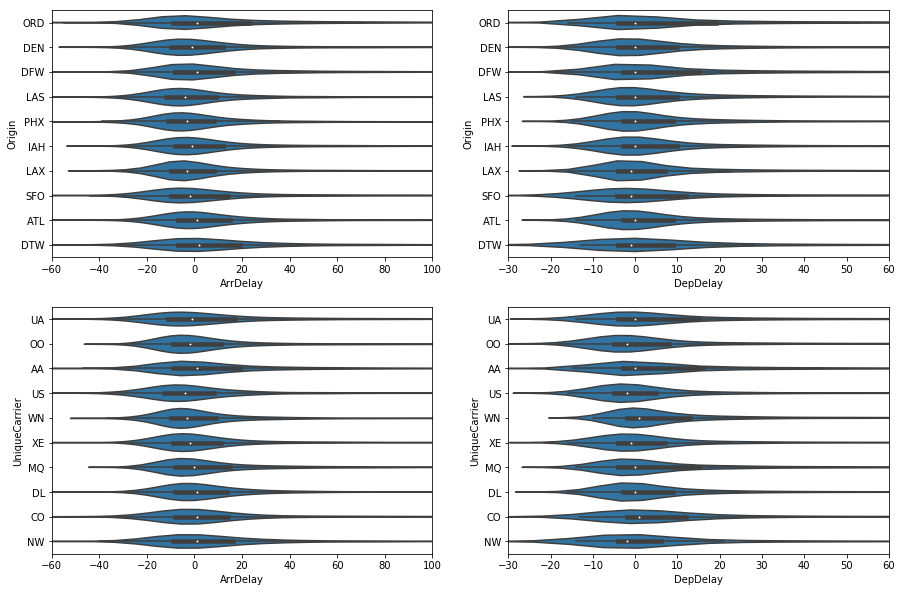

In [144]:
default_color = sb.color_palette()[0]

# plot origin and unique carrier arrival delay
fig, ax = plt.subplots(ncols = 2, nrows = 2, figsize = [15,10], squeeze=False)

categoric_vars = ['Origin', 'UniqueCarrier']

for i in range(len(categoric_vars)):
    var = categoric_vars[i]
    sb.violinplot(data = flights_reduced, y = var, x = 'ArrDelay', ax = ax[i,0], color = default_color)
    ax[i,0].set(xlim=(-60,100))
    
    sb.violinplot(data = flights_reduced, y = var, x = 'DepDelay', ax = ax[i,1], color = default_color)
    ax[i,1].set(xlim=(-30,60))

plt.show()

<a id='bivariate_exploration_boxPlots'></a>
([Top of Page](#top_of_page))
### Box Plots
**Create some Box Plots to better assess the nature of each distribution**

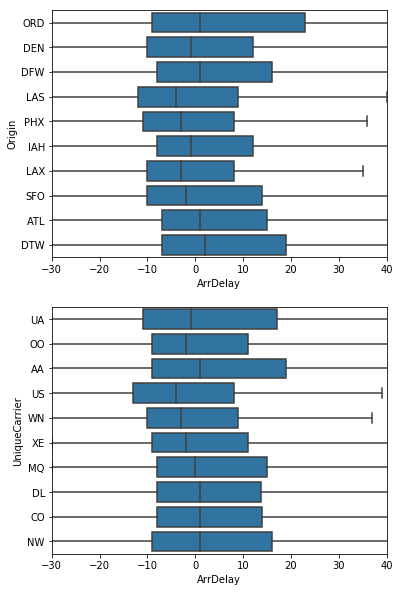

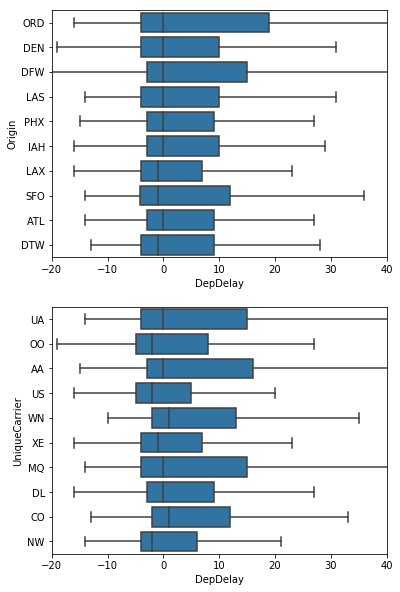

In [167]:
# plot arrival delay distribution against origin and unique carrier
fig, ax = plt.subplots(ncols = 1, nrows = 2, figsize = [6,10], squeeze=False)
categoric_vars = ['Origin', 'UniqueCarrier']
for i in range(len(categoric_vars)):
    var = categoric_vars[i]
    sb.boxplot(data = flights_reduced, y = var, x = 'ArrDelay', ax = ax[i,0], color = default_color, sym='')
    ax[i,0].set(xlim=(-30,40))
plt.show()

# plot departure delay distribution against origin and unique carrier
fig, ax = plt.subplots(ncols = 1, nrows = 2, figsize = [6,10], squeeze=False)
categoric_vars = ['Origin', 'UniqueCarrier']
for i in range(len(categoric_vars)):
    var = categoric_vars[i]
    sb.boxplot(data = flights_reduced, y = var, x = 'DepDelay', ax = ax[i,0], color = default_color, sym='')
    ax[i,0].set(xlim=(-20,40))
plt.show()

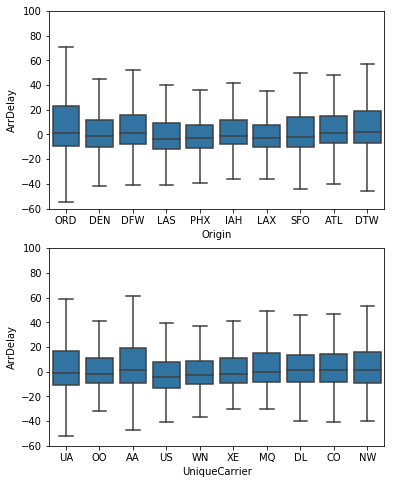

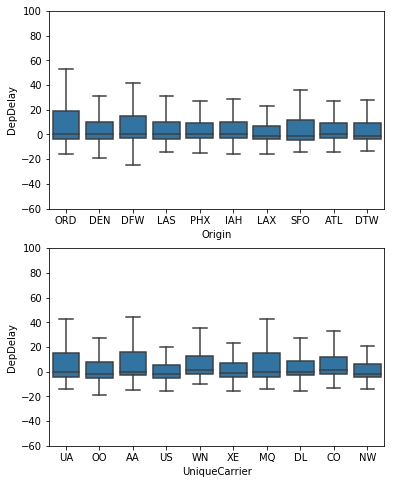

In [158]:
default_color = sb.color_palette()[0]

# plot arrival delay distribution against origin and unique carrier
fig, ax = plt.subplots(ncols = 1, nrows = 2, figsize = [6,8], squeeze=False)
categoric_vars = ['Origin', 'UniqueCarrier']
for i in range(len(categoric_vars)):
    var = categoric_vars[i]
    #sb.violinplot(data = flights_samp_reduced, x = var, y = 'ArrDelay', ax = ax[i,0], color = default_color)
    sb.boxplot(data = flights_reduced, x = var, y = 'ArrDelay', ax = ax[i,0], color = default_color, sym='')
    ax[i,0].set(ylim=(-60,100))
plt.show()

# plot departure delay distribution against origin and unique carrier
fig, ax = plt.subplots(ncols = 1, nrows = 2, figsize = [6,8], squeeze=False)
categoric_vars = ['Origin', 'UniqueCarrier']
for i in range(len(categoric_vars)):
    var = categoric_vars[i]
    #sb.violinplot(data = flights_samp_reduced, x = var, y = 'DepDelay', ax = ax[i,0], color = default_color)
    sb.boxplot(data = flights_reduced, x = var, y = 'DepDelay', ax = ax[i,0], color = default_color, sym='')
    ax[i,0].set(ylim=(-60,100))
plt.show()

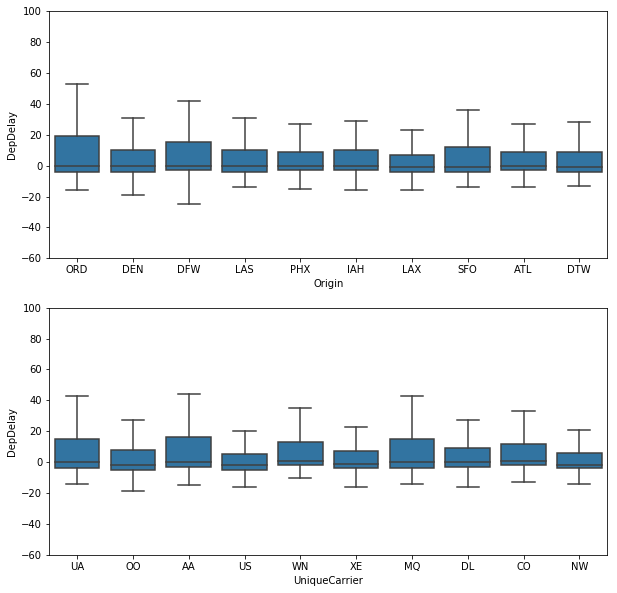

In [154]:
default_color = sb.color_palette()[0]

# plot origin and unique carrier arrival delay
fig, ax = plt.subplots(ncols = 1, nrows = 2, figsize = [10,10], squeeze=False)
categoric_vars = ['Origin', 'UniqueCarrier']
for i in range(len(categoric_vars)):
    var = categoric_vars[i]
    #sb.violinplot(data = flights_samp_reduced, x = var, y = 'DepDelay', ax = ax[i,0], color = default_color)
    sb.boxplot(data = flights_reduced, x = var, y = 'DepDelay', ax = ax[i,0], color = default_color, sym='')
    ax[i,0].set(ylim=(-60,100))
plt.show()

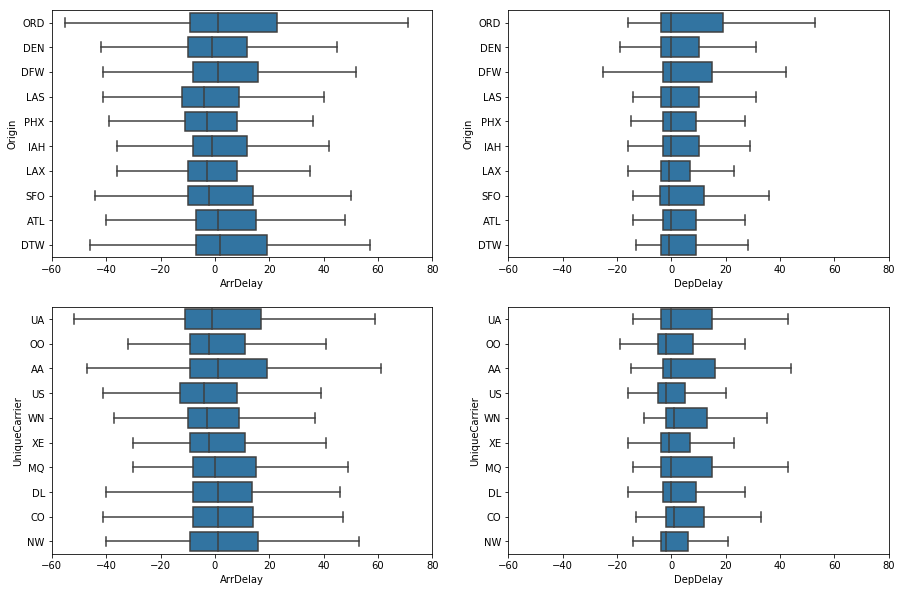

In [148]:
default_color = sb.color_palette()[0]

# plot origin and unique carrier arrival delay
fig, ax = plt.subplots(ncols = 2, nrows = 2, figsize = [15,10], squeeze=False)

categoric_vars = ['Origin', 'UniqueCarrier']

for i in range(len(categoric_vars)):
    var = categoric_vars[i]
    #sb.violinplot(data = flights_samp_reduced, x = var, y = 'ArrDelay', ax = ax[i,0], color = default_color)
    sb.boxplot(data = flights_reduced, y = var, x = 'ArrDelay', ax = ax[i,0], color = default_color, sym="")
    ax[i,0].set(xlim=(-60,80))
    
    sb.boxplot(data = flights_reduced, y = var, x = 'DepDelay', ax = ax[i,1], color = default_color, sym="")
    ax[i,1].set(xlim=(-60,80))

plt.show()

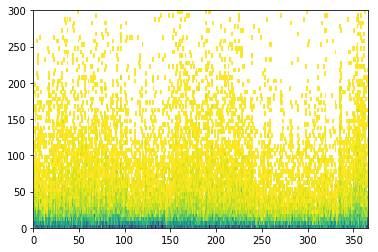

In [49]:
# hist2d returns a number of different variables, including an array of counts
bins_x = np.arange(0, 366+1, 1)
#bins_y = np.arange(20, 300+0.1, 0.1)
bins_y = np.arange(0, 300+5, 5)

#bins_x = np.arange(1, 10.5+1, 1)
#bins_y = np.arange(-0.5, 10.5+1, 1)
h2d = plt.hist2d(data = flights, y = 'ArrDelay', x = 'DayOfYear',
               bins = [bins_x, bins_y], cmap = 'viridis_r', cmin = 1)
counts = h2d[0]

## loop through the cell counts and add text annotations for each
#for i in range(counts.shape[0]):
#    for j in range(counts.shape[1]):
#        c = counts[i,j]
#        if c >= 7: # increase visibility on darkest cells
#            plt.text(bins_x[i]+0.5, bins_y[j]+0.5, int(c),
#                     ha = 'center', va = 'center', color = 'white')
#        elif c > 0:
#            plt.text(bins_x[i]+0.5, bins_y[j]+0.5, int(c),
#                     ha = 'center', va = 'center', color = 'black')

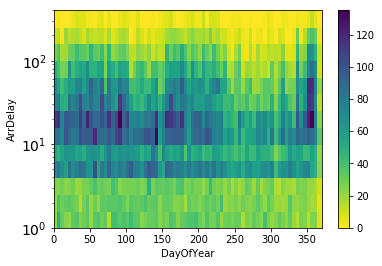

In [122]:
x = flights['DayOfYear']
y = flights['ArrDelay']

x_min_val = 0
x_max_val = 366
x_binSize = 5
x_bin_edges = np.arange(x_min_val, x_max_val+x_binSize, x_binSize)

y_min_val = 0
y_max_val = 300
y_logBinSize = 0.2
y_bin_edges = 10 ** np.arange(y_min_val, np.log10(y_max_val)+y_logBinSize, y_logBinSize)

counts, _, _ = np.histogram2d(x, y, bins=(x_bin_edges, y_bin_edges))

fig, ax = plt.subplots()
#ax = plt.pcolormesh(x_bin_edges, y_bin_edges, counts.T, cmap = 'viridis_r')
plt.pcolormesh(x_bin_edges, y_bin_edges, counts.T, cmap = 'viridis_r')
#ax.pcolormesh(x_bin_edges, y_bin_edges, counts.T, cmap = 'viridis_r')
#ax = plt.scatter(data = flights_samp_weather, x='DayOfYear', y='ArrDelay', alpha=1, cmap='Reds', c='WeatherDelay');
#plt.xlabel('Day of Year', fontsize=14)
#plt.ylabel('Arrival Delay (min)', fontsize=14)
#plt.yscale('log')
tick_locs = [1, 10, 100]
#tick_locs = [0, 1, 3, 10, 30, 100, 300]
labels = ['{}'.format(v) for v in tick_locs]
#plt.ylabels.set_ticklabels(labels)
#ax.set_yticklabels(labels)
#plt.set_ticklabels(labels)
plt.ylabel('ArrDelay')
plt.xlabel('DayOfYear')
#ax.ylabel(r"Labels", fontsize = 12)

# tick_locs = [30, 100, 300, 1000]
#ax.figure.axes[0].set_yscale('log')
plt.yticks(tick_locs, labels, fontsize=14)
# plt.xticks(fontsize=14)
# #ax.figure.axes[-1].tick_params(labelsize=14)
# plt.ylim(30, 2000)
# plt.colorbar()
# ax.figure.axes[-1].tick_params(labelsize=14)
# ax.figure.axes[-1].set_ylabel('Weather Delay (min)', size=14)

ax.figure.axes[-1].set_yscale('log')
#ax.figure.axes[-1].set_yscale('log')
#ax.figure.axes[-1].set_yticklabels(labels)
#ax.set_yscale('log')
plt.colorbar()
plt.show()

In [ ]:
x = flights['DayOfYear']
y = flights['ArrDelay']

x_min_val = 0
x_max_val = 366
x_binSize = 5
x_bin_edges = np.arange(x_min_val, x_max_val+x_binSize, x_binSize)

y_min_val = 0
y_max_val = 300
y_logBinSize = 0.2
y_bin_edges = 10 ** np.arange(y_min_val, np.log10(y_max_val)+y_logBinSize, y_logBinSize)

counts, _, _ = np.histogram2d(x, y, bins=(x_bin_edges, y_bin_edges))

fig, ax = plt.subplots()
ax = plt.pcolormesh(x_bin_edges, y_bin_edges, counts.T, cmap = 'viridis_r')
#ax.pcolormesh(x_bin_edges, y_bin_edges, counts.T, cmap = 'viridis_r')

#ax = plt.scatter(data = flights_samp_weather, x='DayOfYear', y='ArrDelay', alpha=1, cmap='Reds', c='WeatherDelay');
#plt.xlabel('Day of Year', fontsize=14)
#plt.ylabel('Arrival Delay (min)', fontsize=14)
#plt.yscale('log')
# tick_locs = [100, 200, 300, 500, 1000, 2000]
# tick_locs = [30, 100, 300, 1000]
# plt.yticks(tick_locs, tick_locs, fontsize=14)
# plt.xticks(fontsize=14)
# #ax.figure.axes[-1].tick_params(labelsize=14)
# plt.ylim(30, 2000)
# plt.colorbar()
# ax.figure.axes[-1].tick_params(labelsize=14)
# ax.figure.axes[-1].set_ylabel('Weather Delay (min)', size=14)

ax.figure.axes[-1].set_yscale('log')
#ax.set_yscale('log')
plt.colorbar()
plt.show()

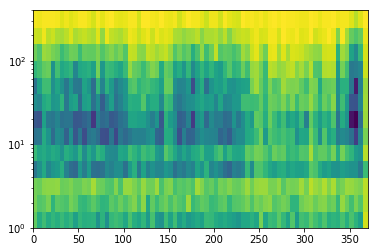

In [51]:
x = flights['DayOfYear']
y = flights['DepDelay']

x_min_val = 0
x_max_val = 366
x_binSize = 5
x_bin_edges = np.arange(x_min_val, x_max_val+x_binSize, x_binSize)

y_min_val = 0
y_max_val = 300
y_logBinSize = 0.2
y_bin_edges = 10 ** np.arange(y_min_val, np.log10(y_max_val)+y_logBinSize, y_logBinSize)

counts, _, _ = np.histogram2d(x, y, bins=(x_bin_edges, y_bin_edges))

fig, ax = plt.subplots()
ax.pcolormesh(x_bin_edges, y_bin_edges, counts.T, cmap = 'viridis_r')

ax.set_yscale('log')

plt.show()

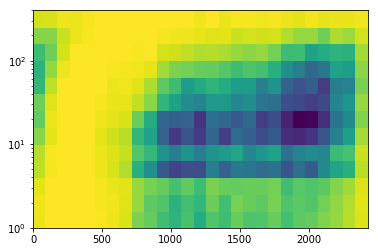

In [52]:
x = flights['ArrTime']
y = flights['ArrDelay']

x_min_val = 0
x_max_val = 2400
x_binSize = 90
x_bin_edges = np.arange(x_min_val, x_max_val+x_binSize, x_binSize)

y_min_val = 0
y_max_val = 300
y_logBinSize = 0.2
y_bin_edges = 10 ** np.arange(y_min_val, np.log10(y_max_val)+y_logBinSize, y_logBinSize)

counts, _, _ = np.histogram2d(x, y, bins=(x_bin_edges, y_bin_edges))

fig, ax = plt.subplots()
ax.pcolormesh(x_bin_edges, y_bin_edges, counts.T, cmap = 'viridis_r')

ax.set_yscale('log')

plt.show()

TypeError: 'AxesSubplot' object does not support indexing

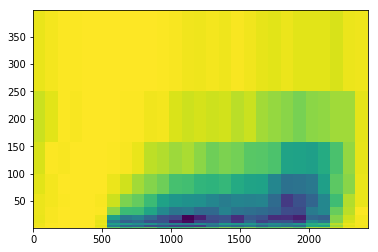

In [68]:
x = flights['DepTime']
y = flights['ArrDelay']

x_min_val = 0
x_max_val = 2400
x_binSize = 90
x_bin_edges = np.arange(x_min_val, x_max_val+x_binSize, x_binSize)

y_min_val = 0
y_max_val = 300
y_logBinSize = 0.2
y_bin_edges = 10 ** np.arange(y_min_val, np.log10(y_max_val)+y_logBinSize, y_logBinSize)

counts, _, _ = np.histogram2d(x, y, bins=(x_bin_edges, y_bin_edges))

fig, ax = plt.subplots()
ax.pcolormesh(x_bin_edges, y_bin_edges, counts.T, cmap = 'viridis_r')
ax[0].colorbar()
ax.set_yscale('log')

plt.show()

In [ ]:
def plot_histograms_stdAxis(flights, var, xaxis_label, numPlots, min_vals, max_vals, binsizes):
    fig, ax = plt.subplots(nrows=numPlots, figsize = [8, numPlots * 3.5])
    for i in range(numPlots):
        bin_edges = np.arange(min_vals[i], max_vals[i]+binsizes[i], binsizes[i])
        ax[i].hist(data = flights, x = var, bins = bin_edges);
        ax[i].set_title(flights[var].name + '\n' +
                        'min: ' + str(min_vals[i]) +
                        ', max: ' + str(max_vals[i]) +
                        ', binsize: ' +
                        str(binsizes[i]) + ' ',
                        pad=-30, loc='right')

    plt.xlabel(xaxis_label)
    plt.show()

In [ ]:
vars = ['ArrDelay', 'DepDelay']
numPlots = 8;
for i in range(len(vars)):
    var = vars[i]
    max_values = [flights[var].max(),
                  flights[var].max(),
                  300, 300, 300, 300, 300, 300]
    log_binsizes = [0.5, 0.3, 0.3, 0.25, 0.2, 0.15, 0.1, 0.05]
    ticks = [1, 3, 10, 30, 100, 300, 1000]
    plot_histograms_logAxis(flights, var, 'Delay (min)', numPlots, max_values, log_binsizes, ticks)
    print('------------------------------------------------------------------------------------')

In [ ]:
def plot_histograms_logAxis(flights, var, xaxis_label, numPlots, max_vals, log_binsizes, ticks):
    fig, ax = plt.subplots(nrows=numPlots, figsize = [8, numPlots * 3.5])
    labels = ['{}'.format(v) for v in ticks]
    for i in range(numPlots):
        #bin_edges = np.arange(min_vals[i], max_vals[i]+binsizes[i], binsizes[i])        
        #bin_edges =       np.arange(min_vals[i],            max_vals[i]+binsizes[i], binsizes[i])
        bin_edges = 10 ** np.arange(0, np.log10(max_vals[i])+log_binsizes[i], log_binsizes[i])
        ax[i].hist(data = flights, x = var, bins = bin_edges);
        ax[i].set_xscale('log')
        ax[i].xaxis.set_ticks(ticks)
        ax[i].xaxis.set_ticklabels(labels)
        ax[i].set_title(flights[var].name + '\n' +
                        'max: ' + str(max_vals[i]) +
                        ', log_binsize: ' +
                        str(log_binsizes[i]) + ' ',
                        pad=-30, loc='right')

    plt.xlabel(xaxis_label)
    plt.show()

<span style="color:blue">

## Next Steps / General / Multivariate
* Add a plot matrix 
* Overlay histograms of delay types filtered on a categorical variable
  - using an r x c subplots approach
    - each row r[i] could have plot(s) with a specific type of delay, such as 'ArrDelay'
    - each col c[i] could have plot(s) with a specific type of categorical variable, such as 'CancellationCode'
      - then each individual plot could be the distribution associated with that value of the categorical variable
      - for instance:
        - the distribution of 'ArrDelay' counts for 'CancellationCode' A
        - the distribution of 'ArrDelay' counts for 'CancellationCode' B, etc.
  - violin plots or box plots or ridgeline plots would also work in lieu of histograms
* Add a correlation matrix
* Check python gallery link(s) for other plot types that may be illuminating
* Check link with 'graphic scheme' of plot types for additional ideas
</span>

In [ ]:
# vars_numeric = ['ArrDelay', 'DepDelay', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay',
#                 'LateAircraftDelay', 'DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime', 'ActualElapsedTime',
#                 'CRSElapsedTime', 'AirTime', 'Distance', 'TaxiIn', 'TaxiOut']
# 
# vars_numeric_temp = ['ArrDelay', 'DepDelay', 'DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime', 
#                      'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'Distance', 'TaxiIn', 'TaxiOut']
# 
# #vars_numeric_temp = ['ArrDelay', 'DepDelay', 'DepTime', 'ArrTime', 'CRSElapsedTime', 'AirTime', 'Distance',
# #                     'TaxiIn', 'TaxiOut']
# 
# vars_categ = ['UniqueCarrier', 'Origin', 'Dest', 'CancellationCode']

<a id='bivariate_exploration_heatMaps'></a>
([Top of Page](#top_of_page))
### Heat Maps

**Create a correlation heatmap of numeric variables to get a better sense of their interaction**

# ------------ RESUME ------------

In [63]:
# sample a subset of the flights so that plots are clearer and render faster
samples = np.random.choice(flights_all.shape[0], 100000, replace = False)
flights_samp = flights_all.loc[samples,:]

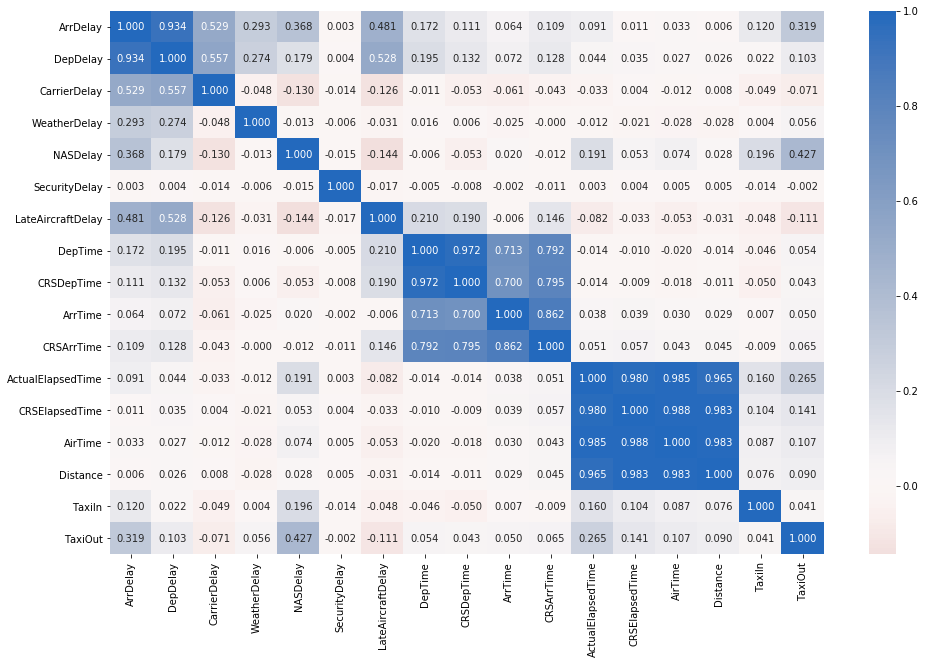

In [64]:
#choose vars to explore
vars = ['ArrDelay', 'DepDelay', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay',
        'LateAircraftDelay', 'DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime', 'ActualElapsedTime',
        'CRSElapsedTime', 'AirTime', 'Distance', 'TaxiIn', 'TaxiOut']

# correlation plot
plt.figure(figsize = [16, 10])
sb.heatmap(flights_samp[vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

* Initial Observations:
  * **'SecurityDelay'** does not correlate to any other variables. It should be removed from consideration
  * **'ActualElaspedTime', 'CRSElapsedTime', 'AirTime',** and **'Distance'** are only significantly correlated with one another. They should be removed from consideration.
    * However, **'ActualElaspedTime'** and **'CRSElapsedTime'** do have a correlation with **'TaxiIn'** and **'TaxiOut'**
    * If **'TaxiIn'** and **'TaxiOut'** become parameters of interest, this may be worth remembering  

**Remove 'SecurityDelay', 'ActualElaspedTime', 'CRSElapsedTime', 'AirTime', and 'Distance' from the heatmap to make it easier to digest**

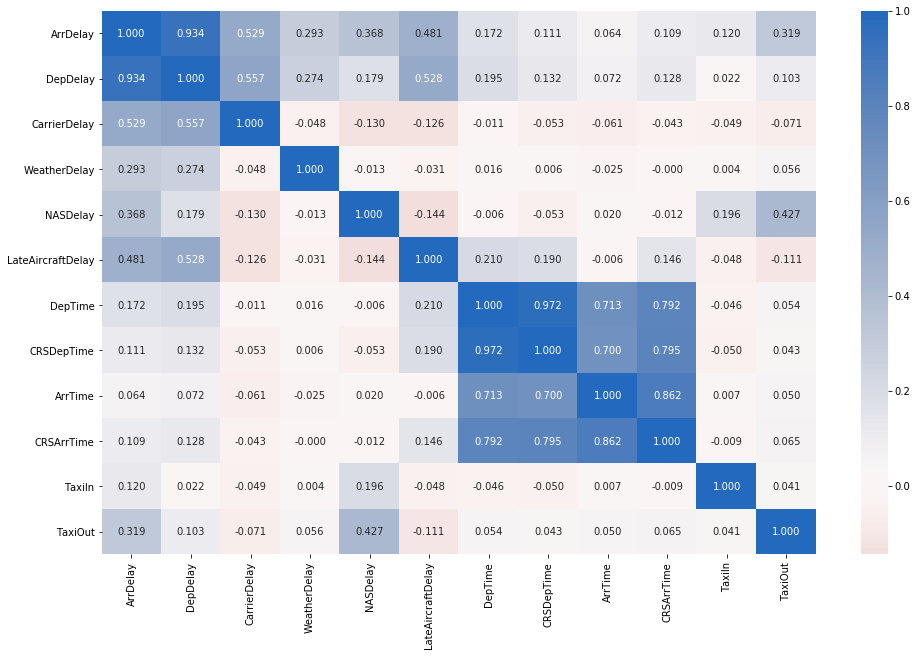

In [65]:
#choose vars to explore
    # removed: 'SecurityDelay', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'Distance'
vars = ['ArrDelay', 'DepDelay', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'LateAircraftDelay',
        'DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime', 'TaxiIn', 'TaxiOut']

# correlation plot
plt.figure(figsize = [16, 10])
sb.heatmap(flights_samp[vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

* 'ArrDelay' Observations:
  * * **'ArrDelay'** is most correlated with other delay types, with **'DepDelay'** being the strongest correlation. This makes sense.
  * * **'LateAircraftDelay', 'CarrierDelay', 'NASDelay',** and **'TaxiOut'** form the next strongest tier of correlations with **'ArrDelay'**
  * * **'WeatherDelay'** may also warrant looking at, although the correlation is weaker<br><br>
 
* Additional Observations:
  * * **'NASDelay'** is more strongly correlated with **'ArrDelay'** than with **'DepDelay'**
  *   * Upon first glance, **'NASDelay'** appears to be a delay that is either more prevalant during arrival or perhaps introduced during arrival
  *   * Upon second glance however, **'NASDelay'** has a stronger correlation with **'TaxiIn'** and **'TaxiOut'**, implying it is more dependent on airport congestion than upon the arrival phase of a flight<br><br>
 
* Potential Variables to Remove from Further Analysis:
  * **'ArrTime'** and **'CRSArrTime'** do not have strong correlations with variables other than **'DepTime'** and **'CRSDepTime'**
  * **'DepTime'** and **'CRSDepTime'** do not have particularly strong correlations with other variables either, but do happen to have some slight correlations with **'LateAircraftDelay', 'ArrDelay',** and **'DepDelay'**
  * **\['ArrTime', 'CRSArrTime', 'DepTime', 'CRSDepTime'\]** will be removed form consideration for the time being

**Look at a heatmap with just the delay variables, along with \['DepTime', 'CRSDepTime', 'TaxiIn', 'TaxiOut'\] to see if it makes more sense or if anything else sticks out**

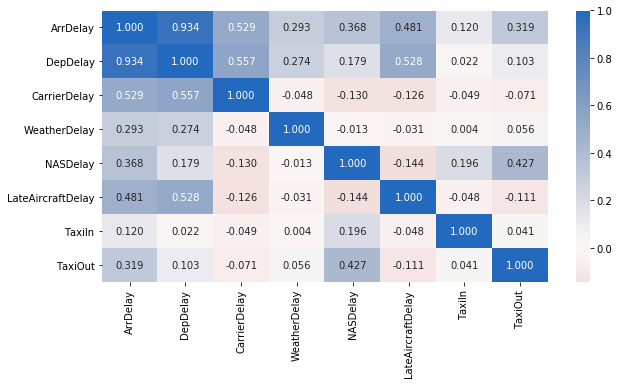

In [66]:
#choose vars to explore
    # removed: 'DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime'
vars = ['ArrDelay', 'DepDelay', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'LateAircraftDelay',
        'TaxiIn', 'TaxiOut']

# correlation plot
plt.figure(figsize = [10, 5])
sb.heatmap(flights_samp[vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

In [67]:
#df['A'].corr(df['B'])
print(flights_samp['ArrDelay'].corr(flights_samp['DepDelay']))
print(flights_samp['ArrDelay'].corr(flights_samp['CarrierDelay']))
print(flights_samp['ArrDelay'].corr(flights_samp['ArrDelay']))

0.9342848321826438
0.5288437091969682
1.0


In [68]:
flights_samp['CarrierDelay'].describe()

count    21772.000000
mean        15.785826
std         41.581899
min          0.000000
25%          0.000000
50%          0.000000
75%         16.000000
max       1190.000000
Name: CarrierDelay, dtype: float64

In [69]:
flights_samp.describe()

Year          Month     DayofMonth      DayOfWeek       DepTime  \
count  100000.0  100000.000000  100000.000000  100000.000000  98067.000000   
mean     2008.0       6.391460      15.776160       3.924520   1333.738393   
std         0.0       3.410609       8.792221       1.988432    478.533705   
min      2008.0       1.000000       1.000000       1.000000      1.000000   
25%      2008.0       3.000000       8.000000       2.000000    927.000000   
50%      2008.0       6.000000      16.000000       4.000000   1326.000000   
75%      2008.0       9.000000      23.000000       6.000000   1727.500000   
max      2008.0      12.000000      31.000000       7.000000   2400.000000   

          CRSDepTime       ArrTime     CRSArrTime      FlightNum  \
count  100000.000000  97833.000000  100000.000000  100000.000000   
mean     1325.287750   1481.662680    1494.910500    2219.813350   
std       464.922579    505.091155     482.642375    1957.415389   
min         5.000000      1.000000       1.000000       1.000000   
25%       925.000000   1107.000000    1115.000000     623.000000   
50%      1320.000000   1513.000000    1517.000000    1569.000000   
75%      1715.000000   1909.000000    1907.000000    3506.000000   
max      2359.000000   2400.000000    2400.000000    9740.000000   

       ActualElapsedTime  ...       Distance        TaxiIn       TaxiOut  \
count       97792.000000  ...  100000.000000  97833.000000  98054.000000   
mean          127.669901  ...     728.851900      6.866057     16.462133   
std            70.273140  ...     563.667928      4.912293     11.237895   
min            17.000000  ...      31.000000      0.000000      0.000000   
25%            77.000000  ...     328.000000      4.000000     10.000000   
50%           110.000000  ...     583.000000      6.000000     14.000000   
75%           157.000000  ...     954.000000      8.000000     19.000000   
max           679.000000  ...    4962.000000    177.000000    300.000000   

           Cancelled       Diverted  CarrierDelay  WeatherDelay      NASDelay  \
count  100000.000000  100000.000000  21772.000000  21772.000000  21772.000000   
mean        0.019500       0.002580     15.785826      3.084512     17.346730   
std         0.138275       0.050728     41.581899     21.015285     33.109339   
min         0.000000       0.000000      0.000000      0.000000      0.000000   
25%         0.000000       0.000000      0.000000      0.000000      0.000000   
50%         0.000000       0.000000      0.000000      0.000000      6.000000   
75%         0.000000       0.000000     16.000000      0.000000     21.000000   
max         1.000000       1.000000   1190.000000   1070.000000   1357.000000   

       SecurityDelay  LateAircraftDelay  
count   21772.000000       21772.000000  
mean        0.086395          20.777926  
std         2.046051          39.174563  
min         0.000000           0.000000  
25%         0.000000           0.000000  
50%         0.000000           0.000000  
75%         0.000000          26.000000  
max       139.000000        1002.000000  

[8 rows x 24 columns]

* Thoughts thus far:
  * It might be useful to look at correlations between delay variables where the following delay variables are not zero:  \['CarrierDelay', 'WeatherDelay', 'NASDelay', 'LateAircraftDelay'\]

**Things to do:**

* Custom Heatmap:
  * check what df.corr() outputs (I suspect a matrix)
    * ----> outputs a dataframe
  * create a list of variables, checkVars, to check against 'ArrDelay' and 'DepDelay'
    * Also create a list of what needs done (i.e., filtered) to each checkVar
  * then create multiple dataframes of (the filtered checkVars) and (the correspondingly filtered 'ArrDelay' column)
    * Alternate approach: 
      * create a single dataframe with multiple (different length) columns.
      * normalize the columns by adding NANs to columns that are shorter
  * create a matrix of the correlations between filtered variables

In [70]:
df_temp = flights_samp[vars].corr()
df_temp.head()

ArrDelay  DepDelay  CarrierDelay  WeatherDelay  NASDelay  \
ArrDelay      1.000000  0.934285      0.528844      0.293055  0.367558   
DepDelay      0.934285  1.000000      0.557123      0.273867  0.178855   
CarrierDelay  0.528844  0.557123      1.000000     -0.048205 -0.129943   
WeatherDelay  0.293055  0.273867     -0.048205      1.000000 -0.012943   
NASDelay      0.367558  0.178855     -0.129943     -0.012943  1.000000   

              LateAircraftDelay    TaxiIn   TaxiOut  
ArrDelay               0.480703  0.120319  0.318514  
DepDelay               0.527820  0.021956  0.103256  
CarrierDelay          -0.126436 -0.048733 -0.070558  
WeatherDelay          -0.031496  0.004165  0.055535  
NASDelay              -0.144498  0.196348  0.427156

In [71]:
df_temp.loc['ArrDelay'].WeatherDelay

0.293054607018155

**'CarrierDelay', 'WeatherDelay', 'NASDelay',** and **'LateAircraftDelay'** each have a large number of points at or very near zero. This is disguising the true nature of these distributions.

# ------------ SKIP ------------

In [ ]:
varCorr = ['ArrDelay', 'DepDelay', 'CarrierDelay', 'WeatherDelay', 'NASDelay',
             'LateAircraftDelay', 'TaxiIn', 'TaxiOut']
varsFilt = ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'LateAircraftDelay']

for i in range(len(varCorr)):
    if varCorr[i] in varsFilt:
        print(varCorr[i] + ' IS IN varsFilt')
    else:
        print(varCorr[i])

In [ ]:
varsCorr = ['ArrDelay', 'DepDelay', 'CarrierDelay', 'WeatherDelay', 'NASDelay',
             'LateAircraftDelay', 'TaxiIn', 'TaxiOut']
varsFilt = ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'LateAircraftDelay']

#df['A'].corr(df['B'])
#flights_samp['ArrDelay'].corr(flights_samp['DepDelay'])

#df_filtered = mask the df by the given varToFilter
#from df_filtered:  correlate every var in varToCorr
  #store the corr values as follows:
    # flights_sampFilt.loc[varsFilt[i]].varCorr[i] = df_filtered[varsFilt[i]].corr(df_filtered[varCorr[i]])

for i in range(len(varsCorr)):
    if varCorr[i] in varsFilt:
        print(varsCorr[i] + ' IS IN varsFilt')
    else:
        print(varsCorr[i])

In [ ]:
mask = flights['CarrierDelay'] > 0
#flights[mask].CarrierDelay.count()
flights[mask].shape[0]

# ------------ RESUME ------------

In [72]:
varsCorr = ['ArrDelay', 'DepDelay', 'CarrierDelay', 'WeatherDelay', 'NASDelay',
             'LateAircraftDelay', 'TaxiIn', 'TaxiOut']
varsFilt = ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'LateAircraftDelay']

In [73]:
# def filter_zeros(df, varFilt, varCompare):
#     mask = df[varFilt] > 0
#     df = df[mask]
#     df = df[[varFilt, varCompare]]
#     return df

def filter_zeros(df, varCompare, varFilt):
    mask = df[varFilt] > 0
    df = df[mask]
    df = df[[varCompare, varFilt]]
    return df

In [ ]:
# i=0
# j=2
# print('\'' + varsCorr[i] + '\': ' + str(flights_samp[varsCorr[i]].count()) + ' rows')
# filter_zeros(flights_samp, varsCorr[i], varsCorr[j])  # return 2 var df, filtered vars[j]>0
# 
# df_twoVars = filter_zeros(flights_samp, varsCorr[i], varsCorr[j])  # return 2 var df, filtered vars[j]>0
# current_corr = df_twoVars[varsCorr[i]].corr(df_twoVars[varsCorr[j]])
# print('    f1,  corr,shape w/ ' + varsCorr[j] + ': ' + str(current_corr) + 
#                   ', i_count:' + str(df_twoVars[varsCorr[i]].count()) + 
#                   ', j_count:' + str(df_twoVars[varsCorr[j]].count()))
# 
# i=2
# j=0
# print('\'' + varsCorr[i] + '\': ' + str(flights_samp[varsCorr[i]].count()) + ' rows')
# filter_zeros(flights_samp, varsCorr[i], varsCorr[j])  # return 2 var df, filtered vars[j]>0
# 
# df_twoVars = filter_zeros(flights_samp, varsCorr[i], varsCorr[j])  # return 2 var df, filtered vars[j]>0
# current_corr = df_twoVars[varsCorr[i]].corr(df_twoVars[varsCorr[j]])
# print('    f1,  corr,shape w/ ' + varsCorr[j] + ': ' + str(current_corr) + 
#                   ', i_count:' + str(df_twoVars[varsCorr[i]].count()) + 
#                   ', j_count:' + str(df_twoVars[varsCorr[j]].count()))

In [74]:
#flights_samp.shape
#flights_samp[varsCorr[1]].shape
flights_samp[varsCorr[1]].count()
#flights_samp.info()

98067

**Create a custom heatmap wherein zero values are ignored for the constituent 'Delay' variables**
* i.e., 'Delay' variables that are not 'ArrDelay' or 'DepDelay'

In [75]:
flights_varsCorr = pd.DataFrame(index=varsCorr, columns=varsCorr)
#flights_varsCorr = flights_varsCorr.fillna(0)

for i in range(len(varsCorr)):
    
    # print statements for debugging
    print('\'' + varsCorr[i] + '\': ' + str(flights_samp[varsCorr[i]].count()) + ' rows')
        
    for j in range(len(varsCorr)):
        
        # case: variable being assessed against itself
        if varsCorr[i] == varsCorr[j]:
            current_corr = 1
            
            print('     1,  corr,shape w/ ' + varsCorr[j] + ': ' + str(current_corr) + 
                  ', i_count:' + str(flights_samp[varsCorr[i]].count()) + 
                  ', j_count:' + str(flights_samp[varsCorr[j]].count()))
            
        # case: non-Delay variable being assessed against a 'Delay' variable
        elif varsCorr[j] in varsFilt:
            df_twoVars = filter_zeros(flights_samp, varsCorr[i], varsCorr[j])  # return 2 var df, filtered vars[j]>0
            current_corr = df_twoVars[varsCorr[i]].corr(df_twoVars[varsCorr[j]])
            
            print('    f1,  corr,shape w/ ' + varsCorr[j] + ': ' + str(current_corr) + 
                  ', i_count:' + str(df_twoVars[varsCorr[i]].count()) + 
                  ', j_count:' + str(df_twoVars[varsCorr[j]].count()))
            
        # base case: non-delay variable assessed against a non-delay variable
        else:
            # -----> make sure to check for NANs
            current_corr = flights_samp[varsCorr[i]].corr(flights_samp[varsCorr[j]])
            
            print('   reg, corr,shape w/ ' + varsCorr[j] + ': ' + str(current_corr) + 
                  ', i_count:' + str(flights_samp[varsCorr[i]].count()) + 
                  ', j_count:' + str(flights_samp[varsCorr[j]].count()))
        
        flights_varsCorr.loc[varsCorr[i]][varsCorr[j]] = current_corr

#flights_varsCorr

'ArrDelay': 97792 rows
     1,  corr,shape w/ ArrDelay: 1, i_count:97792, j_count:97792
   reg, corr,shape w/ DepDelay: 0.9342848321826438, i_count:97792, j_count:98067
    f1,  corr,shape w/ CarrierDelay: 0.8305023728156322, i_count:9466, j_count:9466
    f1,  corr,shape w/ WeatherDelay: 0.7300027309607691, i_count:1372, j_count:1372
    f1,  corr,shape w/ NASDelay: 0.5525813177458887, i_count:13343, j_count:13343
    f1,  corr,shape w/ LateAircraftDelay: 0.7869634961426982, i_count:10072, j_count:10072
   reg, corr,shape w/ TaxiIn: 0.1203189415610922, i_count:97792, j_count:97833
   reg, corr,shape w/ TaxiOut: 0.3185141371182646, i_count:97792, j_count:98054
'DepDelay': 98067 rows
   reg, corr,shape w/ ArrDelay: 0.9342848321826439, i_count:98067, j_count:97792
     1,  corr,shape w/ DepDelay: 1, i_count:98067, j_count:98067
    f1,  corr,shape w/ CarrierDelay: 0.8355445434152093, i_count:9466, j_count:9466
    f1,  corr,shape w/ WeatherDelay: 0.7341289879106735, i_count:1372, j_count

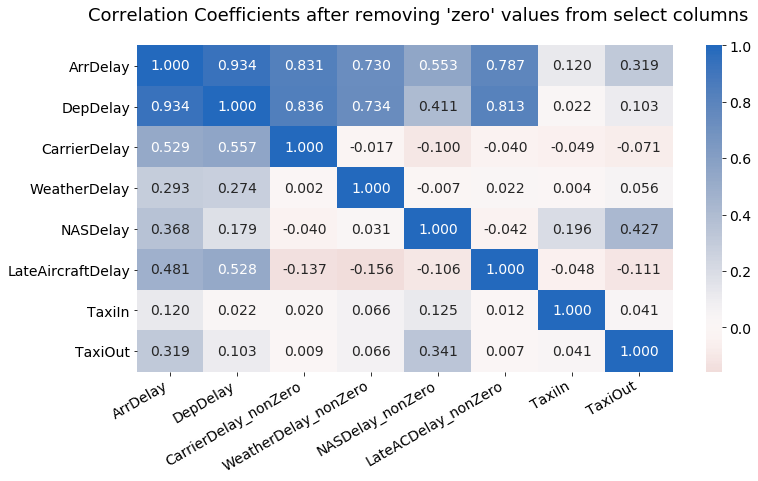

In [90]:
varsCorr_nonZero = ['ArrDelay', 'DepDelay', 'CarrierDelay_nonZero', 'WeatherDelay_nonZero', 'NASDelay_nonZero',
             'LateACDelay_nonZero', 'TaxiIn', 'TaxiOut']

# convert from string to float
for i in range(len(varsCorr)):
    flights_varsCorr[varsCorr[i]] = flights_varsCorr[varsCorr[i]].astype(float)

# sb.set(font_scale=1.4)    # default is 1.0

# correlation plot
plt.figure(figsize = [12, 6])
# sb.heatmap(flights_varsCorr, annot = True, fmt = '.3f', annot_kws={"size": 14},
#            cmap = 'vlag_r', center = 0,
#            xticklabels=varsCorr_nonZero)
ax = sb.heatmap(flights_varsCorr, annot = True, fmt = '.3f', annot_kws={"size": 14},
           cmap = 'vlag_r', center = 0,
           xticklabels=varsCorr_nonZero)
ax.figure.axes[-1].tick_params(labelsize=14)
#ax.figure.axes[-1].set_ylabel('Correlation Coefficient', size=16)
ax.tick_params(labelsize=14)
plt.xticks(rotation=30, ha='right')

#plt.xticks(rotation=30, ha='right', fontsize=12)
#plt.yticks(fontsize=12)

title_string=('Correlation Coefficients after removing \'zero\' values from select columns')
plt.suptitle(title_string, x=0.45, y=0.97, fontsize=18)
plt.show()

### Observations:
* When zero values are removed, **'ArrDelay'** and **'DepDelay'** are most strongly correlated with **'CarrierDelay'**, **'WeatherDelay'**, and **'LateAircraftDelay'**
* Removing zeros causes:
  **'WeatherDelay'** to be more strongly correlated with **'ArrDelay'** and **'DepDelay'** than **'NASDelay'**
    * This implies that Weather Delays happen less often than NAS Delays, but have a larger impact on arrival and departure delays

**Original Version**

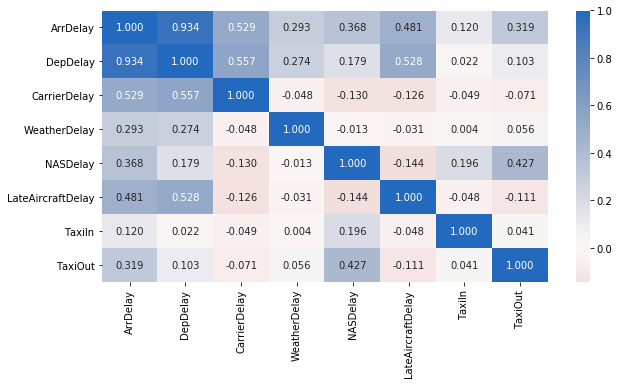

In [91]:
vars = ['ArrDelay', 'DepDelay', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'LateAircraftDelay', 'TaxiIn', 'TaxiOut']
plt.figure(figsize = [10, 5])  # correlation plot
#RdBu
#vlag_r
sb.heatmap(flights_samp[vars].corr(), annot = True, fmt = '.3f', cmap = 'vlag_r', center = 0)
plt.show()

## Here are the current issues:

* **Dispositioned as non-issues:**
  * "Delay" parameters likely have NaN's that need turned to zeros
    * consider using <code>fillna(0)</code>
    * some "DelayNaN's may not be necessarily be zero
      * if all 'Delay' parameters show as NaN, but 'ArrDelay' or 'DepDelay' are non-zero, then the row should be removed
    * NOTE: once this is done, the conclusions from prior heatmaps and histograms may need to be revisited

## Next steps:
* assess change in "Delay" parameters based on:
  * time of year
  * airport (only look at top 10)
  * time of day
<br><br>
* create a new day of year variable

* do not assess for now:
  * over many years

<a id='older_location'></a>
([Top of Page](#top_of_page))

<span style="color:red">

# OLDER LOCATION (7/21)
</span>

**Create _DayOfYear_ and _Week_ parameters**:

In [92]:
flights_samp_backup = flights_samp.copy(deep=True)

In [367]:
# add DayOfYear parameter to the sample dataset
temp_date = pd.to_datetime(flights_samp.Year*10000 +
               flights_samp.Month*100 +
               flights_samp.DayofMonth, format='%Y%m%d')
flights_samp['Date'] = temp_date
flights_samp['DayOfYear'] = flights_samp['Date'].dt.dayofyear
flights_samp['Week'] = flights_samp['Date'].dt.week

# add DayOfYear parameter to the full dataset
flights_all_mod = flights_all.copy(deep=True)
temp_date = pd.to_datetime(flights_all.Year*10000 +
               flights_all.Month*100 +
               flights_all.DayofMonth, format='%Y%m%d')
flights_all_mod['Date'] = temp_date
flights_all_mod['DayOfYear'] = flights_all_mod['Date'].dt.dayofyear
flights_all_mod['Week'] = flights_all_mod['Date'].dt.week

#df['Week_Number'] = df['Date'].dt.week
del temp_date
#flights_samp.info()

**Create "calendars" for median ArrDelay and DepDelay**

In [94]:
def reduce_df_median(data, varGroupBy, varsKeep):
    # reduce and reshape the dataframe
    data_new = data.groupby(varGroupBy).median()
    data_new = data_new[varsKeep]
    
    # convert data type to int
    data_new['Week'] = data_new['Week'].astype(np.int64)
    data_new['DayOfWeek'] = data_new['DayOfWeek'].astype(np.int64)
    
    return data_new

In [456]:
flights_samp_days_Arr = reduce_df_median(flights_samp, 'DayOfYear', ['ArrDelay', 'DayOfWeek', 'Week'])
flights_samp_days_Arr = pd.pivot_table(flights_samp_days_Arr, values = 'ArrDelay', index=['DayOfWeek'], columns = 'Week')

flights_samp_days_Dep = reduce_df_median(flights_samp, 'DayOfYear', ['DepDelay', 'DayOfWeek', 'Week'])
flights_samp_days_Dep = pd.pivot_table(flights_samp_days_Dep, values = 'DepDelay', index=['DayOfWeek'], columns = 'Week')

In [99]:
#flights_samp_days_Arr.min().sort_values(ascending=True)   #use to determine vmin
#flights_samp_days_Arr.max().sort_values(ascending=False)   #use to determine vmax
#vmin = -9.5
#vmax = 22.0

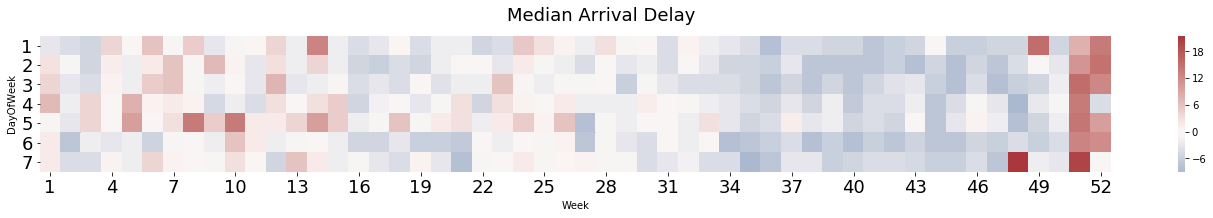

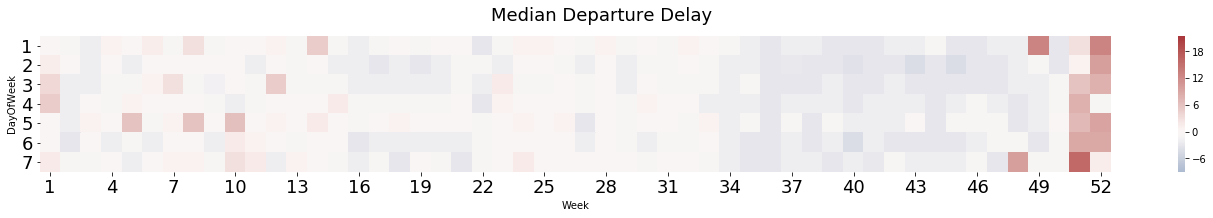

In [96]:
plt.figure(figsize = [24, 2.5])
sb.heatmap(flights_samp_days_Arr, cmap = 'vlag', center = 0, cbar=True, xticklabels=3, vmin=-9, vmax=21.5)
plt.xticks(rotation=0, fontsize=18)
plt.yticks(rotation=0, ha='right', fontsize=18)
title_string=('Median Arrival Delay')
plt.suptitle(title_string, x=0.45, y=1.04, fontsize=18)
plt.show()

plt.figure(figsize = [24, 2.5])
sb.heatmap(flights_samp_days_Dep, cmap = 'vlag', center = 0, cbar=True, xticklabels=3, vmin=-9, vmax=21.5)
plt.xticks(rotation=0, fontsize=18)
plt.yticks(rotation=0, ha='right', fontsize=18)
title_string=('Median Departure Delay')
plt.suptitle(title_string, x=0.45, y=1.04, fontsize=18)
plt.show()

In [554]:
def reduce_df_median_log(data, varGroupBy, varsKeep):
    # reduce and reshape the dataframe
    data_new = data.copy(deep=True)
    #data_new[varGroupBy] = np.log10(data[varGroupBy])
    data_new[varsKeep[0]] = np.log10(data_new[varsKeep[0]])
    data_new = data_new.groupby(varGroupBy).median()
    data_new = data_new[varsKeep]
    
    # convert data type to int
    data_new['Week'] = data_new['Week'].astype(np.int64)
    data_new['DayOfWeek'] = data_new['DayOfWeek'].astype(np.int64)
    
    return data_new

In [538]:
#flights_samp.loc[[2025252, 5213250, 3407255]].ArrDelay

# entry 2025252 has 'ArrDelay'  < 0  -->  np.log('ArrDelay') == NAN
# entry 5213250 has 'ArrDelay' == 0  -->  np.log('ArrDelay') == -inf
# entry 3407255 has 'ArrDelay' == 1  -->  np.log('ArrDelay') == 0

In [553]:
#flights_samp_origin_ORD = flights_samp[flights_samp['Origin'] == 'ORD']
mask1 = flights_samp['Origin'] == 'ORD'
mask2 = flights_samp['ArrDelay'] > 0
flights_samp_origin_ORD_positive = flights_samp[mask1 & mask2]
varsKeep = ['ArrDelay', 'DayOfWeek', 'Week']
#np.log10(flights_samp_origin_ORD_positive[varsKeep[0]])

#temp_var = flights_samp_origin_ORD_positive[flights_samp_origin_ORD_positive[varsKeep[0]]]
#flights_samp_origin_ORD_positive[varsKeep[0]] = temp_var
flights_samp_origin_ORD_positive[varsKeep[0]] = np.log10(flights_samp_origin_ORD_positive[varsKeep[0]])
flights_samp_origin_ORD_positive.ArrDelay.head()

/anaconda3/envs/test_env_v03/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


4728496    1.278754
4482510    0.477121
4725115    1.322219
1923259    2.086360
2024295    2.130334
Name: ArrDelay, dtype: float64

In [514]:
flights_samp_origin_ORD = flights_samp[flights_samp['Origin'] == 'ORD']
flights_samp_days_Arr_ORD = reduce_df_median_log(flights_samp_origin_ORD, 'DayOfYear', ['ArrDelay', 'DayOfWeek', 'Week'])
flights_samp_days_Arr_ORD = pd.pivot_table(flights_samp_days_Arr_ORD, values = 'ArrDelay', index=['DayOfWeek'], columns = 'Week')

flights_samp_days_Dep_ORD = reduce_df_median(flights_samp_origin_ORD, 'DayOfYear', ['DepDelay', 'DayOfWeek', 'Week'])
flights_samp_days_Dep_ORD = pd.pivot_table(flights_samp_days_Dep_ORD, values = 'DepDelay', index=['DayOfWeek'], columns = 'Week')

In [560]:
flights_samp_days_Arr_ORD

Week              1          2           3           4          5   \
DayOfWeek                                                            
1          29.000000  59.125000   46.125000  108.000000  68.166667   
2          67.086957  66.562500    6.000000   68.090909  94.500000   
3          31.285714  11.600000   28.666667   70.000000  38.200000   
4           9.750000  37.666667  114.333333   15.888889  80.076923   
5          15.000000  33.200000   23.888889   36.333333  52.428571   
6          24.285714  31.600000   23.000000   28.000000  44.888889   
7          52.083333  14.625000   16.250000    6.666667  81.866667   

Week               6          7          8           9          10  ...  \
DayOfWeek                                                           ...   
1          107.500000  48.888889  82.846154  102.750000  29.000000  ...   
2           75.714286  89.909091  38.555556   54.900000  31.777778  ...   
3          185.000000  17.923077  63.000000   22.454545  51.888889  ...   
4           35.363636  25.000000  20.750000   37.400000   9.600000  ...   
5           39.125000  32.300000  60.800000   43.900000  43.875000  ...   
6            6.000000  48.333333   3.500000         NaN  40.166667  ...   
7           44.750000  39.727273  71.500000    5.250000  45.000000  ...   

Week              43         44         45         46         47      48  \
DayOfWeek                                                                  
1          13.166667  11.888889   2.000000  20.333333  47.800000    8.40   
2                NaN  11.000000   9.000000  26.000000   1.500000    9.75   
3          19.666667  30.500000   8.500000  37.272727  16.000000   18.00   
4           6.500000   2.500000  34.000000  10.000000  20.250000   15.00   
5          43.666667   5.500000  42.333333  10.500000  20.000000     NaN   
6                NaN   3.000000        NaN  28.500000   9.000000   36.50   
7          26.000000  12.333333  45.333333  35.500000  35.666667  124.90   

Week              49          50         51          52  
DayOfWeek                                                
1          99.600000   25.000000  41.428571   78.090909  
2          48.200000  103.625000  61.200000   94.000000  
3          35.750000   70.333333  38.625000   54.500000  
4          21.571429   37.571429  48.400000   53.333333  
5          45.000000   24.500000  96.500000  128.444444  
6          26.888889   13.333333  63.571429   66.875000  
7          33.500000   29.000000  69.400000   31.000000  

[7 rows x 52 columns]

**When publishing calendar plots, use the _format_ directly below (but do not use log reduction):**

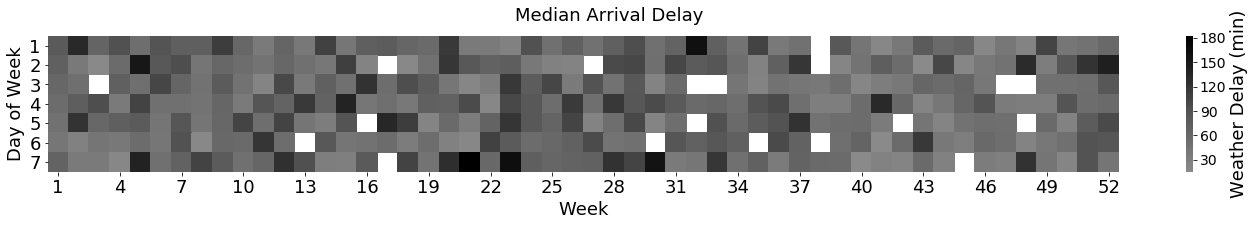

In [575]:
mask1 = flights_all_mod['Origin'] == 'ORD'
mask2 = flights_all_mod['ArrDelay'] > 0
mask3 = flights_all_mod['WeatherDelay'] > 0
flights_samp_origin_ORD_positive = flights_all_mod[mask1 & mask2 & mask3]
flights_samp_origin_ORD = flights_all_mod[flights_all_mod['Origin'] == 'ORD']
flights_samp_days_Arr_ORD = reduce_df_median_log(flights_samp_origin_ORD_positive, 'DayOfYear', ['ArrDelay', 'DayOfWeek', 'Week'])
flights_samp_days_Arr_ORD = pd.pivot_table(flights_samp_origin_ORD_positive, values = 'ArrDelay', index=['DayOfWeek'], columns = 'Week')

plt.figure(figsize = [24, 2.5])
ax = sb.heatmap(flights_samp_days_Arr_ORD, cmap = 'Greys', center = 0, cbar=True, xticklabels=3)
plt.xlabel('Week', fontsize=18)
plt.ylabel('Day of Week', fontsize=18)
plt.xticks(rotation=0, fontsize=18)
plt.yticks(rotation=0, ha='right', fontsize=18)
ax.figure.axes[-1].tick_params(labelsize=14)
ax.figure.axes[-1].set_ylabel('Weather Delay (min)', size=18)       
title_string=('Median Arrival Delay')
plt.suptitle(title_string, x=0.45, y=1.04, fontsize=18)
plt.show()

In [576]:
flights_samp_days_Arr_ORD.head()

Week              1           2          3          4           5   \
DayOfWeek                                                            
1          80.000000  132.322581  66.049505  91.616327   52.333333   
2          71.479100   37.243902  16.500000  56.495238  152.340426   
3          62.296703   51.500000        NaN  71.622449   51.296296   
4          55.200000   74.857143  95.226415  36.423077  105.956349   
5          48.000000  121.333333  61.433333  74.159420   78.506173   

Week               6          7          8           9           10  ...  \
DayOfWeek                                                            ...   
1           87.842857  73.375000  73.805825  112.153005   61.552632  ...   
2           81.782178  94.265993  43.500000   62.508772   53.875000  ...   
3          102.731707  65.416667  46.714286   79.666667   46.000000  ...   
4           49.014706  50.000000  44.578947   63.571429   37.000000  ...   
5           43.555556  85.000000  43.972222   61.863636  104.833333  ...   

Week              43          44         45         46         47          48  \
DayOfWeek                                                                       
1          79.000000   58.750000  67.000000  19.500000  40.823529   26.041667   
2          15.000000  102.000000  21.000000  39.481481  46.500000  130.000000   
3          64.000000   55.666667  65.000000  41.454545        NaN         NaN   
4          24.000000   40.666667  63.000000  88.000000  35.142857   32.500000   
5          44.318182   23.000000  46.692308  52.500000  50.750000         NaN   

Week               49         50          51          52  
DayOfWeek                                                 
1          104.588235  42.368421   46.742537   59.947368  
2           31.500000  83.018634  122.119617  142.895623  
3           48.927083  49.750000   52.434426   83.528205  
4           33.250000  87.500000   54.000000   57.903226  
5           57.250000  27.333333   78.224066   98.151515  

[5 rows x 52 columns]

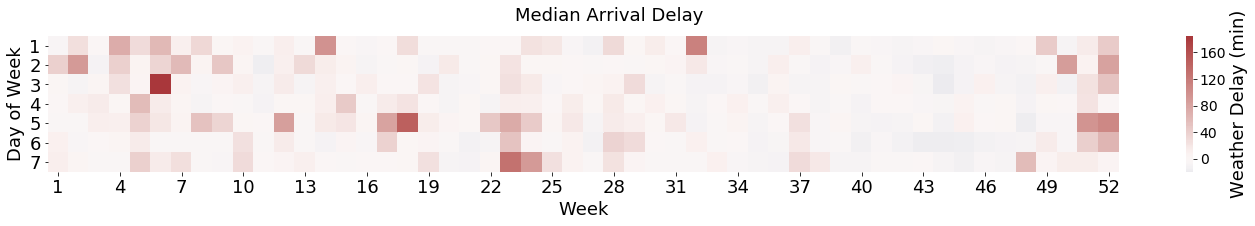

In [561]:
flights_samp_origin_ORD = flights_samp[flights_samp['Origin'] == 'ORD']
flights_samp_days_Arr_ORD = reduce_df_median(flights_samp_origin_ORD, 'DayOfYear', ['ArrDelay', 'DayOfWeek', 'Week'])
flights_samp_days_Arr_ORD = pd.pivot_table(flights_samp_days_Arr_ORD, values = 'ArrDelay', index=['DayOfWeek'], columns = 'Week')

plt.figure(figsize = [24, 2.5])
ax = sb.heatmap(flights_samp_days_Arr_ORD, cmap = 'vlag', center = 0, cbar=True, xticklabels=3)
plt.xlabel('Week', fontsize=18)
plt.ylabel('Day of Week', fontsize=18)
plt.xticks(rotation=0, fontsize=18)
plt.yticks(rotation=0, ha='right', fontsize=18)
ax.figure.axes[-1].tick_params(labelsize=14)
ax.figure.axes[-1].set_ylabel('Weather Delay (min)', size=18)       
title_string=('Median Arrival Delay')
plt.suptitle(title_string, x=0.45, y=1.04, fontsize=18)
plt.show()

In [521]:
flights_samp_days_Arr_ORD.head()

Week          1     2     3     4     5      6     7     8     9     10  ...  \
DayOfWeek                                                                ...   
1          -7.00  27.5  -2.0  73.5  29.0   62.0  12.0  33.0   2.0   8.5  ...   
2          39.50  90.0 -10.0  40.0   7.0   36.0  60.0   7.0  49.0   4.5  ...   
3           1.75  -9.5   4.0  25.0   5.0  185.0   7.5  -6.0   5.0  11.0  ...   
4          -1.00  10.5  16.0   1.0  58.0   15.0   4.0  -9.5   0.0  -5.0  ...   
5          -2.50  -5.0  12.5  12.0  39.0   20.0   7.0  52.5  36.0   2.0  ...   

Week         43    44    45   46    47    48    49    50    51     52  
DayOfWeek                                                              
1          -7.0   1.0  -6.0 -9.5  -7.0   0.0  44.0  -8.0  16.0   44.0  
2         -15.0 -16.0 -10.5 -6.0 -11.0  -9.0  -4.5  87.0   7.5   83.5  
3          -7.5 -20.0 -10.0  9.0  -9.0 -12.0  12.0 -12.0  24.5   52.0  
4          -6.0  -7.5   7.5 -3.5   1.0 -10.5   2.0  -2.0  23.0   -2.0  
5           3.0 -12.5   9.0 -2.0   1.5 -17.0  -7.0  -7.0  96.0  107.5  

[5 rows x 52 columns]

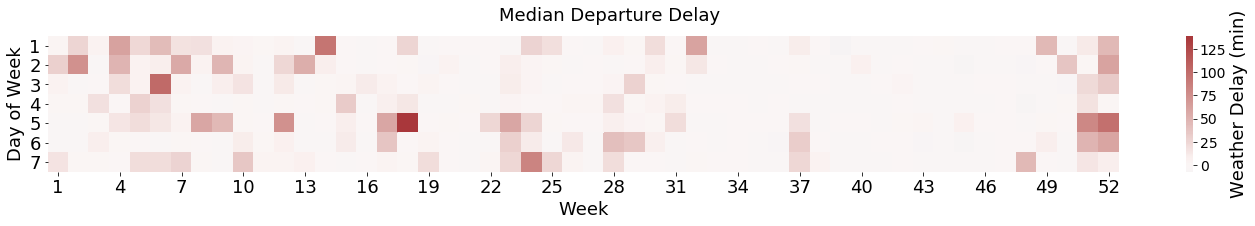

In [515]:
plt.figure(figsize = [24, 2.5])
ax = sb.heatmap(flights_samp_days_Dep_ORD, cmap = 'vlag', center = 0, cbar=True, xticklabels=3)
plt.xlabel('Week', fontsize=18)
plt.ylabel('Day of Week', fontsize=18)
plt.xticks(rotation=0, fontsize=18)
plt.yticks(rotation=0, ha='right', fontsize=18)
ax.figure.axes[-1].tick_params(labelsize=14)
ax.figure.axes[-1].set_ylabel('Weather Delay (min)', size=18)       
title_string=('Median Departure Delay')
plt.suptitle(title_string, x=0.45, y=1.04, fontsize=18)
plt.show()

In [460]:
flights_samp_origin_LAS = flights_samp[flights_samp['Origin'] == 'LAS']
flights_samp_days_Arr_LAS = reduce_df_median(flights_samp_origin_LAS, 'DayOfYear', ['ArrDelay', 'DayOfWeek', 'Week'])
flights_samp_days_Arr_LAS = pd.pivot_table(flights_samp_days_Arr_LAS, values = 'ArrDelay', index=['DayOfWeek'], columns = 'Week')

flights_samp_days_Dep_LAS = reduce_df_median(flights_samp_origin_LAS, 'DayOfYear', ['DepDelay', 'DayOfWeek', 'Week'])
flights_samp_days_Dep_LAS = pd.pivot_table(flights_samp_days_Dep_LAS, values = 'DepDelay', index=['DayOfWeek'], columns = 'Week')

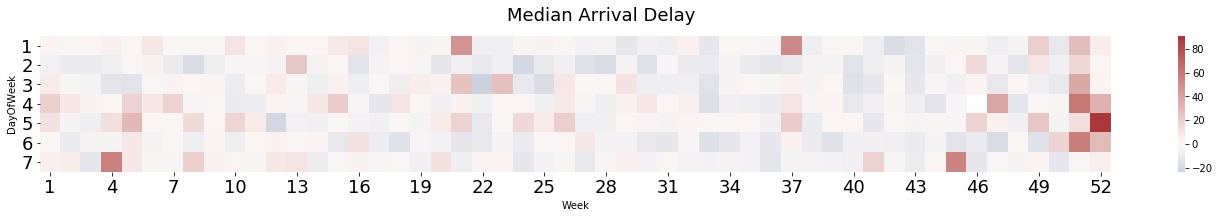

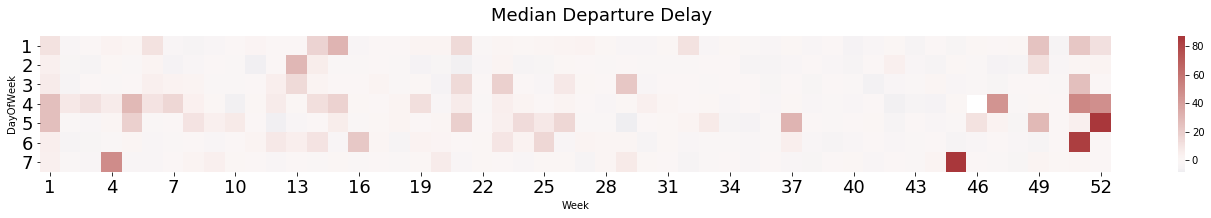

In [461]:
plt.figure(figsize = [24, 2.5])
sb.heatmap(flights_samp_days_Arr_LAS, cmap = 'vlag', center = 0, cbar=True, xticklabels=3)
plt.xticks(rotation=0, fontsize=18)
plt.yticks(rotation=0, ha='right', fontsize=18)
title_string=('Median Arrival Delay')
plt.suptitle(title_string, x=0.45, y=1.04, fontsize=18)
plt.show()

plt.figure(figsize = [24, 2.5])
sb.heatmap(flights_samp_days_Dep_LAS, cmap = 'vlag', center = 0, cbar=True, xticklabels=3)
plt.xticks(rotation=0, fontsize=18)
plt.yticks(rotation=0, ha='right', fontsize=18)
title_string=('Median Departure Delay')
plt.suptitle(title_string, x=0.45, y=1.04, fontsize=18)
plt.show()

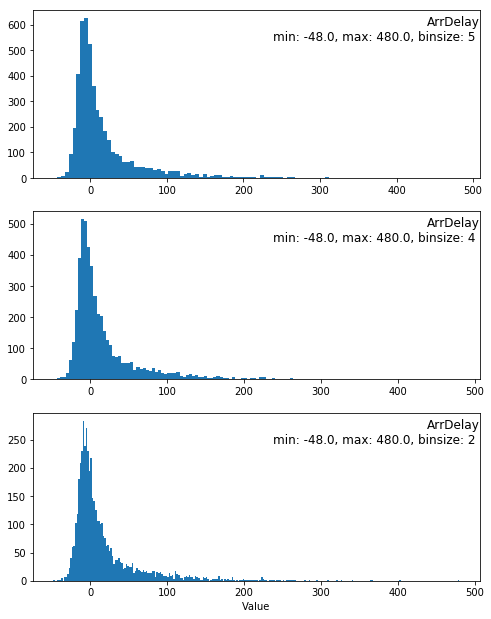

------------------------------------------------------------------------------------


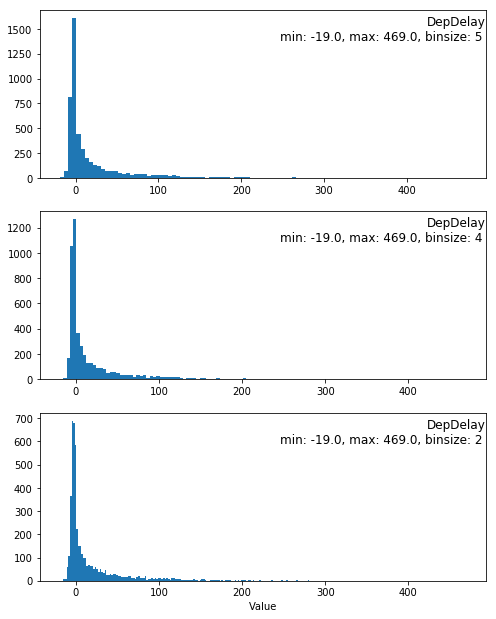

------------------------------------------------------------------------------------


In [503]:
vars_distr = ['ArrDelay', 'DepDelay']

numPlots = 3;
for i in range(len(vars_distr)):
    var = vars_distr[i]
    min_values = [flights_samp_origin_ORD[var].min(), flights_samp_origin_ORD[var].min(), 
                  flights_samp_origin_ORD[var].min(), flights_samp_origin_ORD[var].min()]
    max_values = [flights_samp_origin_ORD[var].max(), flights_samp_origin_ORD[var].max(), 
                  flights_samp_origin_ORD[var].max(), flights_samp_origin_ORD[var].max()]
    binsizes = [5, 4, 2]
    plot_histograms_stdAxis(flights_samp_origin_ORD, var, 'Value', numPlots, min_values, max_values, binsizes)
    print('------------------------------------------------------------------------------------')

**Observations**:
* Winter Storms in February and March (Weeks 5 and 8)
* Christmas and Thanksgiving are the busiest times of year
* Spring Break (week 14)
* Fridays tend to be the busiest days of the week

In [203]:
# reduce and reshape the dataframe
flights_samp_days_Dep = flights_samp.groupby(['DayOfYear']).median()
flights_samp_days_Dep = flights_samp_days_Dep[['ArrDelay', 'DayOfWeek', 'Week']]

# convert data types
flights_samp_days_Dep['Week'] = flights_samp_days_Dep['Week'].astype(np.int64)
flights_samp_days_Dep['DayOfWeek'] = flights_samp_days_Dep['DayOfWeek'].astype(np.int64)

flights_samp_days_Dep = pd.pivot_table(flights_samp_days_Dep, values = 'ArrDelay', index=['DayOfWeek'], columns = 'Week')
#flights_samp_days_Dep

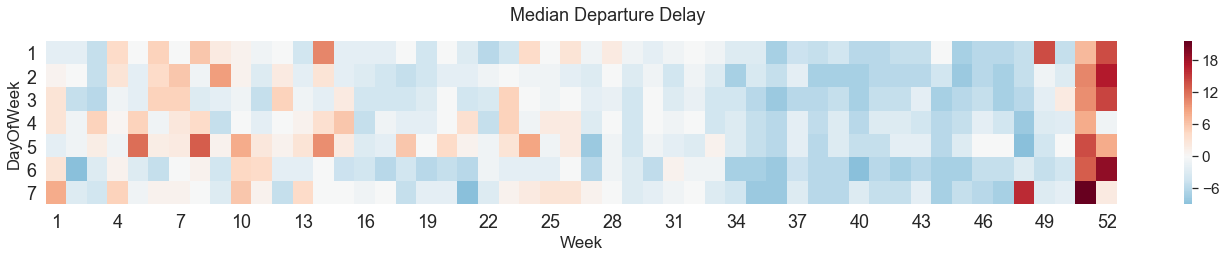

In [202]:
plt.figure(figsize = [24, 3])
sb.heatmap(flights_samp_days_Dep, cmap = 'RdBu_r', center = 0, cbar=True, xticklabels=3)
plt.xticks(rotation=0, fontsize=18)
plt.yticks(rotation=0, ha='right', fontsize=18)
#plt.xticks(rotation=30, ha='right', fontsize=12)
#plt.yticks(fontsize=12)

title_string=('Median Departure Delay')
plt.suptitle(title_string, x=0.45, y=1.04, fontsize=18)
plt.show()

**List of Color Maps that were considered:**

In [ ]:
#RdGy_r
#RdBu_r
#cmap = mpl.cm.get_cmap('Blues', 5)
#RdYlGn_r
#YlOrBr
#Spectral_r
#cmap = 'PiYG_r'
# cmap = mpl.cm.get_cmap('Blues', 5)
# plt.set_cmap(cmap)
# cmap = sb.cubehelix_palette(start=4.5, light=1.6, as_cmap=True, reverse=False)
# cmap = YlGn'
#cmap = sns.diverging_palette(220, 20, sep=20, as_cmap=True)
#cmap=plt.cm.jet

<a id='recent_location'></a>
([Top of Page](#top_of_page))

<span style="color:red">

# RECENTLY HERE (7/22)
</span>

**plot ArrDelay vs DepTime vs DayOfYear**

In [ ]:
def plot_histograms_stdAxis(flights, var, xaxis_label, numPlots, min_vals, max_vals, binsizes):
    fig, ax = plt.subplots(nrows=numPlots, figsize = [8, numPlots * 3.5])
    for i in range(numPlots):
        bin_edges = np.arange(min_vals[i], max_vals[i]+binsizes[i], binsizes[i])
        ax[i].hist(data = flights, x = var, bins = bin_edges);
        ax[i].set_title(flights[var].name + '\n' +
                        'min: ' + str(min_vals[i]) +
                        ', max: ' + str(max_vals[i]) +
                        ', binsize: ' +
                        str(binsizes[i]) + ' ',
                        pad=-30, loc='right')

    plt.xlabel(xaxis_label)
    plt.show()

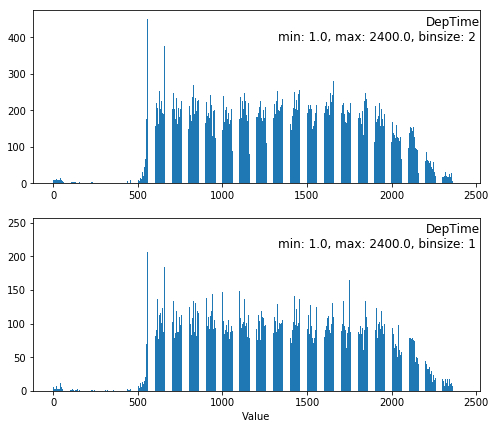

------------------------------------------------------------------------------------


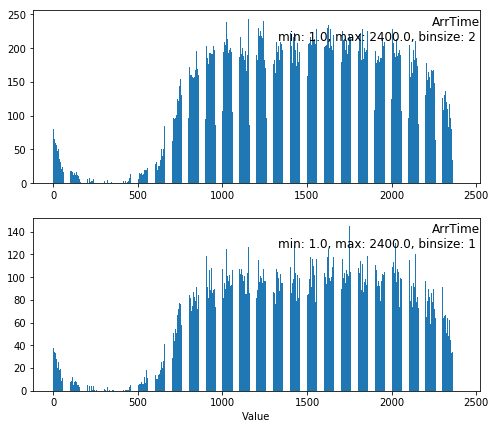

------------------------------------------------------------------------------------


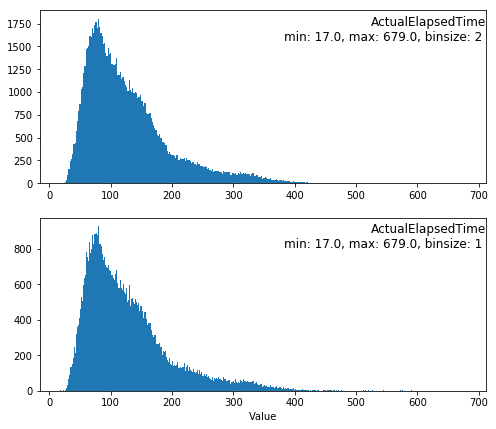

------------------------------------------------------------------------------------


In [108]:
# vars_distr = ['DepTime']
vars_distr = ['DepTime', 'ArrTime', 'ActualElapsedTime']
#sb.set_style("whitegrid")
#default_color = sb.color_palette()[0]
#alpha = 1

numPlots = 2;
for i in range(len(vars_distr)):
    var = vars_distr[i]
    min_values = [flights_samp[var].min(), flights_samp[var].min()]
    max_values = [flights_samp[var].max(), flights_samp[var].max()]
    binsizes = [2, 1]
    plot_histograms_stdAxis(flights_samp, var, 'Value', numPlots, min_values, max_values, binsizes)
    print('------------------------------------------------------------------------------------')

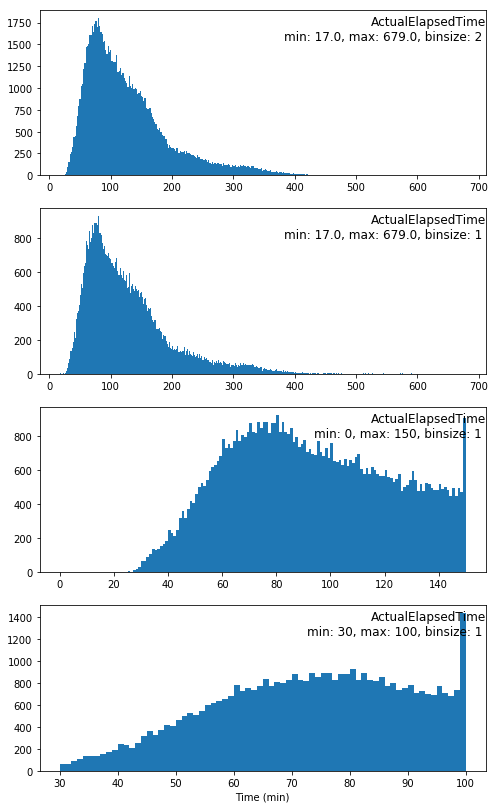

In [106]:
var = 'ActualElapsedTime'
numPlots = 4
min_values = [flights_samp[var].min(), flights_samp[var].min(),
              0, 30]
max_values = [flights_samp[var].max(), flights_samp[var].max(),
              150, 100]
binsizes = [2, 1, 1, 1]
plot_histograms_stdAxis(flights_samp, var, 'Time (min)', numPlots, min_values, max_values, binsizes)

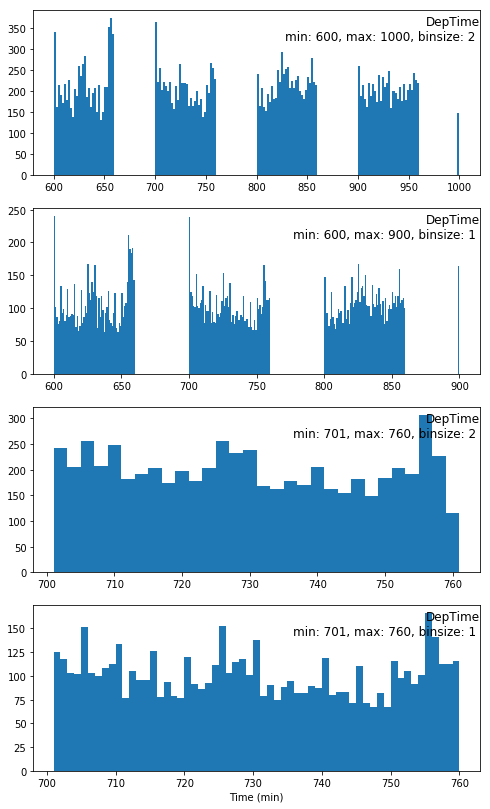

In [587]:
var = 'DepTime'
numPlots = 4
min_values = [600, 600, 701, 701]
max_values = [1000, 900, 760, 760]
binsizes = [2, 1, 2, 1]
plot_histograms_stdAxis(flights_samp, var, 'Time (min)', numPlots, min_values, max_values, binsizes)

In [ ]:
var = 'DayOfYear'
numPlots = 2
min_values = [flights_samp[var].min(), flights_samp[var].min()]
max_values = [flights_samp[var].max(), flights_samp[var].max()]
binsizes = [2, 1]
plot_histograms_stdAxis(flights_samp, var, 'Time (min)', numPlots, min_values, max_values, binsizes)

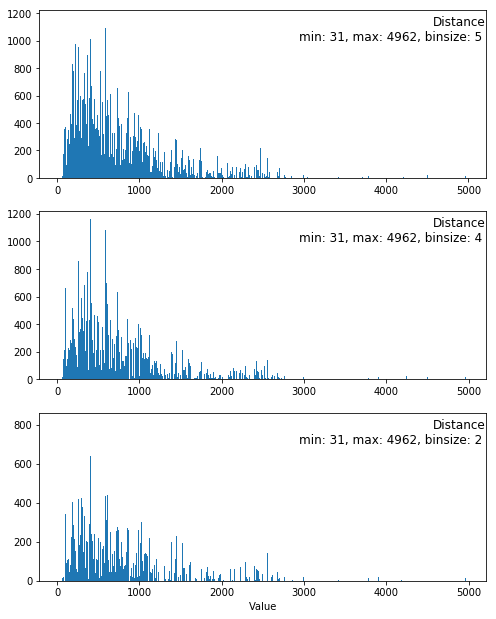

------------------------------------------------------------------------------------


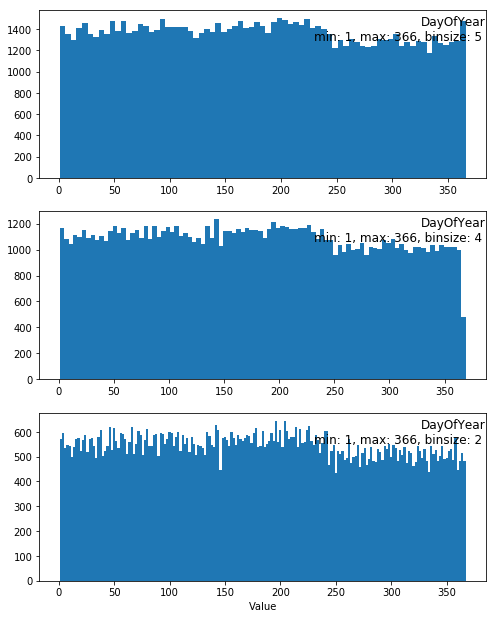

------------------------------------------------------------------------------------


In [588]:
vars_distr = ['Distance', 'DayOfYear']

numPlots = 3;
for i in range(len(vars_distr)):
    var = vars_distr[i]
    min_values = [flights_samp[var].min(), flights_samp[var].min(), flights_samp[var].min()]
    max_values = [flights_samp[var].max(), flights_samp[var].max(), flights_samp[var].max()]
    binsizes = [5, 4, 2]
    plot_histograms_stdAxis(flights_samp, var, 'Value', numPlots, min_values, max_values, binsizes)
    print('------------------------------------------------------------------------------------')

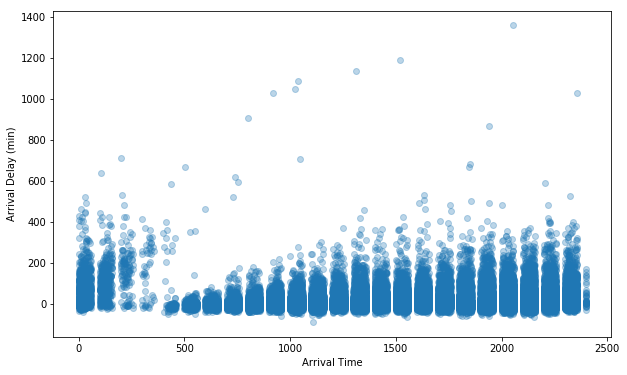

In [114]:
plt.figure(figsize = [10, 6])
#plt.scatter(data = flights_samp, x = 'DepTime', y = 'ArrDelay', alpha = 0.003);
plt.scatter(data = flights_samp, x = 'ArrTime', y = flights_samp['ArrDelay'], alpha = 0.3);
plt.xlabel('Arrival Time')
plt.ylabel('Arrival Delay (min)')
plt.show()

**Reduce the number of points by:**
* only looking at flights leaving between 700 and 800
* removing outliers (Arrival Delays greater than 300 minutes)

<a id='current_location'></a>
([Top of Page](#top_of_page))

<span style="color:red">

# CURRENTLY HERE (7/22)
</span>

In [272]:
mask1 = flights_samp['DepTime'] > 700
mask2 = flights_samp['DepTime'] <= 760
#mask3 = flights_samp['ArrDelay'] <= 300
flights_samp_early = flights_samp[mask1 & mask2]
#flights_samp_early = flights_samp[mask1 & mask2 & mask3]

# # sample the dataset to make sure it has DepTime values: 700 < DepTime <= 760
# samples = np.random.choice(flights_samp_early.shape[0], 20, replace = False)
# flights_samp_early.iloc[samples,:]

In [274]:
flights_samp_early.ArrDelay.describe()

count    5960.000000
mean       -0.713255
std        28.861873
min       -51.000000
25%       -12.000000
50%        -4.000000
75%         4.000000
max      1046.000000
Name: ArrDelay, dtype: float64

In [322]:
mask1 = flights_samp['WeatherDelay'] > 0
flights_samp_weather = flights_samp[mask1]
flights_samp_weather.ArrDelay.describe()

count    1372.000000
mean       87.408163
std        85.312048
min        15.000000
25%        34.000000
50%        62.000000
75%       113.000000
max      1134.000000
Name: ArrDelay, dtype: float64

In [320]:
mask1 = flights_samp['LateAircraftDelay'] > 0
flights_samp_lateAC = flights_samp[mask1]
flights_samp_lateAC.ArrDelay.describe()

10072

In [323]:
mask1 = flights_samp['CarrierDelay'] > 0
flights_samp_carrier = flights_samp[mask1]
flights_samp_carrier.ArrDelay.describe()

count    9466.000000
mean       58.260828
std        62.467231
min        15.000000
25%        24.000000
50%        38.000000
75%        69.000000
max      1190.000000
Name: ArrDelay, dtype: float64

In [231]:
# sample the dataset to reduce overplotting
samples = np.random.choice(flights_samp_early.shape[0], 1000, replace = False)
flights_samp_early_samp = flights_samp_early.iloc[samples,:]

In [262]:
# re-sample the dataset
samples = np.random.choice(flights_samp.shape[0], 30000, replace = False)
flights_samp_small = flights_samp.iloc[samples,:]

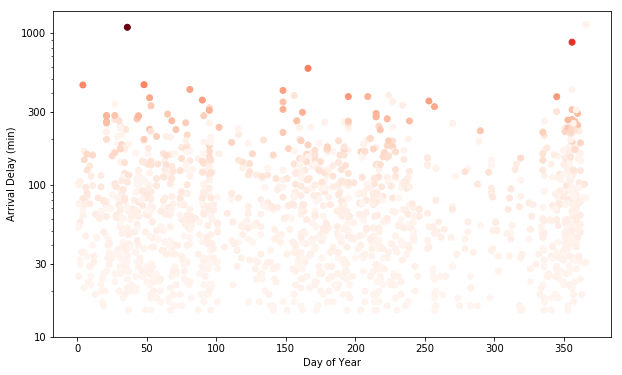

In [359]:
plt.figure(figsize = [10, 6])
plt.scatter(data = flights_samp_weather, x='DayOfYear', y='ArrDelay', alpha=1, cmap='Reds', c='WeatherDelay');
plt.xlabel('Day of Year')
plt.ylabel('Arrival Delay (min)')
plt.yscale('log')
tick_locs = [10, 30, 100, 300, 1000]
plt.yticks(tick_locs, tick_locs)
#plt.ylim(10, 1400)
#plt.xlim(700, 1180)
plt.show()

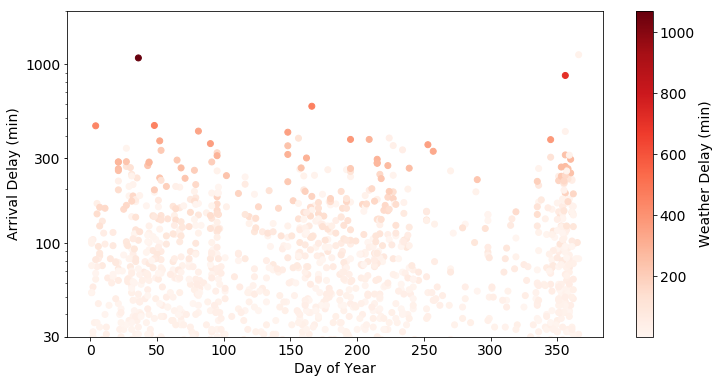

In [432]:
plt.figure(figsize = [12, 6])
ax = plt.scatter(data = flights_samp_weather, x='DayOfYear', y='ArrDelay', alpha=1, cmap='Reds', c='WeatherDelay');
plt.xlabel('Day of Year', fontsize=14)
plt.ylabel('Arrival Delay (min)', fontsize=14)
plt.yscale('log')
tick_locs = [100, 200, 300, 500, 1000, 2000]
tick_locs = [30, 100, 300, 1000]
plt.yticks(tick_locs, tick_locs, fontsize=14)
plt.xticks(fontsize=14)
#ax.figure.axes[-1].tick_params(labelsize=14)
plt.ylim(30, 2000)
plt.colorbar()
ax.figure.axes[-1].tick_params(labelsize=14)
ax.figure.axes[-1].set_ylabel('Weather Delay (min)', size=14)
plt.show()

In [368]:
flights_all_mod[flights_all_mod['WeatherDelay'] > 0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99985 entries, 402 to 7009717
Data columns (total 32 columns):
Year                 99985 non-null int64
Month                99985 non-null int64
DayofMonth           99985 non-null int64
DayOfWeek            99985 non-null int64
DepTime              99985 non-null float64
CRSDepTime           99985 non-null int64
ArrTime              99985 non-null float64
CRSArrTime           99985 non-null int64
UniqueCarrier        99985 non-null object
FlightNum            99985 non-null int64
TailNum              99984 non-null object
ActualElapsedTime    99985 non-null float64
CRSElapsedTime       99985 non-null float64
AirTime              99985 non-null float64
ArrDelay             99985 non-null float64
DepDelay             99985 non-null float64
Origin               99985 non-null object
Dest                 99985 non-null object
Distance             99985 non-null int64
TaxiIn               99985 non-null float64
TaxiOut              99985 

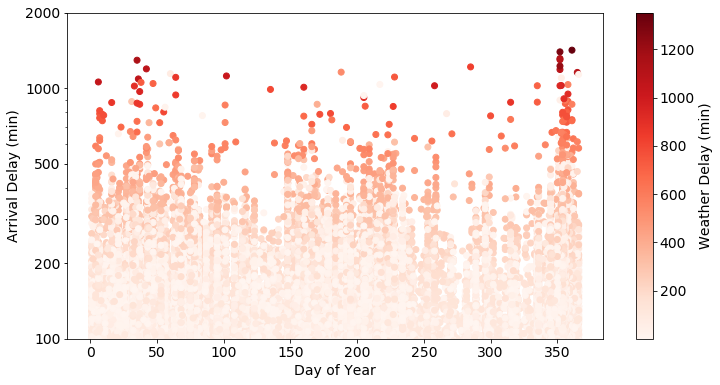

In [406]:
plt.figure(figsize = [12, 6])
ax = plt.scatter(data = flights_all_mod[flights_all_mod['WeatherDelay'] > 0], x='DayOfYear', y='ArrDelay', 
            alpha=1, cmap='Reds', c='WeatherDelay');
plt.xlabel('Day of Year', fontsize=14)
plt.ylabel('Arrival Delay (min)', fontsize=14)
plt.yscale('log')
tick_locs = [100, 200, 300, 500, 1000, 2000]
plt.yticks(tick_locs, tick_locs, fontsize=14)
plt.xticks(fontsize=14)
#ax.figure.axes[-1].tick_params(labelsize=14)
plt.ylim(100, 2000)
plt.colorbar()
ax.figure.axes[-1].tick_params(labelsize=14)
ax.figure.axes[-1].set_ylabel('Weather Delay (min)', size=14)
plt.show()

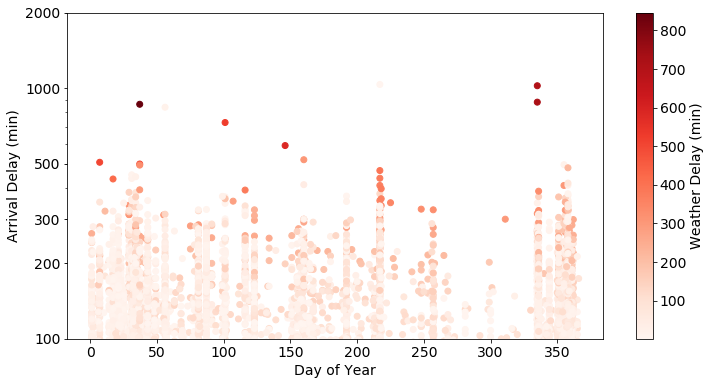

In [462]:
plt.figure(figsize = [12, 6])
ax = plt.scatter(data = flights_all_mod[(flights_all_mod['WeatherDelay'] > 0) &
                                        (flights_all_mod['Origin'] == 'ORD')],
                 x='DayOfYear', y='ArrDelay', alpha=1, cmap='Reds', c='WeatherDelay');
plt.xlabel('Day of Year', fontsize=14)
plt.ylabel('Arrival Delay (min)', fontsize=14)
plt.yscale('log')
tick_locs = [100, 200, 300, 500, 1000, 2000]
plt.yticks(tick_locs, tick_locs, fontsize=14)
plt.xticks(fontsize=14)
#ax.figure.axes[-1].tick_params(labelsize=14)
plt.ylim(100, 2000)
plt.colorbar()
ax.figure.axes[-1].tick_params(labelsize=14)
ax.figure.axes[-1].set_ylabel('Weather Delay (min)', size=14)
plt.show()

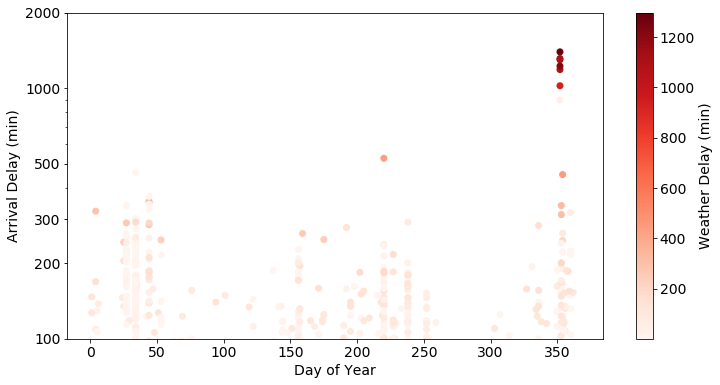

In [463]:
plt.figure(figsize = [12, 6])
ax = plt.scatter(data = flights_all_mod[(flights_all_mod['WeatherDelay'] > 0) &
                                        (flights_all_mod['Origin'] == 'LAS')],
                 x='DayOfYear', y='ArrDelay', alpha=1, cmap='Reds', c='WeatherDelay');
plt.xlabel('Day of Year', fontsize=14)
plt.ylabel('Arrival Delay (min)', fontsize=14)
plt.yscale('log')
tick_locs = [100, 200, 300, 500, 1000, 2000]
plt.yticks(tick_locs, tick_locs, fontsize=14)
plt.xticks(fontsize=14)
#ax.figure.axes[-1].tick_params(labelsize=14)
plt.ylim(100, 2000)
plt.colorbar()
ax.figure.axes[-1].tick_params(labelsize=14)
ax.figure.axes[-1].set_ylabel('Weather Delay (min)', size=14)
plt.show()

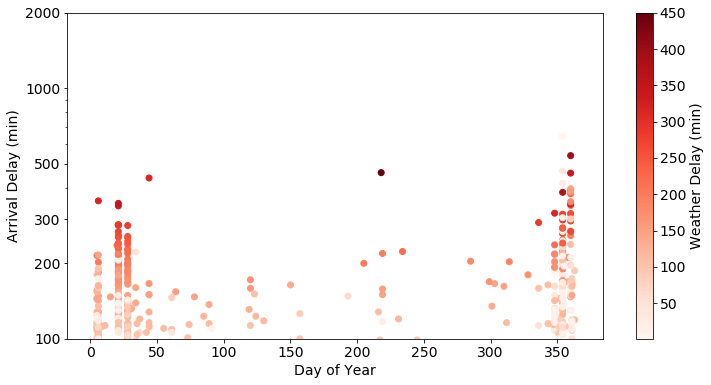

In [579]:
plt.figure(figsize = [12, 6])
ax = plt.scatter(data = flights_all_mod[(flights_all_mod['WeatherDelay'] > 0) &
                                        (flights_all_mod['Origin'] == 'SLC')],
                 x='DayOfYear', y='ArrDelay', alpha=1, cmap='Reds', c='WeatherDelay');
plt.xlabel('Day of Year', fontsize=14)
plt.ylabel('Arrival Delay (min)', fontsize=14)
plt.yscale('log')
tick_locs = [100, 200, 300, 500, 1000, 2000]
plt.yticks(tick_locs, tick_locs, fontsize=14)
plt.xticks(fontsize=14)
#ax.figure.axes[-1].tick_params(labelsize=14)
plt.ylim(100, 2000)
plt.colorbar()
ax.figure.axes[-1].tick_params(labelsize=14)
ax.figure.axes[-1].set_ylabel('Weather Delay (min)', size=14)
plt.show()

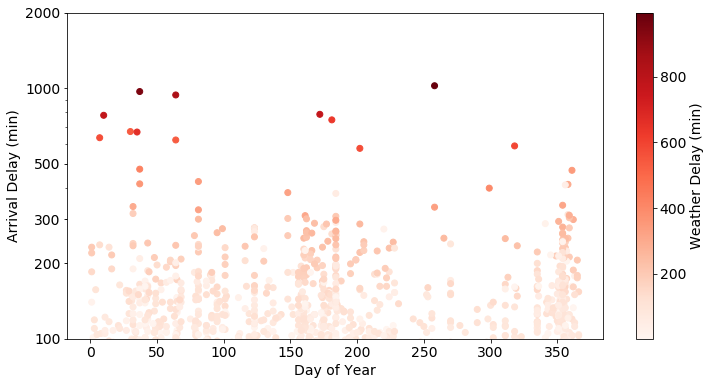

In [580]:
plt.figure(figsize = [12, 6])
ax = plt.scatter(data = flights_all_mod[(flights_all_mod['WeatherDelay'] > 0) &
                                        (flights_all_mod['Origin'] == 'DTW')],
                 x='DayOfYear', y='ArrDelay', alpha=1, cmap='Reds', c='WeatherDelay');
plt.xlabel('Day of Year', fontsize=14)
plt.ylabel('Arrival Delay (min)', fontsize=14)
plt.yscale('log')
tick_locs = [100, 200, 300, 500, 1000, 2000]
plt.yticks(tick_locs, tick_locs, fontsize=14)
plt.xticks(fontsize=14)
#ax.figure.axes[-1].tick_params(labelsize=14)
plt.ylim(100, 2000)
plt.colorbar()
ax.figure.axes[-1].tick_params(labelsize=14)
ax.figure.axes[-1].set_ylabel('Weather Delay (min)', size=14)
plt.show()

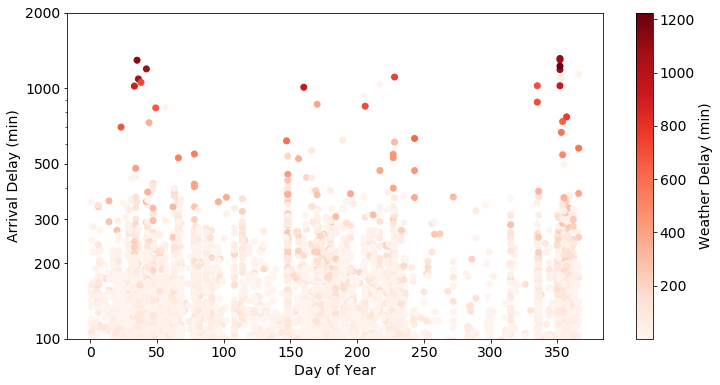

In [582]:
plt.figure(figsize = [12, 6])
ax = plt.scatter(data = flights_all_mod[(flights_all_mod['WeatherDelay'] > 0) &
                                        (flights_all_mod['UniqueCarrier'] == 'AA')],
                 x='DayOfYear', y='ArrDelay', alpha=1, cmap='Reds', c='WeatherDelay');
plt.xlabel('Day of Year', fontsize=14)
plt.ylabel('Arrival Delay (min)', fontsize=14)
plt.yscale('log')
tick_locs = [100, 200, 300, 500, 1000, 2000]
plt.yticks(tick_locs, tick_locs, fontsize=14)
plt.xticks(fontsize=14)
#ax.figure.axes[-1].tick_params(labelsize=14)
plt.ylim(100, 2000)
plt.colorbar()
ax.figure.axes[-1].tick_params(labelsize=14)
ax.figure.axes[-1].set_ylabel('Weather Delay (min)', size=14)
plt.show()

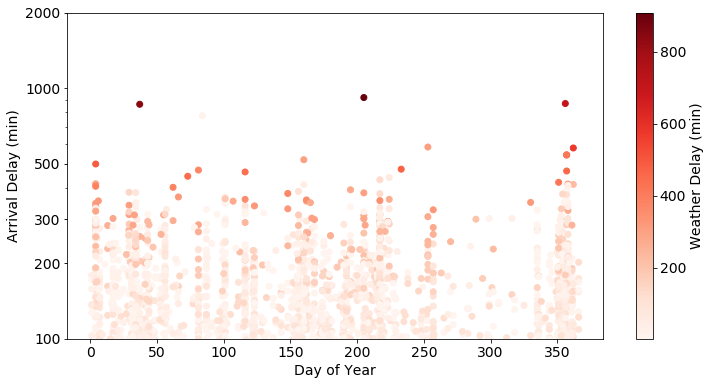

In [583]:
plt.figure(figsize = [12, 6])
ax = plt.scatter(data = flights_all_mod[(flights_all_mod['WeatherDelay'] > 0) &
                                        (flights_all_mod['UniqueCarrier'] == 'UA')],
                 x='DayOfYear', y='ArrDelay', alpha=1, cmap='Reds', c='WeatherDelay');
plt.xlabel('Day of Year', fontsize=14)
plt.ylabel('Arrival Delay (min)', fontsize=14)
plt.yscale('log')
tick_locs = [100, 200, 300, 500, 1000, 2000]
plt.yticks(tick_locs, tick_locs, fontsize=14)
plt.xticks(fontsize=14)
#ax.figure.axes[-1].tick_params(labelsize=14)
plt.ylim(100, 2000)
plt.colorbar()
ax.figure.axes[-1].tick_params(labelsize=14)
ax.figure.axes[-1].set_ylabel('Weather Delay (min)', size=14)
plt.show()

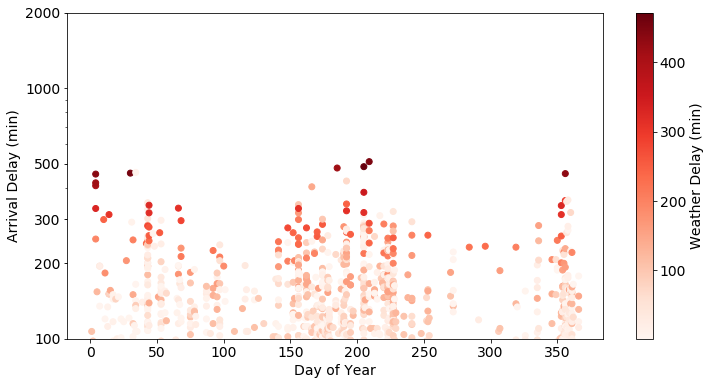

In [584]:
plt.figure(figsize = [12, 6])
ax = plt.scatter(data = flights_all_mod[(flights_all_mod['WeatherDelay'] > 0) &
                                        (flights_all_mod['UniqueCarrier'] == 'US')],
                 x='DayOfYear', y='ArrDelay', alpha=1, cmap='Reds', c='WeatherDelay');
plt.xlabel('Day of Year', fontsize=14)
plt.ylabel('Arrival Delay (min)', fontsize=14)
plt.yscale('log')
tick_locs = [100, 200, 300, 500, 1000, 2000]
plt.yticks(tick_locs, tick_locs, fontsize=14)
plt.xticks(fontsize=14)
#ax.figure.axes[-1].tick_params(labelsize=14)
plt.ylim(100, 2000)
plt.colorbar()
ax.figure.axes[-1].tick_params(labelsize=14)
ax.figure.axes[-1].set_ylabel('Weather Delay (min)', size=14)
plt.show()

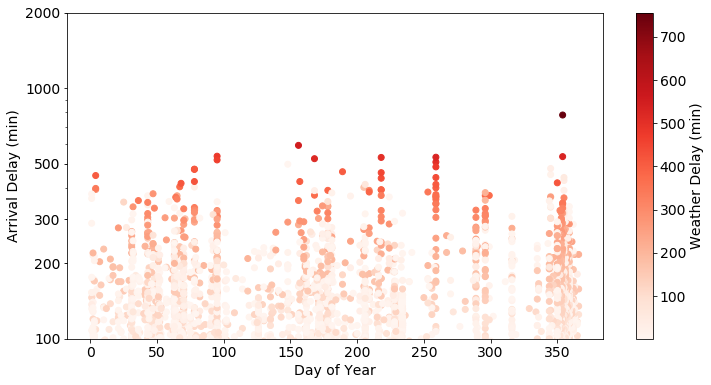

In [585]:
plt.figure(figsize = [12, 6])
ax = plt.scatter(data = flights_all_mod[(flights_all_mod['WeatherDelay'] > 0) &
                                        (flights_all_mod['UniqueCarrier'] == 'XE')],
                 x='DayOfYear', y='ArrDelay', alpha=1, cmap='Reds', c='WeatherDelay');
plt.xlabel('Day of Year', fontsize=14)
plt.ylabel('Arrival Delay (min)', fontsize=14)
plt.yscale('log')
tick_locs = [100, 200, 300, 500, 1000, 2000]
plt.yticks(tick_locs, tick_locs, fontsize=14)
plt.xticks(fontsize=14)
#ax.figure.axes[-1].tick_params(labelsize=14)
plt.ylim(100, 2000)
plt.colorbar()
ax.figure.axes[-1].tick_params(labelsize=14)
ax.figure.axes[-1].set_ylabel('Weather Delay (min)', size=14)
plt.show()

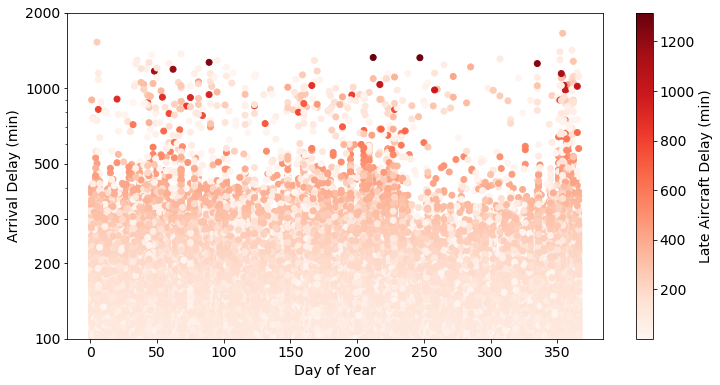

In [428]:
plt.figure(figsize = [12, 6])
ax = plt.scatter(data = flights_all_mod[flights_all_mod['LateAircraftDelay'] > 0], x='DayOfYear', y='ArrDelay', 
            alpha=1, cmap='Reds', c='LateAircraftDelay');
plt.xlabel('Day of Year', fontsize=14)
plt.ylabel('Arrival Delay (min)', fontsize=14)
plt.yscale('log')
#tick_locs = [100, 300, 500, 1000, 2000]
tick_locs = [100, 200, 300, 500, 1000, 2000]
plt.yticks(tick_locs, tick_locs, fontsize=14)
plt.xticks(fontsize=14)
#ax.figure.axes[-1].tick_params(labelsize=14)
plt.ylim(100, 2000)
plt.colorbar()
ax.figure.axes[-1].tick_params(labelsize=14)
ax.figure.axes[-1].set_ylabel('Late Aircraft Delay (min)', size=14)
plt.show()

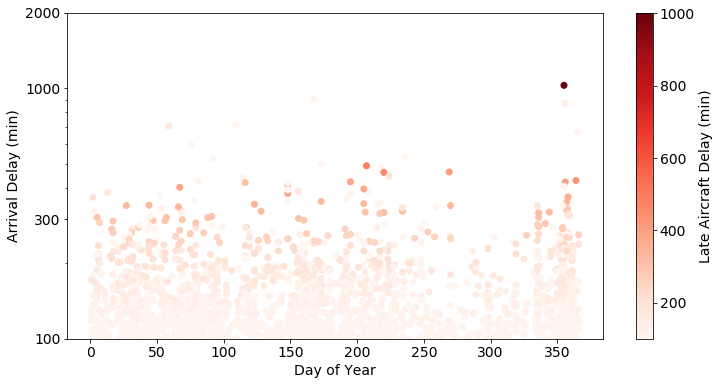

In [424]:
plt.figure(figsize = [12, 6])
ax = plt.scatter(data = flights_samp[flights_samp['LateAircraftDelay'] > 0], x='DayOfYear', y='ArrDelay', 
            alpha=1, cmap='Reds', c='LateAircraftDelay', vmin=100);
plt.xlabel('Day of Year', fontsize=14)
plt.ylabel('Arrival Delay (min)', fontsize=14)
plt.yscale('log')
#tick_locs = [100, 300, 500, 1000, 2000]
tick_locs = [100, 300, 1000, 2000]
plt.yticks(tick_locs, tick_locs, fontsize=14)
plt.xticks(fontsize=14)
#ax.figure.axes[-1].tick_params(labelsize=14)
#plt.ylim(100, 2000)
plt.ylim(100, 2000)
plt.colorbar()
ax.figure.axes[-1].tick_params(labelsize=14)
ax.figure.axes[-1].set_ylabel('Late Aircraft Delay (min)', size=14)
plt.show()

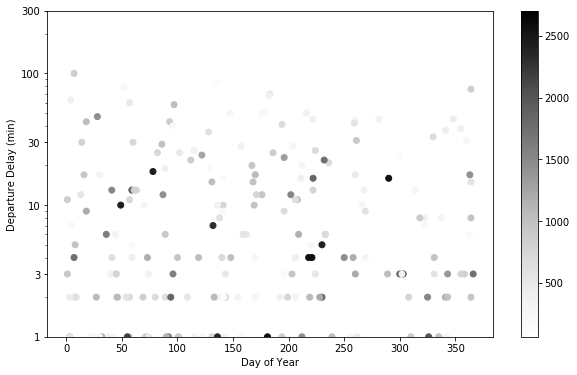

In [382]:
plt.figure(figsize = [10, 6])
plt.scatter(data = flights_samp_early_samp, x='DayOfYear', y='DepDelay', alpha=1, cmap='Greys', c='Distance');
plt.xlabel('Day of Year')
plt.ylabel('Departure Delay (min)')

plt.yscale('log')
tick_locs = [1, 3, 10, 30, 100, 300]
#tick_locs = [1, 3, 10, 30, 100, 300, 1000]
#tick_locs = [1, 3, 10, 30, 100, 300, 1000, 3000]
plt.yticks(tick_locs, tick_locs)
plt.ylim(1, 300)
#plt.xlim(700, 1180)
plt.colorbar()

plt.show()

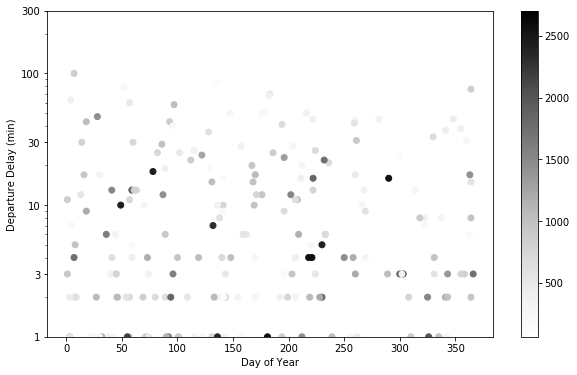

In [383]:
plt.figure(figsize = [10, 6])
plt.scatter(data = flights_samp_early_samp, x='DayOfYear', y='DepDelay', alpha=1, cmap='Greys', c='Distance');
plt.xlabel('Day of Year')
plt.ylabel('Departure Delay (min)')
plt.yscale('log')
tick_locs = [1, 3, 10, 30, 100, 300]
plt.yticks(tick_locs, tick_locs)
plt.ylim(1, 300)
plt.colorbar()
plt.show()

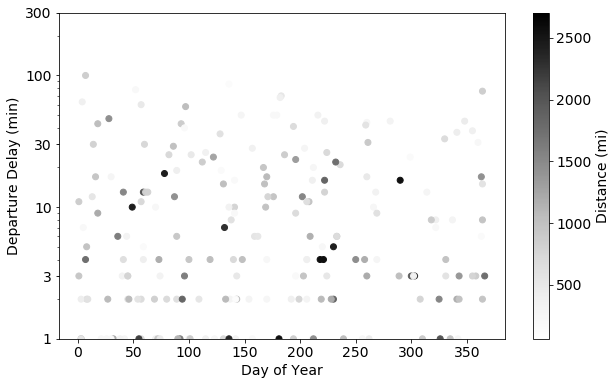

In [438]:
plt.figure(figsize = [10, 6])
#plt.scatter(data = flights_samp_early_samp, x='DayOfYear', y='DepDelay', alpha=1, cmap='Greys', c='Distance');
ax = plt.scatter(data = flights_samp_early_samp, x='DayOfYear', y='DepDelay', alpha=1, cmap='Greys', c='Distance');
plt.xlabel('Day of Year', fontsize=14)
plt.ylabel('Departure Delay (min)', fontsize=14)
plt.yscale('log')
tick_locs = [1, 3, 10, 30, 100, 300]
plt.yticks(tick_locs, tick_locs, fontsize=14)
plt.xticks(fontsize=14)
#ax.figure.axes[-1].tick_params(labelsize=14)
plt.ylim(1, 300)
plt.colorbar()
ax.figure.axes[-1].tick_params(labelsize=14)
ax.figure.axes[-1].set_ylabel('Distance (mi)', size=14)
plt.show()

In [ ]:
plt.figure(figsize = [12, 6])
ax = sb.heatmap(flights_varsCorr, annot = True, fmt = '.3f', annot_kws={"size": 14},
           cmap = 'vlag_r', center = 0,
           xticklabels=varsCorr_nonZero)
ax.figure.axes[-1].tick_params(labelsize=14)
#ax.figure.axes[-1].set_ylabel('Correlation Coefficient', size=16)
ax.tick_params(labelsize=14)
plt.xticks(rotation=30, ha='right')
#plt.xticks(rotation=30, ha='right', fontsize=12)
#plt.yticks(fontsize=12)
title_string=('Correlation Coefficients after removing \'zero\' values from select columns')
plt.suptitle(title_string, x=0.45, y=0.97, fontsize=18)
plt.show()

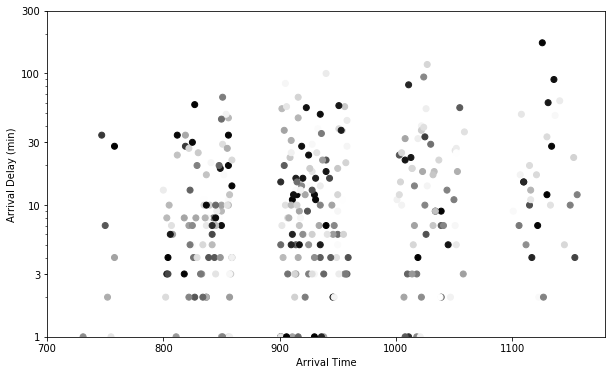

In [207]:
plt.figure(figsize = [10, 6])
plt.scatter(data = flights_samp_early_samp, x='ArrTime', y='ArrDelay', alpha=1, cmap='Greys', c='DayOfYear');
plt.xlabel('Arrival Time')
plt.ylabel('Arrival Delay (min)')

plt.yscale('log')
tick_locs = [1, 3, 10, 30, 100, 300]
#tick_locs = [1, 3, 10, 30, 100, 300, 1000]
#tick_locs = [1, 3, 10, 30, 100, 300, 1000, 3000]
plt.yticks(tick_locs, tick_locs)
plt.ylim(1, 300)
plt.xlim(700, 1180)

plt.show()

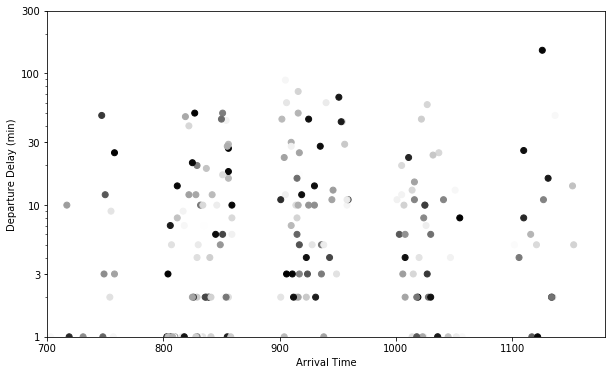

In [208]:
plt.figure(figsize = [10, 6])
plt.scatter(data = flights_samp_early_samp, x='ArrTime', y='DepDelay', alpha=1, cmap='Greys', c='DayOfYear');
plt.xlabel('Arrival Time')
plt.ylabel('Departure Delay (min)')

plt.yscale('log')
tick_locs = [1, 3, 10, 30, 100, 300]
#tick_locs = [1, 3, 10, 30, 100, 300, 1000]
#tick_locs = [1, 3, 10, 30, 100, 300, 1000, 3000]
plt.yticks(tick_locs, tick_locs)
plt.ylim(1, 300)
plt.xlim(700, 1180)

plt.show()

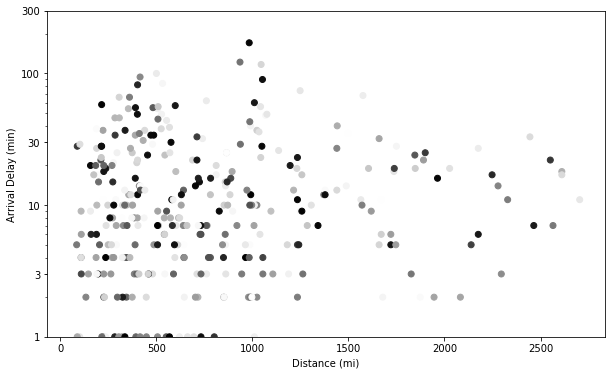

In [209]:
plt.figure(figsize = [10, 6])
plt.scatter(data = flights_samp_early_samp, x='Distance', y='ArrDelay', alpha=1.0, cmap='Greys', c='DayOfYear');
plt.xlabel('Distance (mi)')
plt.ylabel('Arrival Delay (min)')

plt.yscale('log')
tick_locs = [1, 3, 10, 30, 100, 300]
plt.yticks(tick_locs, tick_locs)
plt.ylim(1, 300)
#plt.xlim(700, 1180)

plt.show()

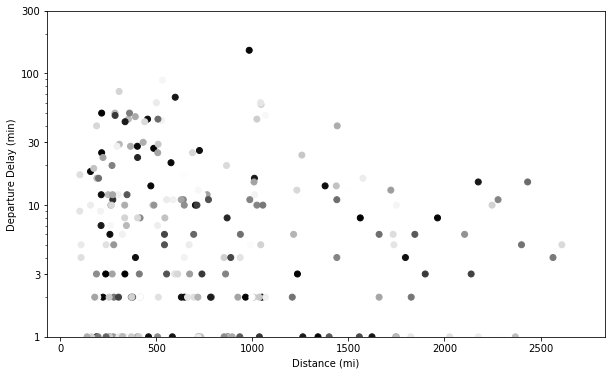

In [210]:
plt.figure(figsize = [10, 6])
plt.scatter(data = flights_samp_early_samp, x='Distance', y='DepDelay', alpha=1.0, cmap='Greys', c='DayOfYear');
plt.xlabel('Distance (mi)')
plt.ylabel('Departure Delay (min)')

plt.yscale('log')
tick_locs = [1, 3, 10, 30, 100, 300]
plt.yticks(tick_locs, tick_locs)
plt.ylim(1, 300)
#plt.xlim(700, 1180)

plt.show()

In [211]:
flights_samp.dtypes

Year                          int64
Month                         int64
DayofMonth                    int64
DayOfWeek                     int64
DepTime                     float64
CRSDepTime                    int64
ArrTime                     float64
CRSArrTime                    int64
UniqueCarrier                object
FlightNum                     int64
TailNum                      object
ActualElapsedTime           float64
CRSElapsedTime              float64
AirTime                     float64
ArrDelay                    float64
DepDelay                    float64
Origin                       object
Dest                         object
Distance                      int64
TaxiIn                      float64
TaxiOut                     float64
Cancelled                     int64
CancellationCode             object
Diverted                      int64
CarrierDelay                float64
WeatherDelay                float64
NASDelay                    float64
SecurityDelay               

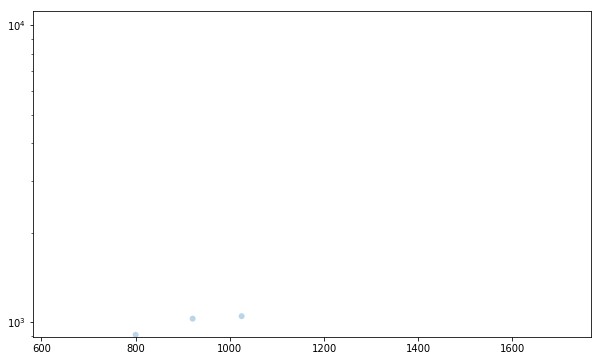

In [141]:
plt.figure(figsize = [10, 6])
#fig = plt.figure()
ax = plt.gca()
ax.scatter(flights_samp_early['ArrTime'] , flights_samp_early['ArrDelay'], alpha=0.3, edgecolors='none');
#ax.scatter(flights_samp_early['ArrTime'] , flights_samp_early['ArrDelay'], c='blue', alpha=0.3, edgecolors='none');
#bin_edges = 10 ** np.arange(0, np.log10(max_vals[i])+log_binsizes[i], log_binsizes[i])
ax.set_yscale('log')
#ax.set_xscale('log')

In [ ]:
# #-- Generate some data...-------
# x = np.linspace(-10, 50, 100)
# y = x**2 + 3*x + 8
# 
# # Add a lot of noise to part of the data...
# y[x < 10] += np.random.random(sum(x < 10)) * 300
# 
# # Now let's extract only the part of the data we're interested in...
# x_filt = x[x > 10]
# y_filt = y[x > 10]
# 
# # And fit a line to only that portion of the data.
# model = np.polyfit(x_filt, y_filt, 2)
# 
# # And plot things up
# fig, axes = plt.subplots(nrows=2, sharex=True)
# axes[0].plot(x, y, 'bo')
# axes[1].plot(x_filt, y_filt, 'bo')
# axes[1].plot(x, np.polyval(model, x), 'r-')
# 
# plt.show()

In [ ]:
# numPlots = 1
# for i in range(numPlots):
#     fig, ax = plt.subplots(nrows=numPlots, ncols=1, figsize = [10, numPlots * 8])
#     #fig, ax = plt.subplots(nrows=numPlots, ncols = 1, figSize = [12, numPlots * 10])
#     ax[i].scatter(data = flights_samp, x = 'ArrDelay', y = 'DepTime', alpha = 0.3);
#     ax[i].set(xlabel='Arrival Delay (min)', ylabel='Departure Time')
# plt.show()

TypeError: 'AxesSubplot' object does not support indexing

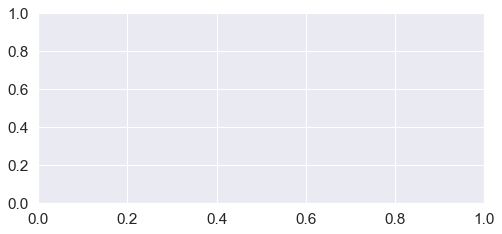

In [302]:
numPlots = 1;
#for i in range(len(vars_distr)):
var = 'ArrTime'
min_values = [flights[var].min(), flights[var].min(), flights[var].min()]
max_values = [flights[var].max(), flights[var].max(), flights[var].max()]
binsizes = [2, 1]
plot_histograms_stdAxis(flights, var, 'Value', 1, min_values, max_values, binsizes)

# nu
# fig, ax = plt.subplots(nrows=numPlots, figsize = [8, numPlots * 3.5])
# for i in range(numPlots):
#     bin_edges = np.arange(min_vals[i], max_vals[i]+binsizes[i], binsizes[i])
#     ax[i].hist(data = flights, x = var, bins = bin_edges);
#     ax[i].set_title(flights[var].name + '\n' +
#                     'min: ' + str(min_vals[i]) +
#                     ', max: ' + str(max_vals[i]) +
#                     ', binsize: ' +
#                     str(binsizes[i]) + ' ',
#                     pad=-30, loc='right')
# 
# plt.xlabel(xaxis_label)
# plt.show()

In [ ]:
vars_distr = ['Month', 'DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime', 'ActualElapsedTime',
              'CRSElapsedTime', 'AirTime', 'Distance', 'TaxiIn', 'TaxiOut', 'Cancelled', 'Diverted']

vars_categ = ['UniqueCarrier', 'Origin', 'Dest', 'CancellationCode']

numPlots = 3;
for i in range(len(vars_distr)):
    var = vars_distr[i]
    min_values = [flights[var].min(), flights[var].min(), flights[var].min()]
    max_values = [flights[var].max(), flights[var].max(), flights[var].max()]
    binsizes = [5, 2, 1]
    plot_histograms_stdAxis(flights, var, 'Value', numPlots, min_values, max_values, binsizes)
    print('------------------------------------------------------------------------------------')

In [ ]:
g = sb.FacetGrid(data = flights_samp, col = 'cat_var2', row = 'cat_var1', size = 2.5,
                margin_titles = True)
g.map(plt.scatter, 'num_var1', 'num_var2')

In [ ]:
#g = sns.FacetGrid(flights_samp, col="sex", row="smoker", margin_titles=True)
#g.map(sns.plt.scatter, "DepTime", "ArrDelay")

TypeError: 'AxesSubplot' object does not support indexing

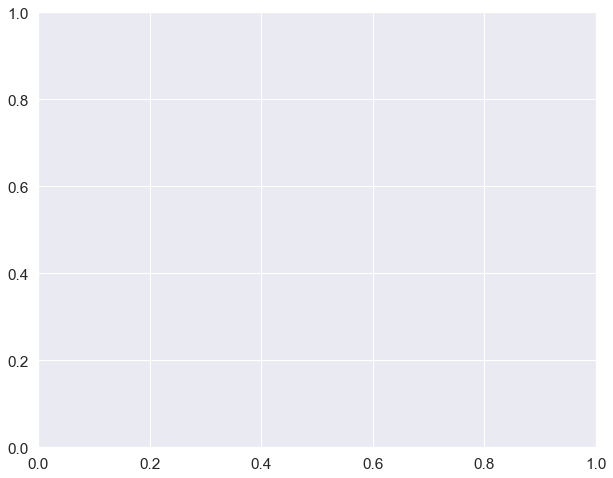

In [282]:
numPlots = 1
for i in range(numPlots):
    fig, ax = plt.subplots(nrows=numPlots, ncols=1, figsize = [10, numPlots * 8])
    #fig, ax = plt.subplots(nrows=numPlots, ncols = 1, figSize = [12, numPlots * 10])
    ax[i].scatter(data = flights_samp, x = 'ArrDelay', y = 'DepTime', alpha = 0.3);
    ax[i].set(xlabel='Arrival Delay (min)', ylabel='Departure Time')
plt.show()

# plt.scatter(data = flights_samp, x = 'ArrDelay', y = 'DepTime', alpha = 0.3);
# plt.xlabel('Arrival Delay (min)')
# plt.ylabel('Departure Time')
# plt.show()

In [ ]:
def plot_histograms_stdAxis(flights, var, xaxis_label, numPlots, min_vals, max_vals, binsizes):
    fig, ax = plt.subplots(nrows=numPlots, figsize = [8, numPlots * 3.5])
    for i in range(numPlots):
        bin_edges = np.arange(min_vals[i], max_vals[i]+binsizes[i], binsizes[i])
        ax[i].hist(data = flights, x = var, bins = bin_edges);
        ax[i].set_title(flights[var].name + '\n' +
                        'min: ' + str(min_vals[i]) +
                        ', max: ' + str(max_vals[i]) +
                        ', binsize: ' +
                        str(binsizes[i]) + ' ',
                        pad=-30, loc='right')

    plt.xlabel(xaxis_label)
    plt.show()

time elapsed: 0.7830138206481934, current time: 20:35:50


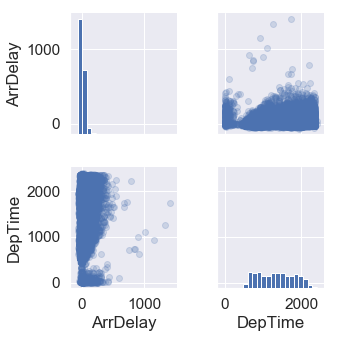

In [259]:
#choose vars to explore
vars_numeric = ['ArrDelay', 'DepTime']

start = time.time()

# plot matrix
g = sb.PairGrid(data = flights_samp, vars = vars_numeric)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter, alpha = 0.2);

end = time.time()
currTime = str(time.localtime().tm_hour) + ':' + str(time.localtime().tm_min) + ':' + str(time.localtime().tm_sec)
print('time elapsed: ' + str(end - start) + ', current time: ' + currTime)

In [ ]:
#choose vars to explore
vars_numeric = ['ArrDelay', 'DepDelay', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'LateAircraftDelay',
                'TaxiIn', 'TaxiOut']

start = time.time()

# sample a subset of the flights so that plots are clearer and render faster
samples = np.random.choice(flights_all.shape[0], 100000, replace = False)
flights_samp = flights_all.loc[samples,:]
#samples = np.random.choice(flights.shape[0], 50000, replace = False)
#flights_samp = flights.loc[samples,:]

# plot matrix
g = sb.PairGrid(data = flights_samp, vars = vars_numeric)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter, alpha = 0.008);

end = time.time()
currTime = str(time.localtime().tm_hour) + ':' + str(time.localtime().tm_min) + ':' + str(time.localtime().tm_sec)
print('time elapsed: ' + str(end - start) + ', current time: ' + currTime)

In [440]:
top10_origin = flights_samp.groupby('Origin').Origin.count().sort_values(ascending=False)[0:10].index.tolist()
top10_carrier = flights_samp.groupby('UniqueCarrier').UniqueCarrier.count().sort_values(ascending=False)[0:10].index.tolist()

flights_samp_reduced = flights_samp[flights_samp.Origin.isin(top10_origin)]
flights_samp_reduced = flights_samp_reduced[flights_samp_reduced.UniqueCarrier.isin(top10_carrier)]

top10_origin

flights_samp.groupby('Origin').Origin.count().sort_values(ascending=False)[0:10]

flights_samp.groupby('UniqueCarrier').UniqueCarrier.count().sort_values(ascending=False)[0:10]

In [444]:
top10_origin

['ATL', 'ORD', 'DFW', 'DEN', 'LAX', 'PHX', 'IAH', 'LAS', 'DTW', 'SLC']

In [445]:
flights_samp.groupby('Origin').Origin.count().sort_values(ascending=False)[0:10]

Origin
ATL    5851
ORD    4987
DFW    4032
DEN    3430
LAX    3165
PHX    2804
IAH    2589
LAS    2522
DTW    2322
SLC    2014
Name: Origin, dtype: int64

In [446]:
flights_samp.groupby('UniqueCarrier').UniqueCarrier.count().sort_values(ascending=False)[0:10]

UniqueCarrier
WN    17381
AA     8699
OO     8026
MQ     6989
DL     6477
UA     6342
US     6329
XE     5334
NW     4976
CO     4281
Name: UniqueCarrier, dtype: int64

<a id='bivariate_exploration_violinPlots_old'></a>
([Top of Page](#top_of_page))
### Violin Plots

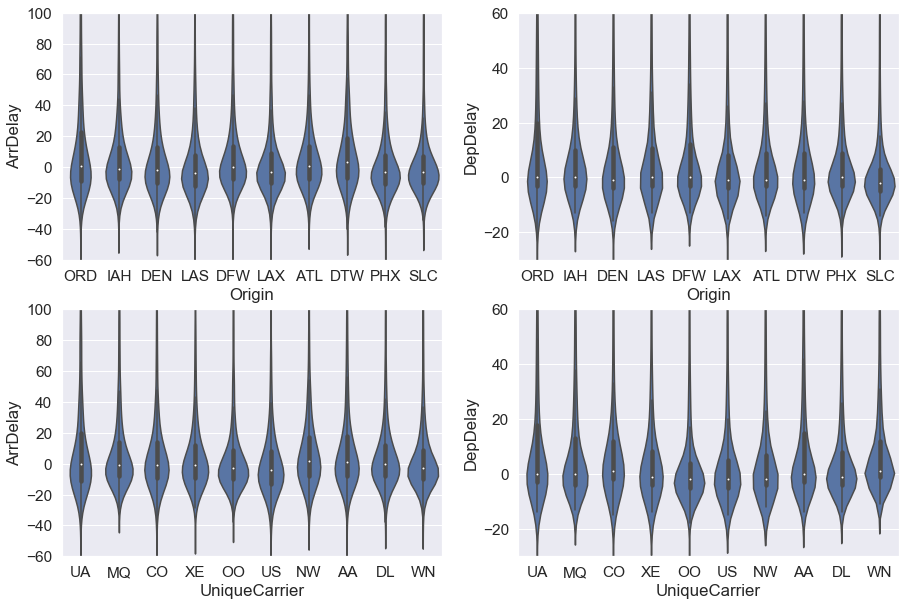

In [131]:
default_color = sb.color_palette()[0]

# plot origin and unique carrier arrival delay
fig, ax = plt.subplots(ncols = 2, nrows = 2, figsize = [15,10], squeeze=False)

categoric_vars = ['Origin', 'UniqueCarrier']

for i in range(len(categoric_vars)):
    var = categoric_vars[i]
    sb.violinplot(data = flights_samp_reduced, x = var, y = 'ArrDelay', ax = ax[i,0], color = default_color)
    ax[i,0].set(ylim=(-60,100))
    
    sb.violinplot(data = flights_samp_reduced, x = var, y = 'DepDelay', ax = ax[i,1], color = default_color)
    ax[i,1].set(ylim=(-30,60))

plt.show()

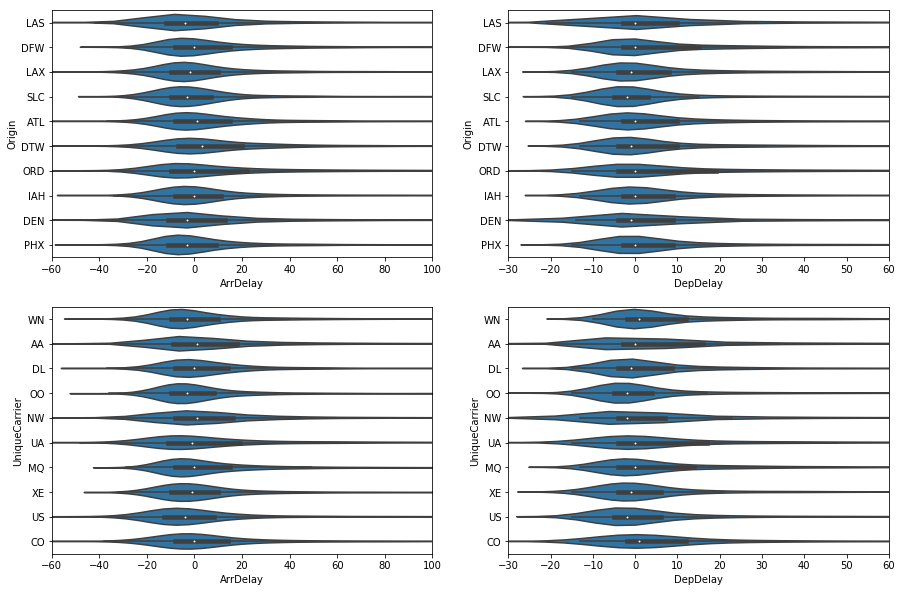

In [441]:
default_color = sb.color_palette()[0]

# plot origin and unique carrier arrival delay
fig, ax = plt.subplots(ncols = 2, nrows = 2, figsize = [15,10], squeeze=False)

categoric_vars = ['Origin', 'UniqueCarrier']

for i in range(len(categoric_vars)):
    var = categoric_vars[i]
    sb.violinplot(data = flights_samp_reduced, y = var, x = 'ArrDelay', ax = ax[i,0], color = default_color)
    ax[i,0].set(xlim=(-60,100))
    
    sb.violinplot(data = flights_samp_reduced, y = var, x = 'DepDelay', ax = ax[i,1], color = default_color)
    ax[i,1].set(xlim=(-30,60))

plt.show()

<a id='bivariate_exploration_boxPlots_old'></a>
([Top of Page](#top_of_page))
### Box Plots

**Create some Box Plots to better assess the nature of each distribution**

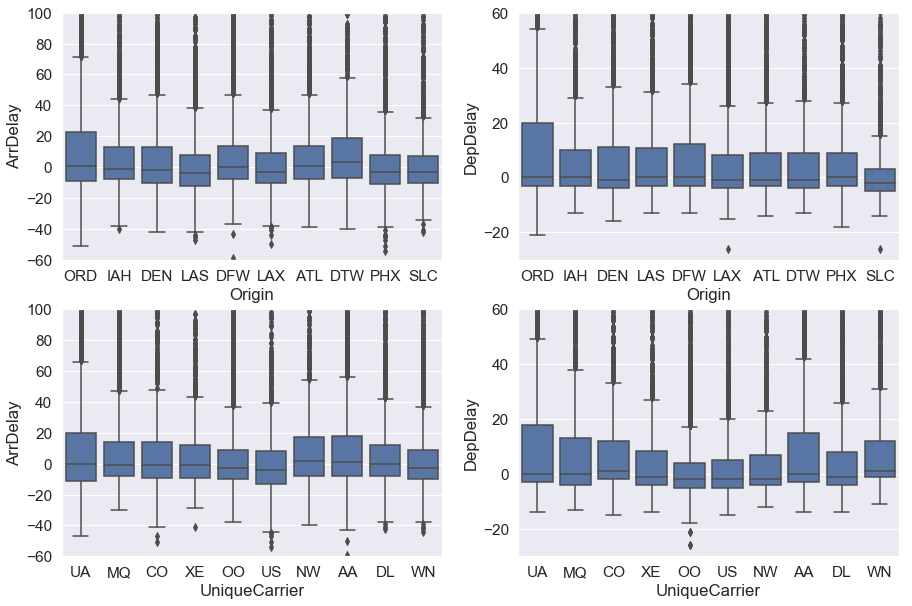

In [172]:
default_color = sb.color_palette()[0]

# plot origin and unique carrier arrival delay
fig, ax = plt.subplots(ncols = 2, nrows = 2, figsize = [15,10], squeeze=False)

categoric_vars = ['Origin', 'UniqueCarrier']

for i in range(len(categoric_vars)):
    var = categoric_vars[i]
    #sb.violinplot(data = flights_samp_reduced, x = var, y = 'ArrDelay', ax = ax[i,0], color = default_color)
    sb.boxplot(data = flights_samp_reduced, x = var, y = 'ArrDelay', ax = ax[i,0], color = default_color)
    ax[i,0].set(ylim=(-60,100))
    
    sb.boxplot(data = flights_samp_reduced, x = var, y = 'DepDelay', ax = ax[i,1], color = default_color)
    ax[i,1].set(ylim=(-30,60))

plt.show()

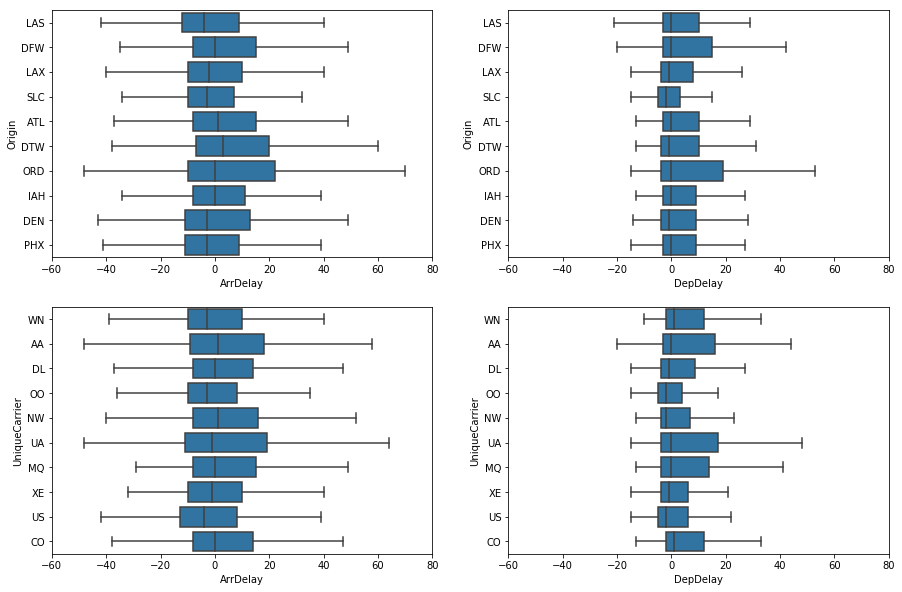

In [499]:
default_color = sb.color_palette()[0]

# plot origin and unique carrier arrival delay
fig, ax = plt.subplots(ncols = 2, nrows = 2, figsize = [15,10], squeeze=False)

categoric_vars = ['Origin', 'UniqueCarrier']

for i in range(len(categoric_vars)):
    var = categoric_vars[i]
    #sb.violinplot(data = flights_samp_reduced, x = var, y = 'ArrDelay', ax = ax[i,0], color = default_color)
    sb.boxplot(data = flights_samp_reduced, y = var, x = 'ArrDelay', ax = ax[i,0], color = default_color, sym="")
    ax[i,0].set(xlim=(-60,80))
    
    sb.boxplot(data = flights_samp_reduced, y = var, x = 'DepDelay', ax = ax[i,1], color = default_color, sym="")
    ax[i,1].set(xlim=(-60,80))

plt.show()

<a id='bivariate_exploration_swarmPlots'></a>
([Top of Page](#top_of_page))
### Swarm Plots

**Create some Swarm Plots to better assess the nature of each distribution**

* **NEED TO SAMPLE THE DATA OR SOMEHOW REDUCE IT TO MAKE IT QUICKER TO PLOT?**
* **ALSO NEED TO ADD AN (ALPHA=SMALL_NUMBER) ARGUMENT**

In [173]:
# default_color = sb.color_palette()[0]
# 
# ## right plot: swarm plot
# #plt.subplot(1, 3, 3)
# #sb.swarmplot(data = df, x = 'cat_var', y = 'num_var', color = base_color)
# #plt.ylim(ax1.get_ylim()) # set y-axis limits to be same as left plot
# 
# # plot origin and unique carrier arrival delay
# fig, ax = plt.subplots(ncols = 2, nrows = 2, figsize = [15,10], squeeze=False)
# 
# categoric_vars = ['Origin', 'UniqueCarrier']
# 
# for i in range(len(categoric_vars)):
#     var = categoric_vars[i]
#     #sb.violinplot(data = flights_samp_reduced, x = var, y = 'ArrDelay', ax = ax[i,0], color = default_color)
#     #sb.boxplot(data = flights_samp_reduced, x = var, y = 'ArrDelay', ax = ax[i,0], color = default_color)
#     sb.swarmplot(data = flights_samp_reduced, x = var, y = 'ArrDelay', ax = ax[i,0], color = default_color)
#     ax[i,0].set(ylim=(-60,100))
#     
#     sb.swarmplot(data = flights_samp_reduced, x = var, y = 'ArrDelay', ax = ax[i,1], color = default_color)
#     ax[i,1].set(ylim=(-30,60))
# 
# plt.show()

<a id='bivariate_exploration_ridgeline_Plots'></a>
([Top of Page](#top_of_page))
### Ridgeline Plots

**Create some Ridge Line Plots to better assess the nature of each distribution**

/anaconda3/envs/test_env_v03/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/anaconda3/envs/test_env_v03/lib/python3.7/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "
/anaconda3/envs/test_env_v03/lib/python3.7/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


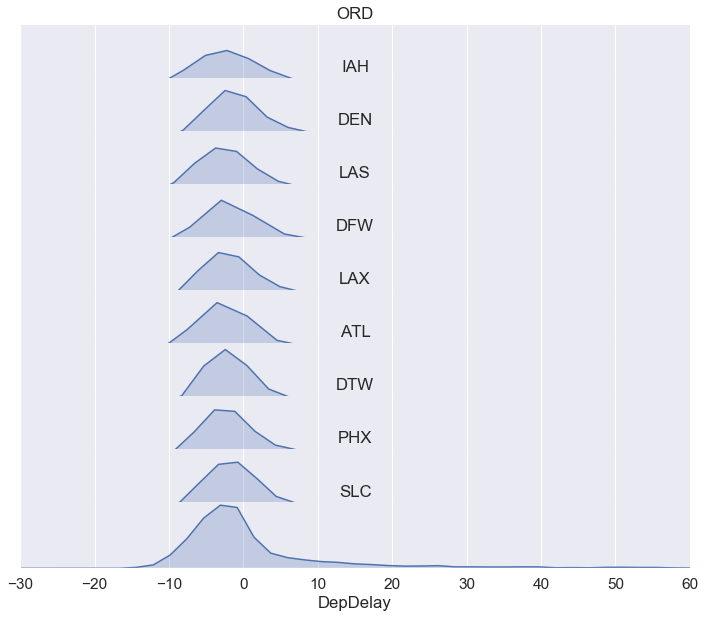

In [168]:
group_means = flights_samp_reduced.groupby(['Origin']).mean()
group_order = group_means.sort_values(['ArrDelay'], ascending = False).index

#sb.set(font_scale=1.4)    # default is 1.0
# adjust the spacing of subplots with gridspec_kws
g = sb.FacetGrid(data = flights_samp_reduced, row = 'Origin', size = 1, aspect = 12,
                 gridspec_kws = {'hspace' : -0.2})

#g = sb.FacetGrid(data = flights_samp_reduced, row = 'Origin', size = 1, aspect = 12,
#                 row_order = group_order, gridspec_kws = {'hspace' : 1.5})
g.map(sb.kdeplot, 'DepDelay', shade = True)

# remove the y-axes
g.set(yticks=[])
g.set(xlim=[-30,60])
#g.despine(left=True)

g.set_titles('{row_name}')

**Create a Clustered Bar Chart to better assess the nature of each distribution**

In [ ]:
cat1_order = ['East', 'South', 'West', 'North']
cat2_order = ['Type X', 'Type Y', 'Type Z', 'Type O']

plt.figure(figsize = [12, 5])

# left plot: clustered bar chart, absolute counts
plt.subplot(1, 2, 1)
sb.countplot(data = df, x = 'cat_var1', hue = 'cat_var2',
             order = cat1_order, hue_order = cat2_order)
plt.legend()

**Create some Stacked Bar Plots to better assess the nature of each distribution**

In [ ]:
cat1_order = ['East', 'South', 'West', 'North']
cat2_order = ['Type X', 'Type Y', 'Type Z', 'Type O']

artists = [] # for storing references to plot elements
baselines = np.zeros(len(cat1_order))
cat1_counts = df['cat_var1'].value_counts()

# for each second-variable category:
for i in range(len(cat2_order)):
    # isolate the counts of the first category,
    cat2 = cat2_order[i]
    inner_counts = df[df['cat_var2'] == cat2]['cat_var1'].value_counts()
    inner_props = inner_counts / cat1_counts
    # then plot those counts on top of the accumulated baseline
    bars = plt.bar(x = np.arange(len(cat1_order)),
                   height = inner_props[cat1_order],
                   bottom = baselines)
    artists.append(bars)
    baselines += inner_props[cat1_order]

plt.xticks(np.arange(len(cat1_order)), cat1_order)
plt.legend(reversed(artists), reversed(cat2_order), framealpha = 1,
           bbox_to_anchor = (1, 0.5), loc = 6);

In [ ]:
group_means = df.groupby(['many_cat_var']).mean()
group_order = group_means.sort_values(['num_var'], ascending = False).index

# adjust the spacing of subplots with gridspec_kws
g = sb.FacetGrid(data = df, row = 'many_cat_var', size = 0.5, aspect = 12,
                 row_order = group_order, gridspec_kws = {'hspace' : -0.2})
g.map(sb.kdeplot, 'num_var', shade = True)

# remove the y-axes
g.set(yticks=[])
g.despine(left=True)

g.set_titles('{row_name}')

/anaconda3/envs/test_env_v03/lib/python3.7/site-packages/seaborn/axisgrid.py:1241: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


<Figure size 1080x720 with 0 Axes>

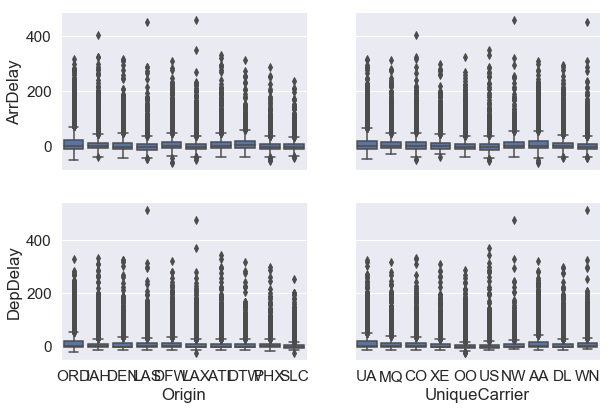

In [124]:
# plot matrix of numeric features against categorical features.
# can use a larger sample since there are fewer plots and they're simpler in nature.

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    sb.boxplot(x, y, color = default_color)

plt.figure(figsize = [15, 10])
g = sb.PairGrid(data = flights_samp_reduced, y_vars = ['ArrDelay', 'DepDelay'], x_vars = categoric_vars,
                size = 3, aspect = 1.5)

sb.boxplot(x, y, color = default_color)

g.map(boxgrid)
plt.show();

In [91]:
#flights_samp.groupby('Origin').Origin.count()

#flights_samp.groupby('Origin').Origin.count().sort_values(ascending=False)[0:10]

#top10 = flights_samp.groupby('Origin').Origin.count().sort_values(ascending=False)[0:10].tolist()

#tweet_ids_images = df_images['tweet_id'].tolist()
#df_master = df_master[df_master.tweet_id.isin(tweet_ids_to_keep)]


#flights_samp_agg = flights_samp.groupby(['Origin','source']).agg({'count':sum})
#df_agg = df.groupby(['job','source']).agg({'count':sum})

#flights_samp.groupby('Origin').Origin.sort_values('mygroups', ascending=False)
#grouped.sort_values('mygroups', ascending=False)

list

In [91]:
flights_samp.CarrierDelay.count()
#flights_samp.count()
#flights_samp.groupby('CarrierDelay').CarrierDelay.count()

21762

In [90]:
df_twoVars = filter_zeros(flights_samp, 'ArrDelay', 'CarrierDelay')  # return 2 var df, filtered vars[j]>0

In [92]:
df_twoVars.count()

ArrDelay        42431
CarrierDelay    21762
dtype: int64

In [112]:
flights_samp.groupby('CarrierDelay').CarrierDelay.count()

CarrierDelay
0.0       12067
1.0         316
2.0         273
3.0         301
4.0         290
5.0         264
6.0         324
7.0         352
8.0         285
9.0         272
10.0        262
11.0        198
12.0        223
13.0        203
14.0        195
15.0        261
16.0        232
17.0        234
18.0        194
19.0        202
20.0        199
21.0        172
22.0        171
23.0        155
24.0        136
25.0        123
26.0        137
27.0        142
28.0        131
29.0        119
          ...  
417.0         1
428.0         1
437.0         1
438.0         1
442.0         1
451.0         1
452.0         1
453.0         1
455.0         1
461.0         1
465.0         1
468.0         1
475.0         1
480.0         1
499.0         1
514.0         1
524.0         1
526.0         1
540.0         3
543.0         1
585.0         1
597.0         1
634.0         1
738.0         1
777.0         1
782.0         1
956.0         1
963.0         1
970.0         1
1126.0        1
Name: Carri

In [85]:
#flights_samp.groupby('CarrierDelay').CarrierDelay.count()
#CarrierDelay

#train = pd.read_csv("train.csv")
null_columns=flights_samp.columns[flights_samp.isnull().any()]
flights_samp[null_columns].isnull().sum()

DepTime               1915
ArrTime               2115
TailNum               1156
ActualElapsedTime     2163
CRSElapsedTime           5
AirTime               2163
ArrDelay              2163
DepDelay              1915
TaxiIn                2115
TaxiOut               1926
CancellationCode     98067
CarrierDelay         78238
WeatherDelay         78238
NASDelay             78238
SecurityDelay        78238
LateAircraftDelay    78238
dtype: int64

# ------------ SKIP ------------

**Notional Code to create some violin plots**

In [115]:
flights_samp.dtypes

Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum               object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance               int64
TaxiIn               float64
TaxiOut              float64
Cancelled              int64
CancellationCode      object
Diverted               int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtype: object

In [ ]:
numeric_vars = ['ArrDelay', 'DepDelay', 'CarrierDelay', 'table', 'x', 'y', 'z']
categoric_vars = ['Origin', 'Dest', 'UniqueCarrier']

varsCorr = ['ArrDelay', 'DepDelay', 'CarrierDelay', 'WeatherDelay', 'NASDelay',
             'LateAircraftDelay', 'TaxiIn', 'TaxiOut']
varsFilt = ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'LateAircraftDelay']

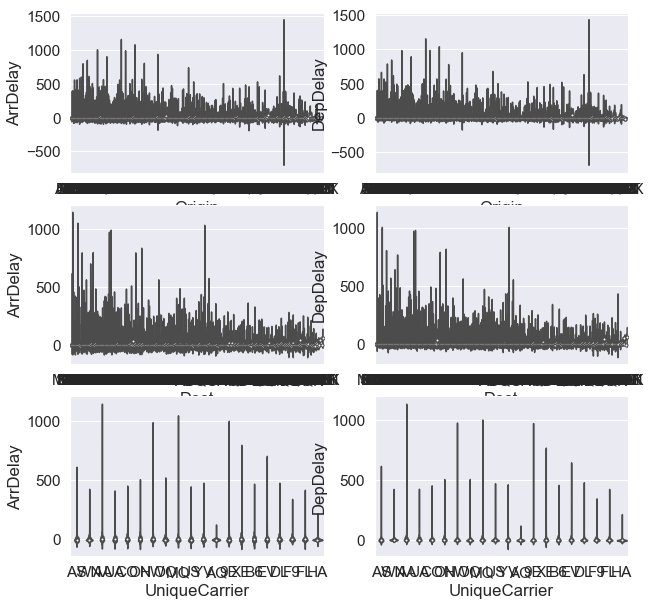

In [118]:
default_color = sb.color_palette()[0]

# plot the categorical variables against price and carat again, this time
# with full data and variable transforms
fig, ax = plt.subplots(ncols = 2, nrows = 3 , figsize = [10,10])

categoric_vars = ['Origin', 'Dest', 'UniqueCarrier']

for i in range(len(categoric_vars)):
    var = categoric_vars[i]
    sb.violinplot(data = flights_samp, x = var, y = 'ArrDelay', ax = ax[i,0], color = default_color)
    #ax[i,0].set_yticks(log_trans(np.array([500, 1e3, 2e3, 5e3, 1e4, 2e4])))
    #ax[i,0].set_yticklabels([500, '1k', '2k', '5k', '10k', '20k'])
    
    # second column of plots (example .ipynb analysis has different y-axis transformations for column 0 and column 1)
    sb.violinplot(data = flights_samp, x = var, y = 'DepDelay', ax = ax[i,1], color = default_color)
    #ax[i,1].set_yticks(cuberoot_trans(np.array(carat_ticks)))
    #ax[i,1].set_yticklabels(carat_ticks)
    #ax[i,1].set_ylim(cuberoot_trans(np.array([0.1, 3.5])))

plt.show()

In [ ]:
# # correlation plot, but with a different cmap
# plt.figure(figsize = [10, 5])
# cmap = sb.cubehelix_palette(start=4.5, light=1.6, as_cmap=True, reverse=False)
# sb.heatmap(flights_varsCorr, annot = True, fmt = '.3f',
#            cmap = cmap, center = 0, xticklabels=varsCorr_nonZero)
# plt.xticks(rotation=60)
# plt.show()


# # correlation plot, but with a different cmap
# plt.figure(figsize = [10, 5])
# cmap = sb.cubehelix_palette(start=4.5, light=1.6, as_cmap=True, reverse=False)
# cbarlabel="Correlation"
# sb.heatmap(flights_varsCorr, annot = True, fmt = '.3f',
#            cmap = 'YlGn', center = 0, xticklabels=varsCorr_nonZero, 
#            cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom"))
# plt.xticks(rotation=60)
# plt.show()

#sns.set(font_scale=3)

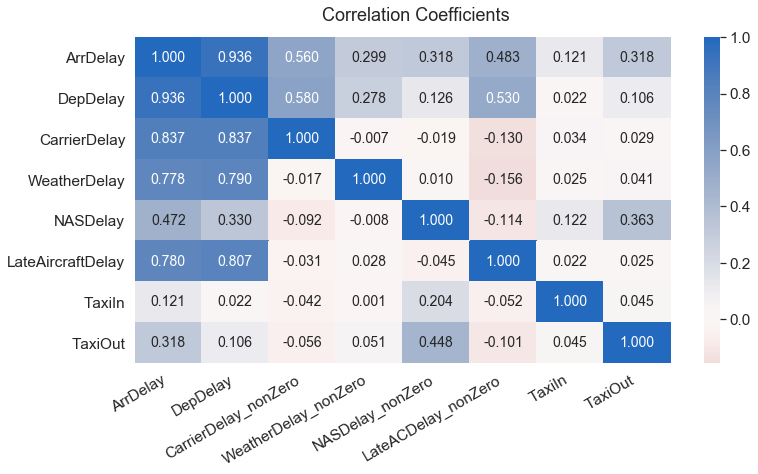

In [229]:
varsCorr_nonZero = ['ArrDelay', 'DepDelay', 'CarrierDelay_nonZero', 'WeatherDelay_nonZero', 'NASDelay_nonZero',
             'LateACDelay_nonZero', 'TaxiIn', 'TaxiOut']

# convert from string to float
for i in range(len(varsCorr)):
    flights_varsCorr[varsCorr[i]] = flights_varsCorr[varsCorr[i]].astype(float)

sb.set(font_scale=1.4)

# correlation plot
plt.figure(figsize = [12, 6])
# sb.heatmap(flights_varsCorr, annot = True, fmt = '.3f', annot_kws={"size": 14},
#            cmap = 'vlag_r', cbar_kws={'label': 'Correlation Coefficient'}, center = 0,
#            xticklabels=varsCorr_nonZero)
sb.heatmap(flights_varsCorr, annot = True, fmt = '.3f', annot_kws={"size": 14},
           cmap = 'vlag_r', center = 0,
           xticklabels=varsCorr_nonZero)
#sb.heatmap(flights_varsCorr, annot = True, fmt = '.3f', annot_kws={"size": 12},
#           cmap = 'vlag_r', cbar_kws={'label': 'Corr Coeff.'}, center = 0,
#           xticklabels=varsCorr_nonZero)
plt.xticks(rotation=30, ha='right')
#plt.xticks(rotation=30, ha='right', fontsize=12)
#plt.yticks(fontsize=12)

#plt.figure.cbar.set_label('Activation',size=18)
#plt.cbar(labelsize=20)
#colorbar.tick_params(labelsize=20)

title_string=('Correlation Coefficients')
plt.suptitle(title_string, x=0.45, y=0.95, fontsize=18)
plt.show()

AttributeError: 'function' object has no attribute 'set_label'

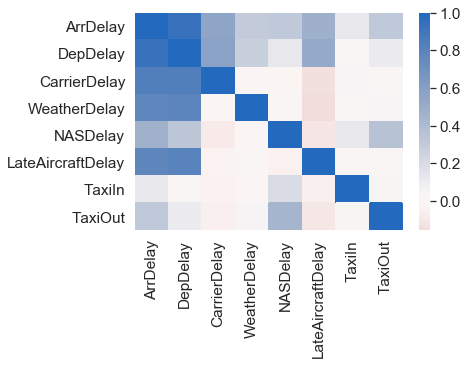

In [228]:
fig = plt.figure()
#ax = fig.add_subplot(111)
ax = sb.heatmap(flights_varsCorr, cmap='vlag_r', center=0)
# x = np.arange(10,3000,100)
# y = np.arange(10,3000,100)
# X,Y = np.meshgrid(x,y)
# Z = np.random.random(X.shape)*8000000
# surf = ax.contourf(X,Y,Z, 8, cmap=plt.cm.jet)
#ax.set_ylabel('Log Frequency (Hz)')
#ax.set_xlabel('Log Frequency (Hz)')
ax.xticklabels=varsCorr_nonZero

#ax.set_xscale('log')
#ax.set_yscale('log')
#ax.xaxis.set_minor_formatter(plt.FormatStrFormatter('%d'))


# # defining custom minor tick locations:
# ax.xaxis.set_minor_locator(plt.FixedLocator([50,500,2000]))
# ax.yaxis.set_ticks_position('left')
# ax.xaxis.set_ticks_position('bottom')
# ax.tick_params(axis='both',reset=False,which='both',length=8,width=2)
#cbar = fig.colorbar(surf, shrink=0.5, aspect=20, fraction=.12,pad=.02)
cbar = fig.colorbar
cbar.set_label('Corr Coeff.',size=18)

# access to cbar tick labels:
cbar.ax.tick_params(fontsize=15) 
plt.show()

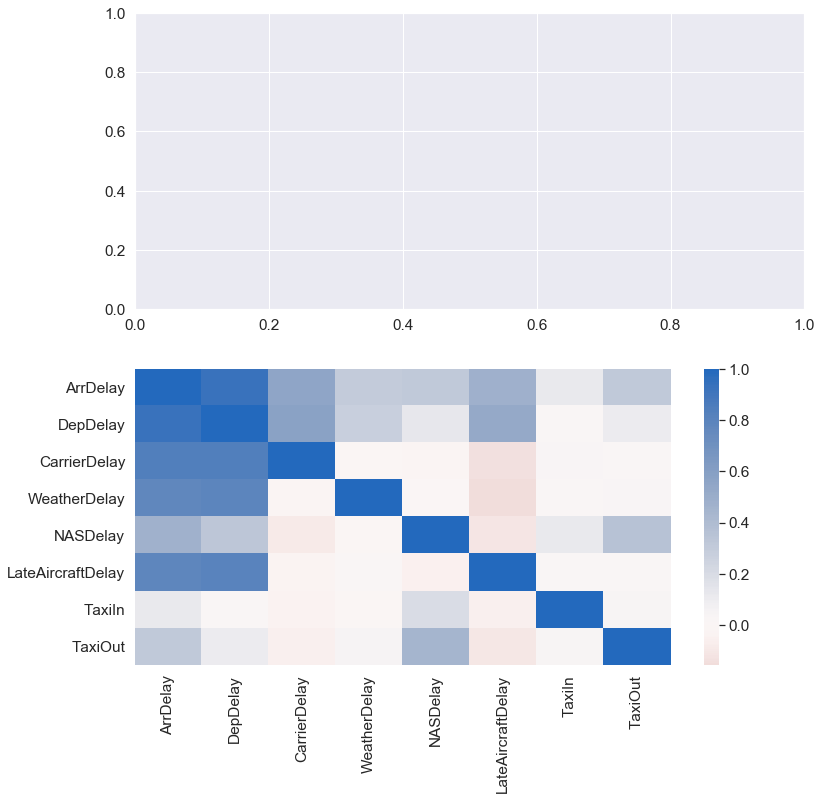

In [226]:
# correlation plot
numPlots = 2
fig, axarr = plt.subplots(nrows=2, ncols=1, figsize = [12, numPlots * 6], squeeze=False)

#cmap = sns.diverging_palette(220, 20, sep=20, as_cmap=True)

axarr[0,0] = sb.heatmap(flights_varsCorr, cmap='vlag_r', center=0)

# axarr[0,0] = sb.heatmap(flights_varsCorr, cmap='vlag_r', center=0)

# use matplotlib.colorbar.Colorbar object
#cbar = ax[0].collections[0].colorbar

# here set the labelsize by 20
#cbar.ax.tick_params(labelsize=20)

# ax[1] = sb.heatmap(flights_varsCorr, annot = True, fmt = '.3f', annot_kws={"size": 12},
#            cmap = 'vlag_r', cbar_kws={'label': 'Corr Coeff.'}, center = 0,
#            xticklabels=varsCorr_nonZero)

#ax[1].xticklabels=varsCorr_nonZero
# plt.xticks(rotation=30, ha='right', fontsize=12)
# plt.yticks(fontsize=12)
# 
# #plt.figure.cbar.set_label('Activation',size=18)
# #plt.cbar(labelsize=20)
# #colorbar.tick_params(labelsize=20)
# 
# title_string=('Correlation Coefficients')
# plt.suptitle(title_string, x=0.45, y=0.95, fontsize=17)
plt.show()

In [80]:
flights_samp[varsCorr].corr()

ArrDelay  DepDelay  CarrierDelay  WeatherDelay  NASDelay  \
ArrDelay           1.000000  0.923588      0.485714      0.250332  0.368150   
DepDelay           0.923588  1.000000      0.501897      0.230182  0.151968   
CarrierDelay       0.485714  0.501897      1.000000     -0.058913 -0.145180   
WeatherDelay       0.250332  0.230182     -0.058913      1.000000 -0.012492   
NASDelay           0.368150  0.151968     -0.145180     -0.012492  1.000000   
LateAircraftDelay  0.528592  0.580850     -0.132190     -0.035313 -0.138669   
TaxiIn             0.130806  0.029576     -0.051379      0.010108  0.219511   
TaxiOut            0.330406  0.102744     -0.072442      0.051129  0.456506   

                   LateAircraftDelay    TaxiIn   TaxiOut  
ArrDelay                    0.528592  0.130806  0.330406  
DepDelay                    0.580850  0.029576  0.102744  
CarrierDelay               -0.132190 -0.051379 -0.072442  
WeatherDelay               -0.035313  0.010108  0.051129  
NASDelay                   -0.138669  0.219511  0.456506  
LateAircraftDelay           1.000000 -0.036274 -0.104087  
TaxiIn                     -0.036274  1.000000  0.037284  
TaxiOut                    -0.104087  0.037284  1.000000

In [81]:
#flights_varsCorr.info()
for i in range(len(varsCorr)):
    flights_varsCorr[varsCorr[i]] = flights_varsCorr[varsCorr[i]].astype(float)

flights_varsCorr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, ArrDelay to TaxiOut
Data columns (total 8 columns):
ArrDelay             8 non-null float64
DepDelay             8 non-null float64
CarrierDelay         8 non-null float64
WeatherDelay         8 non-null float64
NASDelay             8 non-null float64
LateAircraftDelay    8 non-null float64
TaxiIn               8 non-null float64
TaxiOut              8 non-null float64
dtypes: float64(8)
memory usage: 896.0+ bytes


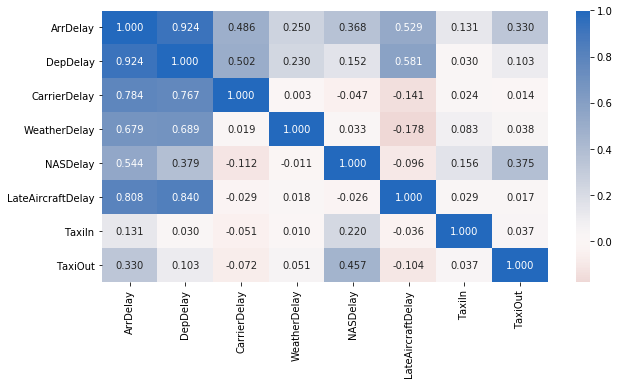

In [82]:
# correlation plot
plt.figure(figsize = [10, 5])
sb.heatmap(flights_varsCorr, annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

#plt.figure(figsize = [16, 10])
#sb.heatmap(flights_samp[vars].corr(), annot = True, fmt = '.3f',
#           cmap = 'vlag_r', center = 0)

In [66]:
#flights_varsCorr = pd.DataFrame()
#flights_varsCorr.set_index(varsCorr)
#flights_varsCorr = pd.DataFrame()
#flights_varsCorr = pd.DataFrame(index=varsCorr)
flights_varsCorr = pd.DataFrame(index=varsCorr, columns=varsCorr)

#flights_varsCorr.set_index(var: varsCorr)

#flights_varsCorr.columns = varsCorr
#flights_varsCorr2 = flights_varsCorr.set_axis(varsCorr, axis=1, inplace=False)
#flights_varsCorr2

#flights_varsCorr.columns = ['make', 'buy']
#flights_varsCorr.columns
#flights_varsCorr

#flights_varsCorr.loc[varsCorr[i]][varsCorr[j]] = current_corr
flights_varsCorr

ArrDelay  DepDelay  CarrierDelay  WeatherDelay  NASDelay  \
ArrDelay                  0         0             0             0         0   
DepDelay                  0         0             0             0         0   
CarrierDelay              0         0             0             0         0   
WeatherDelay              0         0             0             0         0   
NASDelay                  0         0             0             0         0   
LateAircraftDelay         0         0             0             0         0   
TaxiIn                    0         0             0             0         0   
TaxiOut                   0         0             0             0         0   

                   LateAircraftDelay  TaxiIn  TaxiOut  
ArrDelay                           0       0        0  
DepDelay                           0       0        0  
CarrierDelay                       0       0        0  
WeatherDelay                       0       0        0  
NASDelay                           0       0        0  
LateAircraftDelay                  0       0        0  
TaxiIn                             0       0        0  
TaxiOut                            0       0        0

In [57]:
flights_varsCorr = pd.DataFrame(index=varsCorr, columns=varsCorr)

for i in range(len(varsCorr)):
    
    # print statements for debugging
    print('\'' + varsCorr[i] + '\': ' + str(flights_samp[varsCorr[i]].count()) + ' rows')
    
    for j in range(len(varsCorr)):
        
        # one
        if varsCorr[i] == varsCorr[j]:
            current_corr = 1
            
            # print('   corr,shape w/ ' + varsCorr[j] + ': ' + str(current_corr) + 
            #       ', i_count:' + str(flights_samp[varsCorr[i]].count()) + 
            #       ', j_count:' + str(flights_samp[varsCorr[j]].count()))
        
        # filt one (if j is in varsFilt)
        elif varsCorr[i] in varsFilt:
            df_twoVars = filter_zeros(flights_samp, varsCorr[i], varsCorr[j])  # return 2 var df, filtered vars[j]>0
            current_corr = df_twoVars[varsCorr[i]].corr(df_twoVars[varsCorr[j]])
            
            # print('   corr,shape w/ ' + varsCorr[j] + ': ' + str(current_corr) + 
            #       ', i_count:' + str(df_twoVars[varsCorr[i]].count()) + 
            #       ', j_count:' + str(df_twoVars[varsCorr[j]].count()))
        
        # base case, reg (if nothing else is true):
        else:
            # -----> make sure to check for NANs
            current_corr = flights_samp[varsCorr[i]].corr(flights_samp[varsCorr[j]])
        
            print('   corr,shape w/ ' + varsCorr[j] + ': ' + str(current_corr) + 
                  ', i_count:' + str(flights_samp[varsCorr[i]].count()) + 
                  ', j_count:' + str(flights_samp[varsCorr[j]].count()))
        #flights_varsCorr['temp'] = current_corr
        #flights_varsCorr[varsCorr[i]] = current_corr
        #flights_varsCorr.loc[varsCorr[i]].varsCorr[j] = current_corr
        flights_varsCorr.loc[varsCorr[i]][varsCorr[j]] = current_corr

flights_varsCorr

'ArrDelay': 97834 rows
   corr,shape w/ DepDelay: 0.9291945183609114, i_count:97834, j_count:98097
   corr,shape w/ CarrierDelay: 0.4810471702456005, i_count:97834, j_count:21786
   corr,shape w/ WeatherDelay: 0.2919570150848137, i_count:97834, j_count:21786
   corr,shape w/ NASDelay: 0.35711545168944564, i_count:97834, j_count:21786
   corr,shape w/ LateAircraftDelay: 0.5192080849934095, i_count:97834, j_count:21786
   corr,shape w/ TaxiIn: 0.1296934831686694, i_count:97834, j_count:97875
   corr,shape w/ TaxiOut: 0.32239155971906946, i_count:97834, j_count:98083
'DepDelay': 98097 rows
   corr,shape w/ ArrDelay: 0.9291945183609113, i_count:98097, j_count:97834
   corr,shape w/ CarrierDelay: 0.5163986928647746, i_count:98097, j_count:21786
   corr,shape w/ WeatherDelay: 0.27216691235355306, i_count:98097, j_count:21786
   corr,shape w/ NASDelay: 0.14416552928828646, i_count:98097, j_count:21786
   corr,shape w/ LateAircraftDelay: 0.5668309075079729, i_count:98097, j_count:21786
   corr

ArrDelay   DepDelay CarrierDelay WeatherDelay    NASDelay  \
ArrDelay                  1   0.929195     0.481047     0.291957    0.357115   
DepDelay           0.929195          1     0.516399     0.272167    0.144166   
CarrierDelay       0.795447   0.801895            1  -0.00281871  -0.0457865   
WeatherDelay       0.748492   0.756373    -0.035934            1 -0.00316275   
NASDelay           0.536964   0.372332    -0.110603   -0.0112095           1   
LateAircraftDelay  0.807876   0.840139   -0.0328464 -0.000153418  -0.0514934   
TaxiIn             0.129693  0.0284781   -0.0517256    0.0042105    0.207077   
TaxiOut            0.322392  0.0953797   -0.0695949    0.0450278    0.458492   

                  LateAircraftDelay     TaxiIn     TaxiOut  
ArrDelay                   0.519208   0.129693    0.322392  
DepDelay                   0.566831  0.0284781   0.0953797  
CarrierDelay              -0.140385  0.0262775   0.0204154  
WeatherDelay              -0.174297  0.0245301   0.0345578  
NASDelay                  -0.113718    0.14015    0.379702  
LateAircraftDelay                 1  0.0347259 -0.00714101  
TaxiIn                    -0.028854          1   0.0401128  
TaxiOut                   -0.111811  0.0401128           1

In [ ]:
for i in range(len(varsCorr)):
    for j in range(len(varsCorr)):
        
        # if variable is in varsFilt:
            # create a dataframe with the two appropriate columns
            # calculate corr coefficient between the two columns
            
        # else:
            # corr coefficient 
        if varsCorr[i] in varsFilt:        
            # return a two variable dataframe that is filtered by (first val > 0)
            df_twoVars = filter_zeros(flights_samp, varsCorr[i], varsCorr[j])
            
        else:
            df_twoVars = flights_samp[[varsCorr[i], varsCorr[j]]]
        
        # determine correlation coefficient based on filtered dataframe
        current_corr = df_twoVars[varsCorr[i]].corr(df_twoVars[varsCorr[j]])
        flights_varsCorr.loc[varsFilt[i]].varCorr[j] = current_corr
            
            # calculate correlation coefficient between the two vars
            if varsCorr[i] == varsCorr[j]:
                current_corr = 1
            elif :
            #    varsCorr
            else:
                # determine correlation coefficient based on filtered dataframe
                current_corr = df_twoVars[varsCorr[i]].corr(df_twoVars[varsCorr[j]])
                flights_varsCorr.loc[varsFilt[i]].varCorr[j] = current_corr
            
            # print statements for debugging
            print('\'' + varsCorr[i] + '\' has ' + str(df_twoVars.shape[0]) + ' rows.' +
                  ' Corr with ' + varsCorr[j] + ': ' + str(current_corr))
    else:
        # print statements for debugging
        print('\'' + varsCorr[i] + '\' has ' + str(df_twoVars.shape[0]) + ' rows')
        
        # iterate through varsCorr
        for j in range(len(varsCorr)):
            # calculate correlation coefficient between the two vars
            if varsCorr[i] == varsCorr[j]:
                current_corr = 1
            else:
                # determine correlation coefficient based on filtered dataframe
                current_corr = df_twoVars[varsCorr[i]].corr(df_twoVars[varsCorr[j]])
                flights_varsCorr.loc[varsFilt[i]].varCorr[j] = current_corr

In [ ]:
for i in range(len(varsCorr)):

    if varsCorr[i] in varsFilt:        
        for j in range(len(varsCorr)):
            # return a two variable dataframe that is filtered by (first val > 0)
            flights_sampFilt = filter_zeros(flights_samp, varsCorr[i], varsCorr[j])
            
            # calculate correlation coefficient between the two vars
            if varsCorr[i] == varsCorr[j]:
                current_corr = 1
            elif :
            #    varsCorr
            else:
                # determine correlation coefficient based on filtered dataframe
                current_corr = flights_sampFilt[varsCorr[i]].corr(flights_sampFilt[varsCorr[j]])
                flights_varsCorr.loc[varsFilt[i]].varCorr[j] = current_corr
            
            # print statements for debugging
            print('\'' + varsCorr[i] + '\' has ' + str(flights_sampFilt.shape[0]) + ' rows.' +
                  ' Corr with ' + varsCorr[j] + ': ' + str(current_corr))
    else:
        # print statements for debugging
        print('\'' + varsCorr[i] + '\' has ' + str(flights_samp.shape[0]) + ' rows')
        
        # iterate through varsCorr
        for j in range(len(varsCorr)):
            # calculate correlation coefficient between the two vars
            if varsCorr[i] == varsCorr[j]:
                current_corr = 1
            else:
                # determine correlation coefficient based on filtered dataframe
                current_corr = flights_sampFilt[varsCorr[i]].corr(flights_sampFilt[varsCorr[j]])
                flights_varsCorr.loc[varsFilt[i]].varCorr[j] = current_corr

In [ ]:
for i in range(len(varsCorr)):

    if varsCorr[i] in varsFilt:        
        for j in range(len(varsCorr)):
            # return a two variable dataframe that is filtered by (first val > 0)
            flights_sampFilt = filter_zeros(flights_samp, varsCorr[i], varsCorr[j])
            
            # calculate correlation coefficient between the two vars
            if varsCorr[i] == varsCorr[j]:
                current_corr = 1
            elif :
            #    varsCorr
            else:
                current_corr = flights_sampFilt[varsCorr[i]].corr(flights_sampFilt[varsCorr[j]])
            
            # print statements for debugging
            print('\'' + varsCorr[i] + '\' has ' + str(flights_sampFilt.shape[0]) + ' rows.' +
                  ' Corr with ' + varsCorr[j] + ': ' + str(current_corr))
            
            #print(varsCorr[j] + ': ' + str(current_corr))
            # print(varsCorr[j] + ', ')
        
        # determine the correlation coefficient based on the filtered dataframe
        # for j in range(len(varsCorr)):
            # flights_varsCorr.loc[varsFilt[i]].varCorr[i] = flights_sampFilt[varsFilt[i]].corr(df_filtered[varsCorr[i]])
    else:
        # print statements for debugging
        print('\'' + varsCorr[i] + '\' has ' + str(flights_samp.shape[0]) + ' rows')
        
        # flights_varsCorr.loc[varsFilt[i]].varsCorr[i] = flights_sampFilt[varsFilt[i]].corr(df_filtered[varsCorr[i]])

In [ ]:
for i in range(len(varsCorr)):

    if varsCorr[i] in varsFilt:
        # filter the dataframe by only those rows that have varsFilt[i] > 0
        mask = flights_samp[varsCorr[i]] > 0
        flights_sampFilt = flights_samp[mask]
        
        # print statements for debugging
        print('\'' + varsCorr[i] + '\' has ' + str(flights_sampFilt.shape[0]) + ' rows_in_flights_sampFilt: ')
        for j in range(len(varsCorr)):
            current_corr = flights_sampFilt[varsCorr[i]].corr(flights_sampFilt[varsCorr[j]])
            print(varsCorr[j] + ': ' + str(current_corr))
            # print(varsCorr[j] + ', ')
        
        # determine the correlation coefficient based on the filtered dataframe
        for j in range(len(varsCorr)):
            # flights_varsCorr.loc[varsFilt[i]].varCorr[i] = flights_sampFilt[varsFilt[i]].corr(df_filtered[varsCorr[i]])
    else:
        # print statements for debugging
        print('\'' + varsCorr[i] + '\' has ' + str(flights_samp.shape[0]) + ' rows')
        
        # flights_varsCorr.loc[varsFilt[i]].varsCorr[i] = flights_sampFilt[varsFilt[i]].corr(df_filtered[varsCorr[i]])

In [ ]:
for i in range(len(varsCorr)):

    if varsCorr[i] in varsFilt:
        # filter the dataframe by only those rows that have varsFilt[i] > 0
        mask = flights_samp[varsCorr[i]] > 0
        flights_sampFilt = flights_samp[mask]
        
        # print statements for debugging
        print('\'' + varsCorr[i] + '\' has ' + str(flights_sampFilt.shape[0]) + ' rows_in_flights_sampFilt: ')
        # for j in range(len(varsCorr)):
        #     print(varsCorr[j] + ', ')
        
        # determine the correlation coefficient based on the filtered dataframe
        for j in range(len(varsCorr)):
            current_corr = flights_sampFilt[varsCorr[i]].corr(flights_sampFilt[varsCorr[j]])
            print(varsCorr[j] + ': ' + str(current_corr))
            # flights_varsCorr.loc[varsFilt[i]].varCorr[i] = flights_sampFilt[varsFilt[i]].corr(df_filtered[varsCorr[i]])
    else:
        # print statements for debugging
        print('\'' + varsCorr[i] + '\' has ' + str(flights_samp.shape[0]) + ' rows')
        
        # flights_varsCorr.loc[varsFilt[i]].varsCorr[i] = flights_sampFilt[varsFilt[i]].corr(df_filtered[varsCorr[i]])

* Custom variables:
  * Difference between ('ArrDelay' on a given day) and  ('ArrDelay' yearly min)
    * plotted for a given airline
    * plotted for a given airport
  * A given airport's relative increase or decrease in arrival delay
    * need to come up with the mean for a given day
    * then plot that mean over the course of the year
  * The effect of 'NASDelay', 'CarrierDelay' on ('ArrDelay', 'DepDelay') for:
    * a given airline
    * a given airport
  * The number of flights at a given airport

In [ ]:
# vars = ['CarrierDelay']
# numPlots = 3;
# for i in range(len(vars)):
#     var = vars[i]
#     min_values = [0, 1, 1]
#     max_values = [150, 150, 150]
#     binsizes = [2, 2, 1]
#     plot_histograms_stdAxis(flights, var, 'Delay (min)', numPlots, min_values, max_values, binsizes)

<a id='bivariate_exploration_scatterPlots'></a>
([Top of Page](#top_of_page))
### Scatter Plots

In [ ]:
#choose vars to explore
vars_numeric = ['ArrDelay', 'DepDelay', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'LateAircraftDelay',
                'TaxiIn', 'TaxiOut']

start = time.time()

# sample a subset of the flights so that plots are clearer and render faster
samples = np.random.choice(flights_all.shape[0], 100000, replace = False)
flights_samp = flights_all.loc[samples,:]
#samples = np.random.choice(flights.shape[0], 50000, replace = False)
#flights_samp = flights.loc[samples,:]

# plot matrix
g = sb.PairGrid(data = flights_samp, vars = vars_numeric)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter, alpha = 0.008);

end = time.time()
currTime = str(time.localtime().tm_hour) + ':' + str(time.localtime().tm_min) + ':' + str(time.localtime().tm_sec)
print('time elapsed: ' + str(end - start) + ', current time: ' + currTime)

In [ ]:
vars_numeric = ['ArrDelay', 'DepDelay', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay',
                'LateAircraftDelay', 'DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime', 'ActualElapsedTime',
                'CRSElapsedTime', 'AirTime', 'Distance', 'TaxiIn', 'TaxiOut']

vars_numeric_temp = ['ArrDelay', 'DepDelay', 'DepTime', 'ArrTime', 'CRSElapsedTime', 'AirTime', 'Distance',
                     'TaxiIn', 'TaxiOut']

vars_categ = ['UniqueCarrier', 'Origin', 'Dest', 'CancellationCode']

start = time.time()

# plot matrix
# sample a subset of the flights so that plots are clearer and render faster
samples = np.random.choice(flights_all.shape[0], 100000, replace = False)
flights_samp = flights_all.loc[samples,:]
#samples = np.random.choice(flights.shape[0], 50000, replace = False)
#flights_samp = flights.loc[samples,:]

g = sb.PairGrid(data = flights_samp, vars = vars_numeric_temp)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter, alpha = 0.008);

end = time.time()
currTime = str(time.localtime().tm_hour) + ':' + str(time.localtime().tm_min) + ':' + str(time.localtime().tm_sec)
print('time elapsed: ' + str(end - start) + ', current time: ' + currTime)

<a id='bivariate_exploration_summary'></a>
([Top of Page](#top_of_page))
## Bivariate Exploration - Summary

<a id='bivariate_exploration_relationships_observed'></a>
([Top of Page](#top_of_page))
### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

<a id='bivariate_exploration_relationships_observed_unexpected'></a>
([Top of Page](#top_of_page))
### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

<a id='multivariate_exploration'></a>
([Top of Page](#top_of_page))
## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

<a id='multivariate_exploration_relationships_observed'></a>
([Top of Page](#top_of_page))
### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

<a id='multivariate_exploration_relationships_observed_interesting_interactions'></a>
([Top of Page](#top_of_page))
### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

<a id='references_and_dead_ends'></a>
([Top of Page](#top_of_page))
# Miscellaneous References and Exploration Dead Ends

<a id='references'></a>
([Top of Page](#top_of_page))
## References
Some of these references were used as code templates and some served as style guides. The remaining references were not used, but have copied below because they seemed interesting and applicable to the analsysis done herein.

* Here is a reference for [setting matplotlib title properties](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.set_title.html)

* Reference [for adding text to matplotlib plots](https://matplotlib.org/3.1.1/tutorials/text/text_intro.html)

* Reference for [adding a figure title and subplot titles](https://matplotlib.org/3.1.1/gallery/subplots_axes_and_figures/figure_title.html)

* [Types of charts](https://about.infogr.am/wp-content/uploads/2016/01/types-of-charts.jpg) - graphic scheme

* A compilation of the ["Top 50 most useful" matplotlib plots in data analysis and visualization](https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/)

* [Python Graph Gallery](https://python-graph-gallery.com), a site with hundreds of different chart types (and code samples) that can be created using Python
  * Python graph gallery - [list of possible seaborn plots](https://python-graph-gallery.com/category/seaborn/)
  * Python graph gallery - [list of possible matplotlib plots](https://python-graph-gallery.com/category/matplotlib/)
  
* List of [Seaborn color palettes](https://chrisalbon.com/python/data_visualization/seaborn_color_palettes/)

* Matplotlib [documentation on chooosing colormaps](https://matplotlib.org/users/colormaps.html)
  * Blog post on choosing the wrong color map: ["How Bad Is Your Colormap?"](https://jakevdp.github.io/blog/2014/10/16/how-bad-is-your-colormap/)
  * Blog post articulating ["How The Rainbow Color Map Misleads"](https://eagereyes.org/basics/rainbow-color-map)
  * [ColorBrewer](http://colorbrewer2.org/#type=sequential&scheme=Greys&n=3), a color map selection and advice tool

* Seaborn [heatmap documentation](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

* Single Page ["cheat sheet" for plotting with Seaborn](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Seaborn_Cheat_Sheet.pdf)

* StackOverflow page describing [how to fix irregular spacing of xticklabels that have been rotated](https://stackoverflow.com/questions/21477465/matplotlib-python-barplot-position-of-xtick-labels-have-irregular-spaces-betwee)

* Matplotlib - [colorbar documentation](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.colorbar.html)

* Matplotlib documentation: [some annotated heatmap examples](https://matplotlib.org/3.1.1/gallery/images_contours_and_fields/image_annotated_heatmap.html#sphx-glr-gallery-images-contours-and-fields-image-annotated-heatmap-py)

* StackOverflow page describing [how to modify colorbar properties](https://stackoverflow.com/questions/6567724/matplotlib-so-log-axis-only-has-minor-tick-mark-labels-at-specified-points-also/6568248#6568248) - references plots that are plotted using the  'Fig, ax' coding style

* StackOverflow example of how to [append the same string to a list of strings in Python](https://stackoverflow.com/questions/2050637/appending-the-same-string-to-a-list-of-strings-in-python):
  * <code>[s + mystring for s in mylist]</code>

* StackOverflow page on [how to convert multiple columns into one datetime column in pandas](https://stackoverflow.com/questions/19350806/how-to-convert-columns-into-one-datetime-column-in-pandas/37103131)

* Interesting StackOverflow [example of creating a calendar heatmap _without_ Pandas](https://stackoverflow.com/questions/32485907/matplotlib-and-numpy-create-a-calendar-heatmap)

* Calmap library for plotting [Calendar heatmaps from Pandas time series data](https://pythonhosted.org/calmap/)

* Pandas [documentation for DataFrame.pivot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot.html)

* StackOverflow page on [how to pivot DataFrames](https://stackoverflow.com/questions/28337117/how-to-pivot-a-dataframe-in-pandas)

* StackOverflow page - [Performing log-scale axis transformations and resizing the colorbar ticks on a mesh grid plot (simlar to a heatmap)](https://stackoverflow.com/questions/6567724/matplotlib-so-log-axis-only-has-minor-tick-mark-labels-at-specified-points-also/6568248#6568248)

* Here is a so-so example of [stacking multiple heatmaps on top of one another](https://stackoverflow.com/questions/50454360/matplotlib-how-to-remove-color-bar-but-keep-the-heatmap-position-unchanged)

* Example of a [Facetgrid with multiple scatter plots](https://cduvallet.github.io/posts/2018/11/facetgrid-ylabel-access)

* Example of how to [add a line to a second axis](https://towardsdatascience.com/a-guide-to-pandas-and-matplotlib-for-data-exploration-56fad95f951c)

* Example of [how to create a log-linear 2d histogram](https://stackoverflow.com/questions/29175093/creating-a-log-linear-plot-in-matplotlib-using-hist2d)

* [Facet Grid, example 1](https://stackoverflow.com/questions/29813694/how-to-add-a-title-to-seaborn-facet-plot)

* [Facet Grid, example 2](https://cduvallet.github.io/posts/2018/11/facetgrid-ylabel-access)

**Links as of 2019/07/21, 3:06 pm**
* Google Search: seaborn heatmap calendar day week year
* Dan Friedman - [when to use heatmaps](https://dfrieds.com/data-visualizations/when-use-heatmaps)
* StackOverflow page: [Matplotlib and Numpy - Create a calendar heatmap](https://stackoverflow.com/questions/32485907/matplotlib-and-numpy-create-a-calendar-heatmap)
* A compilation of the ["Top 50 most useful" matplotlib plots](https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/)
* Blog post / Tutorial re: [Time Series Analysis with Pandas](https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/)
* Blog post / [Time-Series Calendar Heatmaps (using R)](https://towardsdatascience.com/time-series-calendar-heatmaps-9f576578fcfe)

<a id='dead_ends'></a>
([Top of Page](#top_of_page))
## Dead Ends

<a id='dead_ends_preliminary_wrangling'></a>
([Top of Page](#top_of_page))
## Preliminary Wrangling

**Use chardet to detect encoding**

* NOTE:
  * this is currently an infinite loop
  * need to add a limit for when to stop reading lines if detector is not done

In [ ]:
# import chardet
# from chardet.universaldetector import UniversalDetector
# 
# detector = UniversalDetector()
# with open('2002.csv', 'rb') as f:
#     for line in f:
#         detector.feed(line)
#         if detector.done: break
# detector.close()
# 
# print(detector.result)

**Loading Multiple Years of Data**

Load in files that already have the default pandas encoding ('UTF-8')

In [ ]:
# approx. 200 seconds to load

# # load multiple years into pandas dataframes
# start = time.time()
# # flights_2008 = pd.read_csv('2007.csv')
# # flights_2007 = pd.read_csv('2007.csv')
# # flights_2006 = pd.read_csv('2006.csv')
# # flights_2005 = pd.read_csv('2005.csv')
# # flights_2004 = pd.read_csv('2004.csv')
# # flights_2003 = pd.read_csv('2003.csv')
# end = time.time()
# 
# currTime = str(time.localtime().tm_hour) + ':' + str(time.localtime().tm_min) + ':' + str(time.localtime().tm_sec)
# print('time elapsed: ' + str(end - start) + ', current time: ' + currTime)

**Load in files with other encodings**
* NOTE:
   * 'cp1252' may not be correct
   * 'ISO-8859-1' may actually be the proper encoding

In [ ]:
# approx. 80 seconds to load

# # load multiple years into pandas dataframes
# start = time.time()
# flights_2002 = pd.read_csv('2002.csv', encoding='cp1252')
# flights_2001 = pd.read_csv('2001.csv', encoding='cp1252')
# flights_2000 = pd.read_csv('2000.csv', encoding='cp1252')
# end = time.time()
# 
# currTime = str(time.localtime().tm_hour) + ':' + str(time.localtime().tm_min) + ':' + str(time.localtime().tm_sec)
# print('time elapsed: ' + str(end - start) + ', current time: ' + currTime)

In [ ]:
# approx. 100 seconds to load

# # load multiple years into pandas dataframes
# start = time.time()
# flights_1999 = pd.read_csv('1999.csv', encoding='cp1252')
# flights_1998 = pd.read_csv('1998.csv', encoding='cp1252')
# flights_1997 = pd.read_csv('1997.csv', encoding='cp1252')
# flights_1996 = pd.read_csv('1996.csv', encoding='cp1252')
# end = time.time()
# 
# currTime = str(time.localtime().tm_hour) + ':' + str(time.localtime().tm_min) + ':' + str(time.localtime().tm_sec)
# print('time elapsed: ' + str(end - start) + ', current time: ' + currTime)

In [ ]:
# approx. 85 seconds to load

# # load multiple years into pandas dataframes
# start = time.time()
# flights_1995 = pd.read_csv('1995.csv', encoding='cp1252')
# flights_1994 = pd.read_csv('1994.csv', encoding='cp1252')
# flights_1993 = pd.read_csv('1993.csv', encoding='cp1252')
# flights_1992 = pd.read_csv('1992.csv', encoding='cp1252')
# end = time.time()
# 
# currTime = str(time.localtime().tm_hour) + ':' + str(time.localtime().tm_min) + ':' + str(time.localtime().tm_sec)
# print('time elapsed: ' + str(end - start) + ', current time: ' + currTime)

In [ ]:
# approx. 85 seconds to load

# # load multiple years into pandas dataframes
# start = time.time()
# flights_1991 = pd.read_csv('1991.csv', encoding='cp1252')
# flights_1990 = pd.read_csv('1990.csv', encoding='cp1252')
# flights_1989 = pd.read_csv('1989.csv', encoding='cp1252')
# flights_1988 = pd.read_csv('1988.csv', encoding='cp1252')
# flights_1987 = pd.read_csv('1987.csv', encoding='cp1252')
# end = time.time()
# 
# currTime = str(time.localtime().tm_hour) + ':' + str(time.localtime().tm_min) + ':' + str(time.localtime().tm_sec)
# print('time elapsed: ' + str(end - start) + ', current time: ' + currTime)

**Preliminary Wrangling**

In [ ]:
print(flights['ArrDelay'].describe())
print('---------------------------------')
print(np.log10(flights['ArrDelay'].describe()))

<a id='dead_ends_univariate_exploration'></a>
([Top of Page](#top_of_page))
## Univariate Exploration

<a id='dead_ends_univariate_logScale_histograms'></a>
([Top of Page](#top_of_page))
### Log-Scale Histograms

Multi-histogram template for when there's a long tail in a variable's distribution

In [ ]:
# fig, ax = plt.subplots(nrows=6, figsize = [8,20])
# 
# max_values = [flights['ArrDelay'].max(),
#               flights['ArrDelay'].max(),
#               300, 300, 300, 300]
# log_binsizes = [0.5, 0.3, 0.3, 0.25, 0.2, 0.15]
# ticks = [1, 3, 10, 30, 100, 300, 1000]
# labels = ['{}'.format(v) for v in ticks]
# for i in range(len(max_values)):
#     bin_edges = 10 ** np.arange(0, np.log10(max_values[i])+log_binsizes[i], log_binsizes[i])
#     ax[i].hist(data = flights, x = 'ArrDelay', bins = bin_edges);
#     ax[i].set_xscale('log')
#     ax[i].xaxis.set_ticks(ticks)
#     ax[i].xaxis.set_ticklabels(labels)
#     ax[i].set_title('max: ' + str(max_values[i]) +
#                     ', log_binsize: ' + 
#                     str(log_binsizes[i]) + ' ',
#                     pad=-20, loc='right')
# 
# plt.xlabel('Arrival Delay (min)')
# plt.show()

<a id='dead_ends_univariate_cleanHist_singleVar_standardScale'></a>
([Top of Page](#top_of_page))
### Clean Histograms, Single Variable, Standard Scale

Create clean histograms for 'ArrDelay' and 'DepDelay' only

In [ ]:
# var = 'ArrDelay'
# numPlots = 6
# min_values = [flights[var].min(), flights[var].min(),
#               -50, -50, -50, -50]
# max_values = [flights[var].max(), flights[var].max(),
#               150, 150, 150, 150]
# binsizes = [10, 5, 10, 5, 3, 1]
# plot_histograms_stdAxis(flights, var, 'Delay (min)', numPlots, min_values, max_values, binsizes)

In [ ]:
# var = 'DepDelay'
# numPlots = 7
# min_values = [flights[var].min(), flights[var].min(),
#               -20, -20, -20, -20, -20]
# max_values = [flights[var].max(), flights[var].max(),
#               150, 150, 150, 150, 50]
# binsizes = [10, 5, 10, 5, 3, 1, 1]
# plot_histograms_stdAxis(flights, var, 'Delay (min)', numPlots, min_values, max_values, binsizes)

<a id='dead_ends_univariate_cleanHist_multiVar_standardScale'></a>
([Top of Page](#top_of_page))
### Clean Histograms, Multiple Variables, Standard Scale

In [ ]:
# vars = ['CarrierDelay', 'WeatherDelay', 'NASDelay',  'LateAircraftDelay']
# numPlots = 7;
# for i in range(len(vars)):
#     var = vars[i]
#     min_values = [1, 1, 1, 1, 1, 1, 1]
#     max_values = [flights[var].max(), flights[var].max(),
#                   300, 300, 150, 150, 150]
#     binsizes = [5, 2, 5, 2, 5, 2, 1]
#     plot_histograms_stdAxis(flights, var, 'Delay (min)', numPlots, min_values, max_values, binsizes)
#     print('------------------------------------------------------------------------------------')

<a id='dead_ends_univariate_density_plot_histogram'></a>
([Top of Page](#top_of_page))
### Density Plot Histogram

In [ ]:
# df_temp = flights.copy(deep=True)
# df_temp['ArrDelay'] = df_temp['ArrDelay'].fillna(0).astype(np.int64)
# 
# sb.distplot(df_temp['ArrDelay']);

<a id='templates'></a>
([Top of Page](#top_of_page))

<span style="color:red">
    
## Templates
</span>

<span style="color:red">

### Red Text
* bullet 1
* bullet 2
</span>